# Home Credit Default Risk (HCDR)

The course project is based on the [Home Credit Default Risk (HCDR)  Kaggle Competition](https://www.kaggle.com/c/home-credit-default-risk/). The goal of this project is to predict whether or not a client will repay a loan. In order to make sure that people who struggle to get loans due to insufficient or non-existent credit histories have a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities.

* **Project Title** : Home Credit Default Risk Prediction

* **Group Name**    : Group5_HCDR_CreditFinders

* **Group Number**  : 5

* **Group Members**

 * Priyanka Prem Kumar (prpremk@iu.edu)
 * Simi Rajeev (srajeev@iu.edu)
 * Sumedh Ambapkar (suambapk@iu.edu)
 * Junyeon Lee (jl299@iu.edu)

## Tasks to be tackled

1. Dataset size (688 meg uncompressed) with millions of rows of data 2.71 Gig  
   of data uncompressed
2. Dealing with missing data.
3. Imbalanced datasets.
4. Summarizing transaction data.
5. Limited Computing resources, thus migrated to Colab.
6. Phase 2 execution took additional time.
7. Ideal sessions led to project restarts.
8. Sklearn limited the usage of GPUs.

## Phase Leader Plan

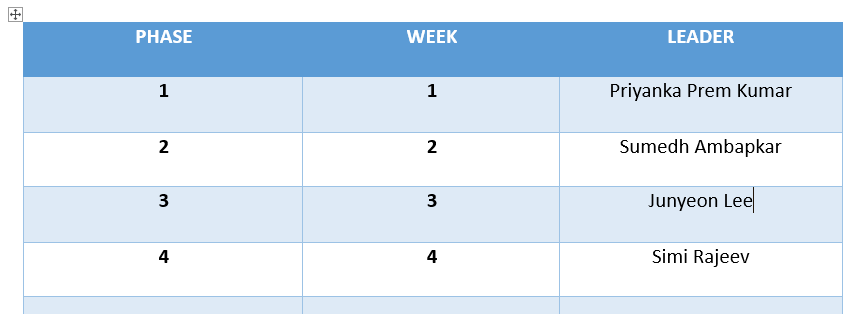

## Credit Assignment Plan

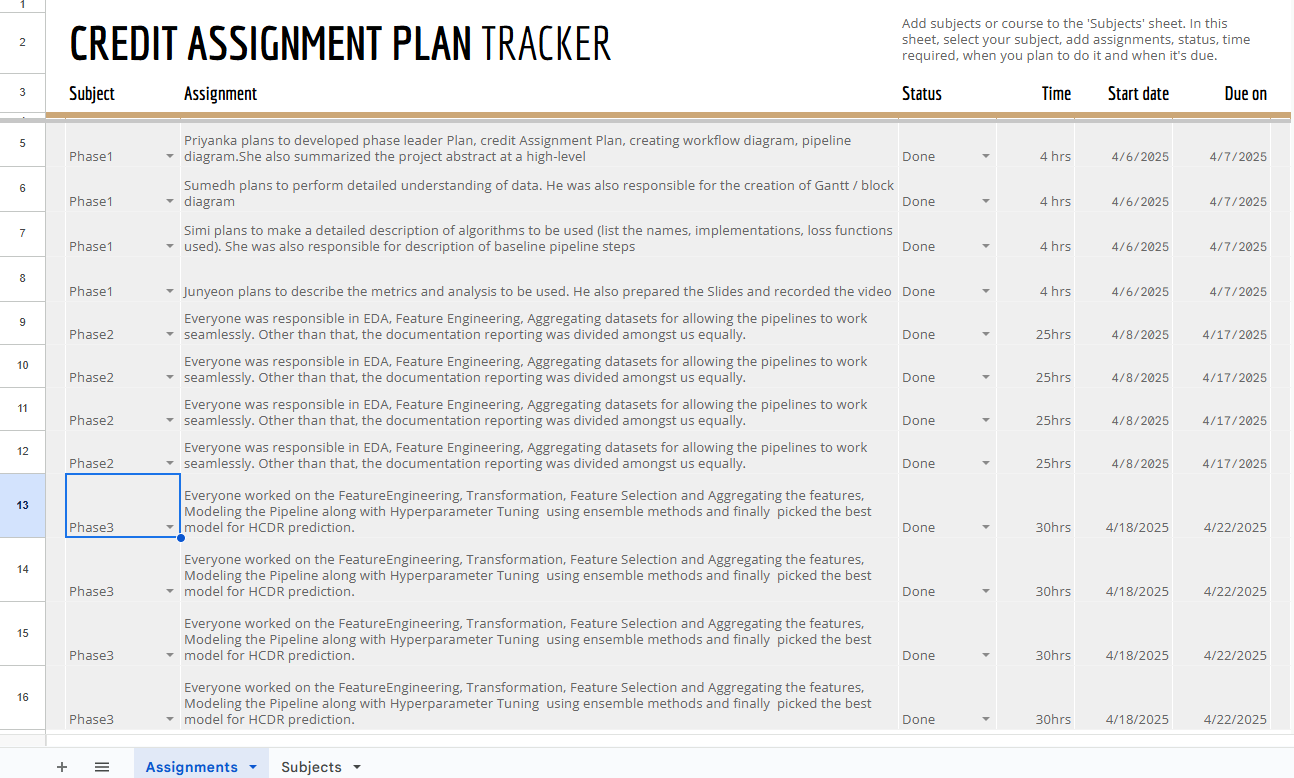

## Kaggle API setup
Kaggle is a Data Science Competition Platform which shares a lot of datasets. In the past, it was troublesome to submit your result as your have to go through the console in your browser and drag your files there. Now you can interact with Kaggle via the command line. E.g.,

```bash
! kaggle competitions files home-credit-default-risk
```

It is quite easy to setup, it takes me less than 15 minutes to finish a submission.

1. Install library
* Create a API Token (edit your profile on [Kaggle.com](https://www.kaggle.com/)); this produces `kaggle.json` file
* Put your JSON `kaggle.json` in the right place
* Access competition files; make submissions via the command (see examples below)
* Submit result

For more detailed information on setting the Kaggle API see [here](https://medium.com/@nokkk/make-your-kaggle-submissions-with-kaggle-official-api-f49093c04f8a) and [here](https://github.com/Kaggle/kaggle-api).



# Dataset Description


## Back ground Home Credit Group

Many people struggle to get loans due to insufficient or non-existent credit histories. And, unfortunately, this population is often taken advantage of by untrustworthy lenders.

### Home Credit Group

Home Credit strives to broaden financial inclusion for the unbanked population by providing a positive and safe borrowing experience. In order to make sure this underserved population has a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities.

While Home Credit is currently using various statistical and machine learning methods to make these predictions, they're challenging Kagglers to help them unlock the full potential of their data. Doing so will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.


## Background on the dataset
Home Credit is a non-banking financial institution, founded in 1997 in the Czech Republic.

The company operates in 14 countries (including United States, Russia, Kazahstan, Belarus, China, India) and focuses on lending primarily to people with little or no credit history which will either not obtain loans or became victims of untrustworthly lenders.

Home Credit group has over 29 million customers, total assests of 21 billions Euro, over 160 millions loans, with the majority in Asia and and almost half of them in China (as of 19-05-2018).

While Home Credit is currently using various statistical and machine learning methods to make these predictions, they're challenging Kagglers to help them unlock the full potential of their data. Doing so will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.

## Data files overview
There are 7 different sources of data:

* __application_train/application_test:__ the main training and testing data with information about each loan application at Home Credit. Every loan has its own row and is identified by the feature SK_ID_CURR. The training application data comes with the TARGET indicating __0: the loan was repaid__ or __1: the loan was not repaid__. The target variable defines if the client had payment difficulties meaning he/she had late payment more than X days on at least one of the first Y installments of the loan. Such case is marked as 1 while other all other cases as 0.
* __bureau:__ data concerning client's previous credits from other financial institutions. Each previous credit has its own row in bureau, but one loan in the application data can have multiple previous credits.
* __bureau_balance:__ monthly data about the previous credits in bureau. Each row is one month of a previous credit, and a single previous credit can have multiple rows, one for each month of the credit length.
* __previous_application:__ previous applications for loans at Home Credit of clients who have loans in the application data. Each current loan in the application data can have multiple previous loans. Each previous application has one row and is identified by the feature SK_ID_PREV.
* __POS_CASH_BALANCE:__ monthly data about previous point of sale or cash loans clients have had with Home Credit. Each row is one month of a previous point of sale or cash loan, and a single previous loan can have many rows.
* credit_card_balance: monthly data about previous credit cards clients have had with Home Credit. Each row is one month of a credit card balance, and a single credit card can have many rows.
* __installments_payment:__ payment history for previous loans at Home Credit. There is one row for every made payment and one row for every missed payment.

### Mount from google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import zipfile
import os

DATA_DIR = '/content/drive/MyDrive/Machine Learning 2025 Spring/'  # Update this to your actual data directory



In [ ]:
zip_file = os.path.join(DATA_DIR, 'home-credit-default-risk.zip')
print(f"Unzipping: {zip_file}")

with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(path=DATA_DIR)

print("Unzipping completed.")

# PHASE 2

# Download the files via Kaggle API


#### Imports

In [ ]:
%config Completer.use_jedi = False

import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import os
import zipfile
from sklearn.base import BaseEstimator, TransformerMixin
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings('ignore')
from time import time, ctime

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.utils import resample

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, log_loss, classification_report, roc_auc_score, make_scorer
from scipy import stats
import json
from matplotlib import pyplot
from sklearn.model_selection import train_test_split

In [ ]:
import zipfile
import os

DATA_DIR = '/content/Data/'  # Update this to your actual data directory

zip_file = os.path.join(DATA_DIR, 'home-credit-default-risk.zip')
print(f"Unzipping: {zip_file}")

with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(path=DATA_DIR)

print("Unzipping completed.")

Unzipping: /content/Data/home-credit-default-risk.zip


FileNotFoundError: [Errno 2] No such file or directory: '/content/Data/home-credit-default-risk.zip'

In [ ]:
# Uncomment if using running it on jupyter lab
# For code autocompletion
# %config Completer.use_jedi = False

# Preprocessing imports
import numpy as np
import pandas as pd
import os
import zipfile
import matplotlib.pyplot as plt
# from matplotlib import pyplot
import seaborn as sns
from pandas.plotting import scatter_matrix

# Pipelines
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline, Pipeline, FeatureUnion
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA

# Model imports
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.utils import resample
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, log_loss
from sklearn.metrics import classification_report, roc_auc_score, make_scorer

from scipy import stats
from time import time, ctime

import re
import json
import pprint
import warnings
warnings.filterwarnings('ignore')

pprint = pprint.PrettyPrinter().pprint

In [ ]:
#!pip install lightgbm

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.utils import resample

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.ensemble import VotingClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, log_loss, classification_report, roc_auc_score, make_scorer
from scipy import stats
import json
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, make_scorer, roc_curve, ConfusionMatrixDisplay, precision_recall_curve
from sklearn.metrics import explained_variance_score
#from sklearn.metrics import plot_roc_curve, plot_confusion_matrix, plot_precision_recall_curve
from sklearn.metrics import RocCurveDisplay, ConfusionMatrixDisplay, PrecisionRecallDisplay


# Data files overview
### Data Dictionary

As part of the data download comes a  Data Dictionary. It named `HomeCredit_columns_description.csv`

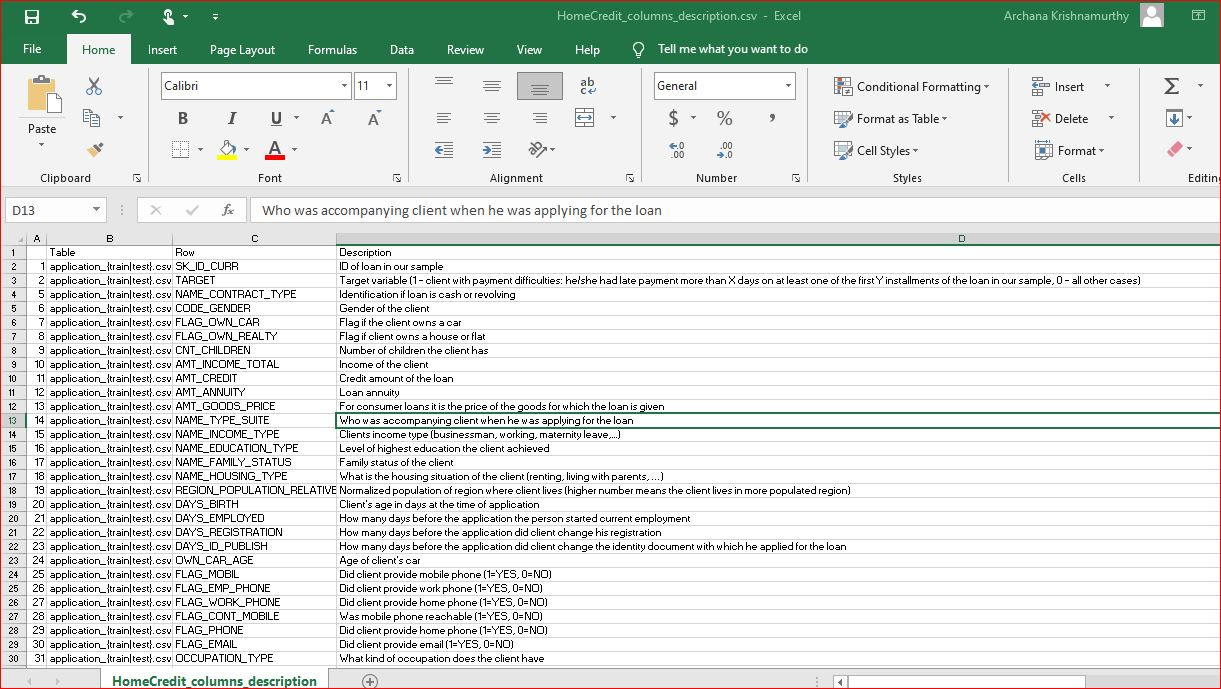

### Application train

In [ ]:
def load_data(in_path, name):
    df = pd.read_csv(in_path)
    print(f"{name}: shape is {df.shape}")
    print(df.info())
    display(df.head(5))
    return df

datasets={}  # lets store the datasets in a dictionary so we can keep track of them easily


### Application test


* __application_train/application_test:__ the main training and testing data with information about each loan application at Home Credit. Every loan has its own row and is identified by the feature SK_ID_CURR. The training application data comes with the TARGET indicating __0: the loan was repaid__ or __1: the loan was not repaid__. The target variable defines if the client had payment difficulties meaning he/she had late payment more than X days on at least one of the first Y installments of the loan. Such case is marked as 1 while other all other cases as 0.


In [ ]:
ds_name = 'application_test'
datasets[ds_name] = load_data(os.path.join(DATA_DIR, f'{ds_name}.csv'), ds_name)

application_test: shape is (48744, 121)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB
None


SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
4      100038         Cash loans           M            Y               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   
3             2          315000.0   1575000.0      49018.5        1575000.0   
4             1          180000.0    625500.0      32067.0         625500.0   

   ... FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                0                0                0                0   
1  ...                0                0                0                0   
2  ...                0                0                0                0   
3  ...                0                0                0                0   
4  ...                0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         0.0  
1                        0.0                         3.0  
2                        1.0                         4.0  
3                        0.0                         3.0  
4                        NaN                         NaN  

[5 rows x 121 columns]

The application dataset has the most information about the client: Gender, income, family status, education ...

### The Other datasets

* __bureau:__ data concerning client's previous credits from other financial institutions. Each previous credit has its own row in bureau, but one loan in the application data can have multiple previous credits.
* __bureau_balance:__ monthly data about the previous credits in bureau. Each row is one month of a previous credit, and a single previous credit can have multiple rows, one for each month of the credit length.
* __previous_application:__ previous applications for loans at Home Credit of clients who have loans in the application data. Each current loan in the application data can have multiple previous loans. Each previous application has one row and is identified by the feature SK_ID_PREV.
* __POS_CASH_BALANCE:__ monthly data about previous point of sale or cash loans clients have had with Home Credit. Each row is one month of a previous point of sale or cash loan, and a single previous loan can have many rows.
* credit_card_balance: monthly data about previous credit cards clients have had with Home Credit. Each row is one month of a credit card balance, and a single credit card can have many rows.
* __installments_payment:__ payment history for previous loans at Home Credit. There is one row for every made payment and one row for every missed payment.

In [ ]:
%%time
ds_names = ("application_train", "application_test", "bureau","bureau_balance","credit_card_balance","installments_payments",
            "previous_application","POS_CASH_balance")

for ds_name in ds_names:
    datasets[ds_name] = load_data(os.path.join(DATA_DIR, f'{ds_name}.csv'), ds_name)


application_train: shape is (307511, 122)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

application_test: shape is (48744, 121)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB
None


SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
4      100038         Cash loans           M            Y               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   
3             2          315000.0   1575000.0      49018.5        1575000.0   
4             1          180000.0    625500.0      32067.0         625500.0   

   ... FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                0                0                0                0   
1  ...                0                0                0                0   
2  ...                0                0                0                0   
3  ...                0                0                0                0   
4  ...                0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         0.0  
1                        0.0                         3.0  
2                        1.0                         4.0  
3                        0.0                         3.0  
4                        NaN                         NaN  

[5 rows x 121 columns]

bureau: shape is (1716428, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB
None


SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0      215354       5714462        Closed      currency 1         -497   
1      215354       5714463        Active      currency 1         -208   
2      215354       5714464        Active      currency 1         -203   
3      215354       5714465        Active      currency 1         -203   
4      215354       5714466        Active      currency 1         -629   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                   0               -153.0             -153.0   
1                   0               1075.0                NaN   
2                   0                528.0                NaN   
3                   0                  NaN                NaN   
4                   0               1197.0                NaN   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                     NaN                   0         91323.0   
1                     NaN                   0        225000.0   
2                     NaN                   0        464323.5   
3                     NaN                   0         90000.0   
4                 77674.5                   0       2700000.0   

   AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
0                  0.0                   NaN                     0.0   
1             171342.0                   NaN                     0.0   
2                  NaN                   NaN                     0.0   
3                  NaN                   NaN                     0.0   
4                  NaN                   NaN                     0.0   

       CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  
0  Consumer credit                -131          NaN  
1      Credit card                 -20          NaN  
2  Consumer credit                 -16          NaN  
3      Credit card                 -16          NaN  
4  Consumer credit                 -21          NaN

bureau_balance: shape is (27299925, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    int64 
 1   MONTHS_BALANCE  int64 
 2   STATUS          object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB
None


SK_ID_BUREAU  MONTHS_BALANCE STATUS
0       5715448               0      C
1       5715448              -1      C
2       5715448              -2      C
3       5715448              -3      C
4       5715448              -4      C

credit_card_balance: shape is (3840312, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        int64  
 17  CNT_DRAWINGS_OTHER_CURRENT  float64
 18  CNT_DRAWINGS_POS_C

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  AMT_BALANCE  \
0     2562384      378907              -6       56.970   
1     2582071      363914              -1    63975.555   
2     1740877      371185              -7    31815.225   
3     1389973      337855              -4   236572.110   
4     1891521      126868              -1   453919.455   

   AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  AMT_DRAWINGS_CURRENT  \
0                   135000                       0.0                 877.5   
1                    45000                    2250.0                2250.0   
2                   450000                       0.0                   0.0   
3                   225000                    2250.0                2250.0   
4                   450000                       0.0               11547.0   

   AMT_DRAWINGS_OTHER_CURRENT  AMT_DRAWINGS_POS_CURRENT  \
0                         0.0                     877.5   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         0.0                       0.0   
4                         0.0                   11547.0   

   AMT_INST_MIN_REGULARITY  ...  AMT_RECIVABLE  AMT_TOTAL_RECEIVABLE  \
0                 1700.325  ...          0.000                 0.000   
1                 2250.000  ...      64875.555             64875.555   
2                 2250.000  ...      31460.085             31460.085   
3                11795.760  ...     233048.970            233048.970   
4                22924.890  ...     453919.455            453919.455   

   CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  CNT_DRAWINGS_OTHER_CURRENT  \
0                       0.0                     1                         0.0   
1                       1.0                     1                         0.0   
2                       0.0                     0                         0.0   
3                       1.0                     1                         0.0   
4                       0.0                     1                         0.0   

   CNT_DRAWINGS_POS_CURRENT  CNT_INSTALMENT_MATURE_CUM  NAME_CONTRACT_STATUS  \
0                       1.0                       35.0                Active   
1                       0.0                       69.0                Active   
2                       0.0                       30.0                Active   
3                       0.0                       10.0                Active   
4                       1.0                      101.0                Active   

   SK_DPD  SK_DPD_DEF  
0       0           0  
1       0           0  
2       0           0  
3       0           0  
4       0           0  

[5 rows x 23 columns]

installments_payments: shape is (13605401, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB
None


SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  NUM_INSTALMENT_NUMBER  \
0     1054186      161674                     1.0                      6   
1     1330831      151639                     0.0                     34   
2     2085231      193053                     2.0                      1   
3     2452527      199697                     1.0                      3   
4     2714724      167756                     1.0                      2   

   DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  AMT_INSTALMENT  AMT_PAYMENT  
0          -1180.0             -1187.0        6948.360     6948.360  
1          -2156.0             -2156.0        1716.525     1716.525  
2            -63.0               -63.0       25425.000    25425.000  
3          -2418.0             -2426.0       24350.130    24350.130  
4          -1383.0             -1366.0        2165.040     2160.585

previous_application: shape is (1670214, 37)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 1

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 37 columns]

POS_CASH_balance: shape is (10001358, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   SK_ID_CURR             int64  
 2   MONTHS_BALANCE         int64  
 3   CNT_INSTALMENT         float64
 4   CNT_INSTALMENT_FUTURE  float64
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 int64  
 7   SK_DPD_DEF             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB
None


SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
0     1803195      182943             -31            48.0   
1     1715348      367990             -33            36.0   
2     1784872      397406             -32            12.0   
3     1903291      269225             -35            48.0   
4     2341044      334279             -35            36.0   

   CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
0                   45.0               Active       0           0  
1                   35.0               Active       0           0  
2                    9.0               Active       0           0  
3                   42.0               Active       0           0  
4                   35.0               Active       0           0

CPU times: user 40.5 s, sys: 7.78 s, total: 48.3 s
Wall time: 52.7 s


In [ ]:
for ds_name in datasets.keys():
    print(f'dataset {ds_name:24}: [ {datasets[ds_name].shape[0]:10,}, {datasets[ds_name].shape[1]}]')


dataset application_test        : [     48,744, 121]
dataset application_train       : [    307,511, 122]
dataset bureau                  : [  1,716,428, 17]
dataset bureau_balance          : [ 27,299,925, 3]
dataset credit_card_balance     : [  3,840,312, 23]
dataset installments_payments   : [ 13,605,401, 8]
dataset previous_application    : [  1,670,214, 37]
dataset POS_CASH_balance        : [ 10,001,358, 8]


# Exploratory Data Analysis
<a id='EDA Section'></a>

## Summary Statistics

In [ ]:
print('\033[1m' + "Size of each dataset : " + '\033[0m' , end = '\n' * 2)
for ds_name in datasets.keys():
    print(f'dataset {ds_name:24}: [ {datasets[ds_name].shape[0]:10,}, {datasets[ds_name].shape[1]:4}]')

Size of each dataset : 

dataset application_test        : [     48,744,  121]
dataset application_train       : [    307,511,  122]
dataset bureau                  : [  1,716,428,   17]
dataset bureau_balance          : [ 27,299,925,    3]
dataset credit_card_balance     : [  3,840,312,   23]
dataset installments_payments   : [ 13,605,401,    8]
dataset previous_application    : [  1,670,214,   37]
dataset POS_CASH_balance        : [ 10,001,358,    8]


### Summary of Application train

In [ ]:
(datasets['application_train'].dtypes).unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [ ]:
from IPython.display import display, HTML
pd.set_option("display.max_rows", None, "display.max_columns", None)

# Full stats

def stats_summary1(df, df_name):
    print(datasets[df_name].info(verbose=True ))
    print("-----"*15)
    print(f"Shape of the df {df_name} is {df.shape} \n")
    print("-----"*15)
    print(f"Statistical summary of {df_name} is :")
    print("-----"*15)
    print(f"Description of the df {df_name}:\n")
    print(display(HTML(np.round(datasets['application_train'].describe(),2).to_html())))
    #print(f"Description of the df {df_name}:\n",np.round(datasets['application_train'].describe(),2))

def stats_summary2(df, df_name):
    print(f"Description of the df continued for {df_name}:\n")
    print("-----"*15)
    print("Data type value counts: \n",df.dtypes.value_counts())
    print("\nReturn number of unique elements in the object. \n")
    print(df.select_dtypes('object').apply(pd.Series.nunique, axis = 0))


# List the categorical and Numerical features of a DF
def feature_datatypes_groups(df, df_name):
    df_dtypes = df.columns.to_series().groupby(df.dtypes).groups
    print("-----"*15)
    print(f"Categorical and Numerical(int + float) features  of {df_name}.")
    print("-----"*15)
    print()
    for k, v in df_dtypes.items():
        print({k.name: v})
        print("---"*10)
    print("\n \n")

# Null data list and plot.
def null_data_plot(df, df_name):
    percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False).round(2)
    sum_missing = df.isna().sum().sort_values(ascending = False)
    missing_data  = pd.concat([percent, sum_missing], axis=1, keys=['Percent', "Train Missing Count"])
    missing_data=missing_data[missing_data['Percent'] > 0]
    print("-----"*15)
    print("-----"*15)
    print('\n The Missing Data: \n')
#     display(missing_data)  # display few
    if len(missing_data)==0:
      print("No missing Data")
    else:
      display(HTML(missing_data.to_html()))  # display all the rows
      print("-----"*15)
      if len(df.columns)> 35:
        f,ax =plt.subplots(figsize=(8,15))
      else:
        f,ax =plt.subplots()
      #plt.xticks(rotation='90')
      #fig=sns.barplot(missing_data.index, missing_data["Percent"],alpha=0.8)
      #plt.xlabel('Features', fontsize=15)
      #plt.ylabel('Percent of missing values', fontsize=15)
      plt.title(f'Percent missing data for {df_name}.', fontsize=10)
      fig=sns.barplot(x=missing_data["Percent"],y=missing_data.index ,alpha=0.8)
      plt.xlabel('Percent of missing values', fontsize=10)
      plt.ylabel('Features', fontsize=10)
      return missing_data


# Full consolidation of all the stats function.
def display_stats(df, df_name):
    print("--"*40)
    print(" "*20 + '\033[1m'+ df_name +  '\033[0m' +" "*20)
    print("--"*40)
    stats_summary1(df, df_name)

def display_feature_info(df, df_name):
    stats_summary2(df, df_name)
    feature_datatypes_groups(df, df_name)
    null_data_plot(df, df_name)



In [ ]:
display_stats(datasets['application_train'], 'application_train')

--------------------------------------------------------------------------------
                    application_train                    
--------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NA

None


Description of the df continued for application_train:

---------------------------------------------------------------------------
Data type value counts: 
 float64    65
int64      41
object     16
Name: count, dtype: int64

Return number of unique elements in the object. 

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64
---------------------------------------------------------------------------
Categorical and Numerical(int + float) features  of application_train.
-----------------------------------

---------------------------------------------------------------------------


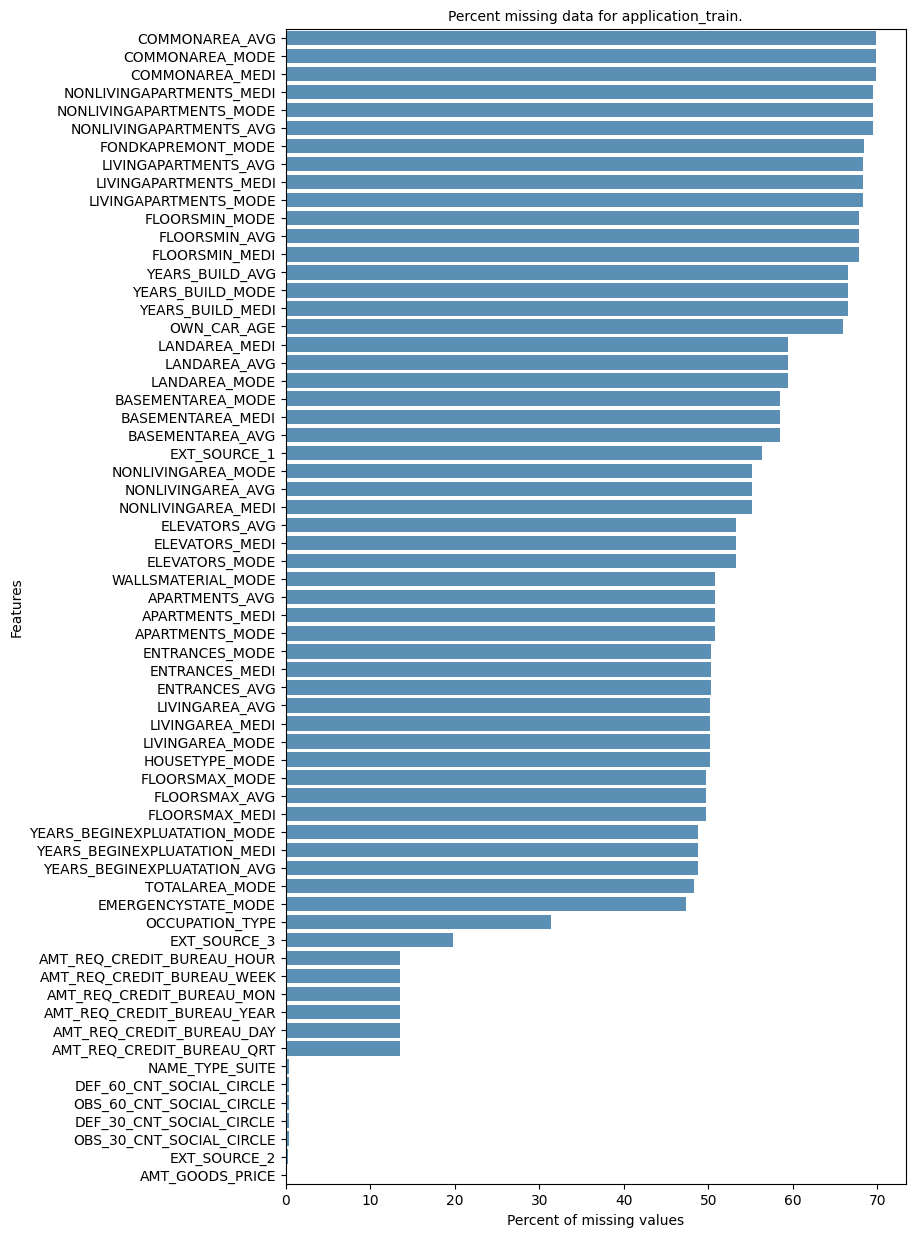

In [ ]:
display_feature_info(datasets['application_train'], 'application_train')

Observations:
- We can see anamolies in the data from the descriptive statistics for Days Birth, Days employed, Days registration, Days Id publish which is a negative value and is not expected.
- Own car age has a max of 91.
- There are redundant features related to living space and realty which can be helpful to weed out during the feature eduction process and avoid issues with multicollinearity.

##### Days Employed

In [ ]:
datasets["application_train"]['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [ ]:
anom_days_employed = datasets["application_train"][datasets["application_train"]['DAYS_EMPLOYED']==365243]
norm_days_employed = datasets["application_train"][datasets["application_train"]['DAYS_EMPLOYED']!=365243]
print(anom_days_employed.shape)

dr_anom = anom_days_employed['TARGET'].mean()*100
dr_norm = norm_days_employed['TARGET'].mean()*100

print('Default rate (Anomaly): {:.2f}'.format(dr_anom))
print('Default rate (Normal): {:.2f}'.format(dr_norm))

pct_anom_days_employed = (anom_days_employed.shape[0]/datasets["application_train"].shape[0])*100
print(pct_anom_days_employed)

(55374, 122)
Default rate (Anomaly): 5.40
Default rate (Normal): 8.66
18.00716071945394


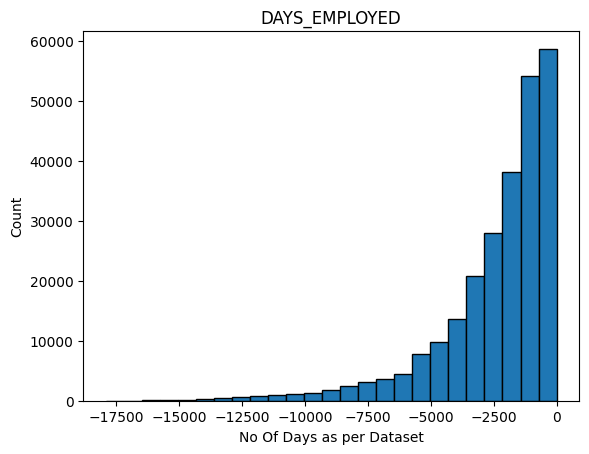

In [ ]:
df_app_train=datasets["application_train"]
df_app_train['DAYS_EMPLOYED_ANOM'] = df_app_train['DAYS_EMPLOYED'] == 365243
df_app_train['DAYS_EMPLOYED'].replace({365243:np.nan}, inplace=True)
plt.hist(df_app_train['DAYS_EMPLOYED'],edgecolor = 'k', bins = 25)
plt.title('DAYS_EMPLOYED'); plt.xlabel('No Of Days as per Dataset'); plt.ylabel('Count');

The bins above histogram shows that the data is not logical and this feature needs to be further investigated for imbalances. Number of days employed would show a steady source of income and could be a useful feature for predicting risk

##### Own Car Age

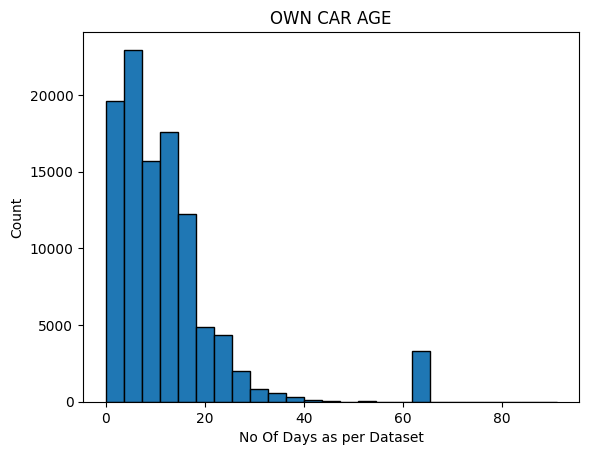

In [ ]:
plt.hist(datasets["application_train"]['OWN_CAR_AGE'],edgecolor = 'k', bins = 25)
plt.title('OWN CAR AGE'); plt.xlabel('No Of Days as per Dataset'); plt.ylabel('Count');

We see that those who have cars over 60 years old have a number of applications (i.e., 3339). This could a good area to investigate risk

Observations:
-  Application Train is the transactional dataset and has the most details regarding the loan requests submitted.
-  Missing values seem to be of concern in this dataset. Occupation Type and Organization Type are categorical values that have 58 and 18 categories respectively and can be useful in feature engineering.

##### Applicants Age

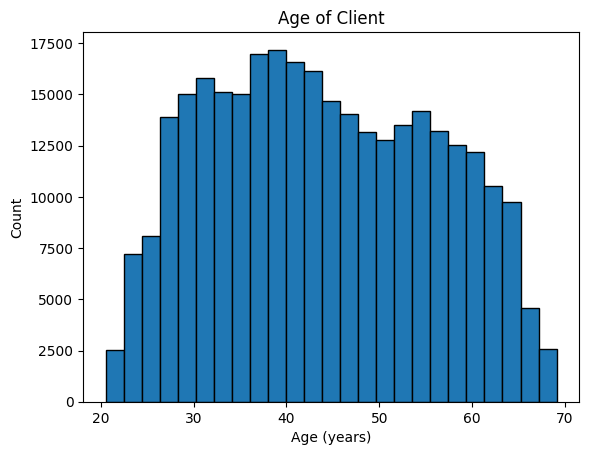

In [ ]:
plt.hist(datasets["application_train"]['DAYS_BIRTH']/-365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');

##### Applicants occupations

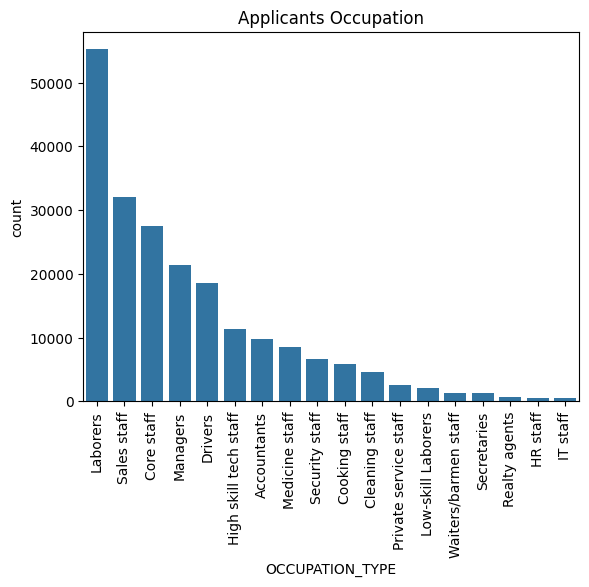

In [ ]:
sns.countplot(x='OCCUPATION_TYPE', data=datasets["application_train"], order = datasets["application_train"]['OCCUPATION_TYPE'].value_counts().index);
plt.title('Applicants Occupation');
plt.xticks(rotation=90);

##### Contract Type with Amount Credit and Code Gender

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline
sns.set(color_codes=True)

In [ ]:
def generic_xy_boxplot(xaxisfeature,yaxisfeature,legendcategory,data,log_scale):
  sns.boxplot(x=xaxisfeature, y=yaxisfeature, hue=legendcategory, data=data)
  plt.title('Boxplot for '+ xaxisfeature +' with ' + yaxisfeature+' and '+legendcategory,fontsize=10)
  if log_scale:
                plt.yscale('log')
                plt.ylabel(f'{yaxisfeature} (log Scale)')
                plt.tight_layout()

In [ ]:
def box_plot(plots):
  number_of_subplots = len(plots)
  plt.figure(figsize = (20,8))
  sns.set_style('whitegrid')
  for i, ele in enumerate(plots):
        plt.subplot(1, number_of_subplots, i + 1)
        plt.subplots_adjust(wspace=0.25)
        xaxisfeature=ele[0]
        yaxisfeature=ele[1]
        legendcategory=ele[2]
        data=ele[3]
        log_scale=ele[4]
        generic_xy_boxplot(xaxisfeature,yaxisfeature,legendcategory,data,log_scale)

In [ ]:
plots=[['NAME_CONTRACT_TYPE','AMT_CREDIT','CODE_GENDER',datasets['application_train'],False]]

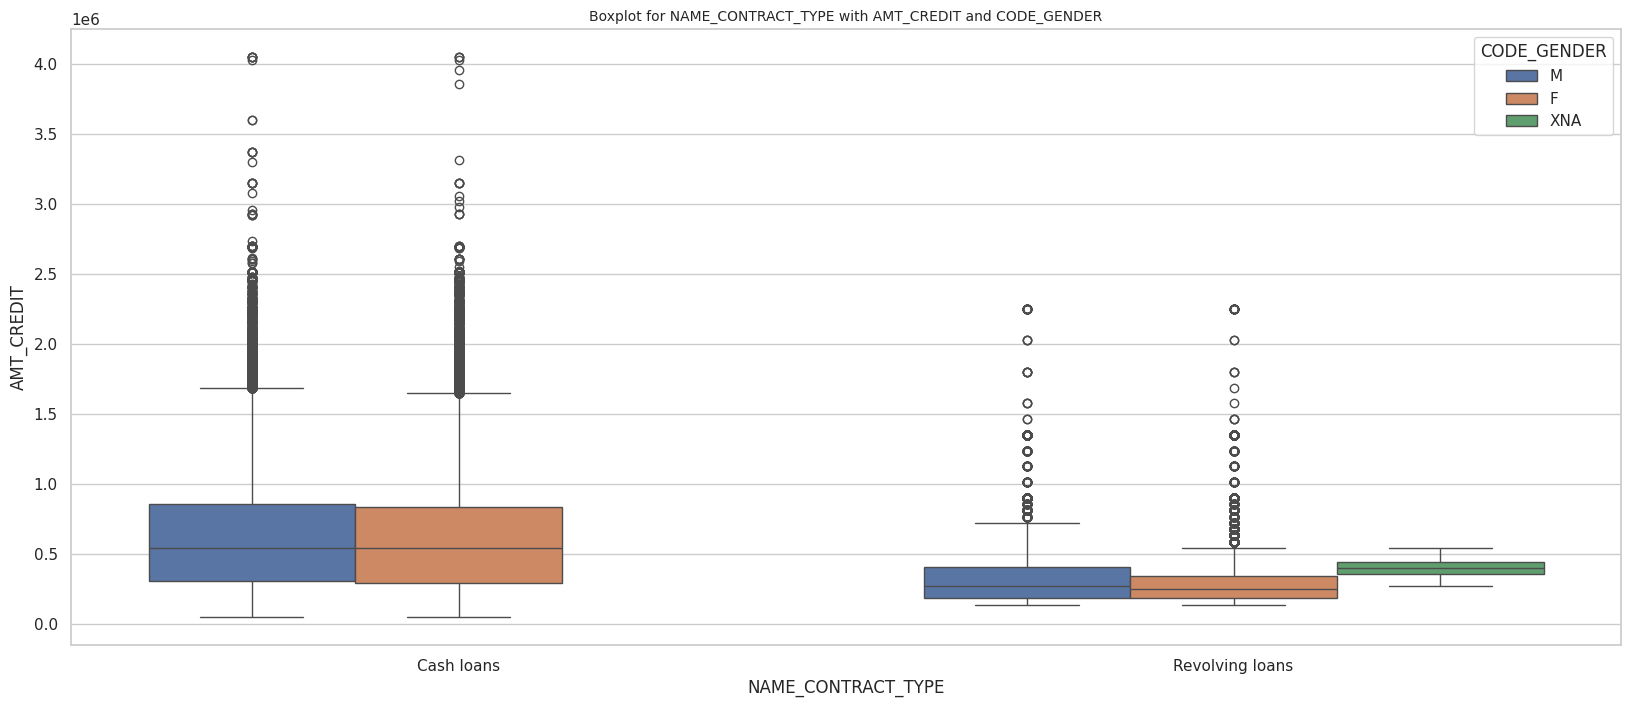

In [ ]:
box_plot(plots)

Gender does not indicate a major impact . But credit amount for cash loans are significantly high compared to revolving loans.


### Summary of previous_application

In [ ]:
display_stats(datasets['previous_application'], 'previous_application')

--------------------------------------------------------------------------------
                    previous_application                    
--------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9  

None


Observations:
-  The count of children go upto 19, this could be an outlier and a risk worth investigating.
-  All no of day fields are negative values showing anamolies in the data. However there are fields indicating average years. A calculation comparing the average years and days could prove valuable

Description of the df continued for previous_application:

---------------------------------------------------------------------------
Data type value counts: 
 object     16
float64    15
int64       6
Name: count, dtype: int64

Return number of unique elements in the object. 

NAME_CONTRACT_TYPE              4
WEEKDAY_APPR_PROCESS_START      7
FLAG_LAST_APPL_PER_CONTRACT     2
NAME_CASH_LOAN_PURPOSE         25
NAME_CONTRACT_STATUS            4
NAME_PAYMENT_TYPE               4
CODE_REJECT_REASON              9
NAME_TYPE_SUITE                 7
NAME_CLIENT_TYPE                4
NAME_GOODS_CATEGORY            28
NAME_PORTFOLIO                  5
NAME_PRODUCT_TYPE               3
CHANNEL_TYPE                    8
NAME_SELLER_INDUSTRY           11
NAME_YIELD_GROUP                5
PRODUCT_COMBINATION            17
dtype: int64
---------------------------------------------------------------------------
Categorical and Numerical(int + float) features  of previous_application.
-------------

---------------------------------------------------------------------------


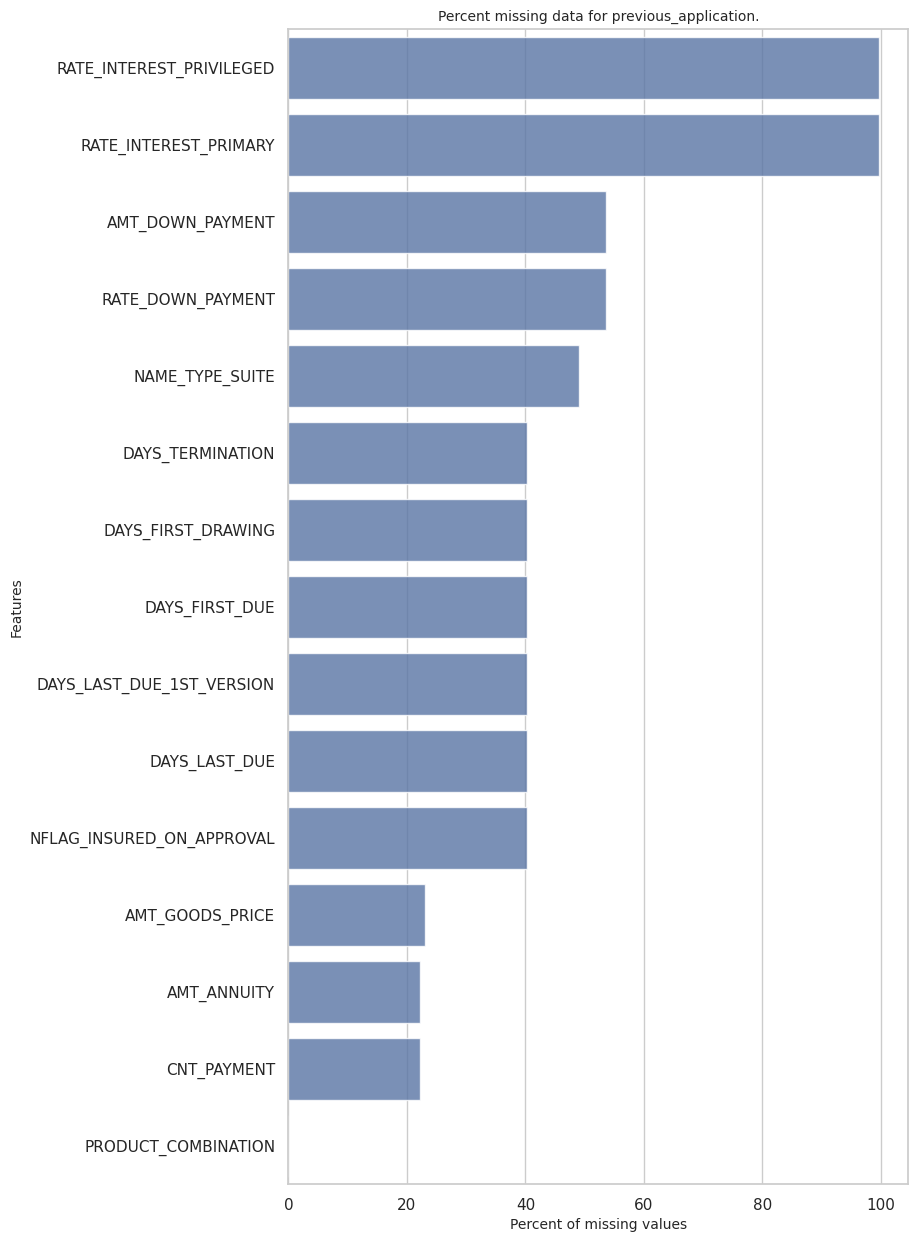

In [ ]:
display_feature_info(datasets['previous_application'], 'previous_application')

### Summary of bureau

In [ ]:
display_stats(datasets['bureau'], 'bureau')

--------------------------------------------------------------------------------
                    bureau                    
--------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANN

None


Description of the df continued for bureau:

---------------------------------------------------------------------------
Data type value counts: 
 float64    8
int64      6
object     3
Name: count, dtype: int64

Return number of unique elements in the object. 

CREDIT_ACTIVE       4
CREDIT_CURRENCY     4
CREDIT_TYPE        15
dtype: int64
---------------------------------------------------------------------------
Categorical and Numerical(int + float) features  of bureau.
---------------------------------------------------------------------------

{'int64': Index(['SK_ID_CURR', 'SK_ID_BUREAU', 'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE',
       'CNT_CREDIT_PROLONG', 'DAYS_CREDIT_UPDATE'],
      dtype='object')}
------------------------------
{'float64': Index(['DAYS_CREDIT_ENDDATE', 'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE',
       'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT',
       'AMT_CREDIT_SUM_OVERDUE', 'AMT_ANNUITY'],
      dtype='object')}
----------------------

---------------------------------------------------------------------------


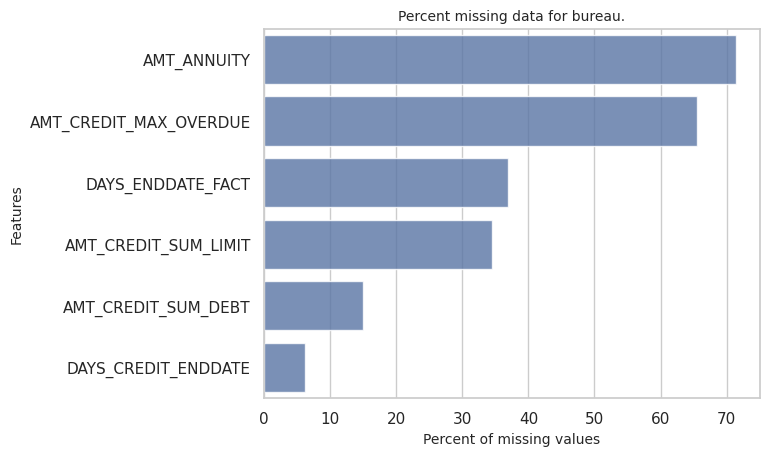

In [ ]:
display_feature_info(datasets['bureau'], 'bureau')

### Summary of bureau_balance

In [ ]:
display_stats(datasets['bureau_balance'], 'bureau_balance')

--------------------------------------------------------------------------------
                    bureau_balance                    
--------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    int64 
 1   MONTHS_BALANCE  int64 
 2   STATUS          object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB
None
---------------------------------------------------------------------------
Shape of the df bureau_balance is (27299925, 3) 

---------------------------------------------------------------------------
Statistical summary of bureau_balance is :
---------------------------------------------------------------------------
Description of the df bureau_balance:



None


In [ ]:
display_feature_info(datasets['bureau_balance'], 'bureau_balance')

Description of the df continued for bureau_balance:

---------------------------------------------------------------------------
Data type value counts: 
 int64     2
object    1
Name: count, dtype: int64

Return number of unique elements in the object. 

STATUS    8
dtype: int64
---------------------------------------------------------------------------
Categorical and Numerical(int + float) features  of bureau_balance.
---------------------------------------------------------------------------

{'int64': Index(['SK_ID_BUREAU', 'MONTHS_BALANCE'], dtype='object')}
------------------------------
{'object': Index(['STATUS'], dtype='object')}
------------------------------

 

---------------------------------------------------------------------------
---------------------------------------------------------------------------

 The Missing Data: 

No missing Data


Observations:
- Bureau balance & bureau have no missing data. These datasets can provide accurate aggreagte features.

### Summary of credit_card_balance

In [ ]:
display_stats(datasets['credit_card_balance'], 'credit_card_balance')

--------------------------------------------------------------------------------
                    credit_card_balance                    
--------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_

None


Description of the df continued for credit_card_balance:

---------------------------------------------------------------------------
Data type value counts: 
 float64    15
int64       7
object      1
Name: count, dtype: int64

Return number of unique elements in the object. 

NAME_CONTRACT_STATUS    7
dtype: int64
---------------------------------------------------------------------------
Categorical and Numerical(int + float) features  of credit_card_balance.
---------------------------------------------------------------------------

{'int64': Index(['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'AMT_CREDIT_LIMIT_ACTUAL',
       'CNT_DRAWINGS_CURRENT', 'SK_DPD', 'SK_DPD_DEF'],
      dtype='object')}
------------------------------
{'float64': Index(['AMT_BALANCE', 'AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_CURRENT',
       'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT',
       'AMT_INST_MIN_REGULARITY', 'AMT_PAYMENT_CURRENT',
       'AMT_PAYMENT_TOTAL_CURRENT', 'AMT_RECEIVA

---------------------------------------------------------------------------


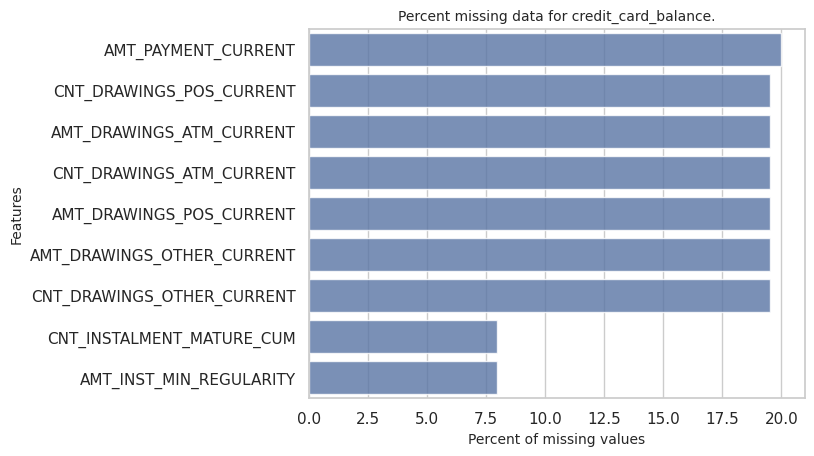

In [ ]:
display_feature_info(datasets['credit_card_balance'], 'credit_card_balance')

### Summary of installments_payments

In [ ]:
display_stats(datasets['installments_payments'], 'installments_payments')

--------------------------------------------------------------------------------
                    installments_payments                    
--------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB
None
---------------------------------------------------------------------------
Shape of the df installments_payments is (13605401, 8) 

---------------------------------------------------------------------------
Statistical summary of ins

None


Description of the df continued for installments_payments:

---------------------------------------------------------------------------
Data type value counts: 
 float64    5
int64      3
Name: count, dtype: int64

Return number of unique elements in the object. 

Series([], dtype: float64)
---------------------------------------------------------------------------
Categorical and Numerical(int + float) features  of installments_payments.
---------------------------------------------------------------------------

{'int64': Index(['SK_ID_PREV', 'SK_ID_CURR', 'NUM_INSTALMENT_NUMBER'], dtype='object')}
------------------------------
{'float64': Index(['NUM_INSTALMENT_VERSION', 'DAYS_INSTALMENT', 'DAYS_ENTRY_PAYMENT',
       'AMT_INSTALMENT', 'AMT_PAYMENT'],
      dtype='object')}
------------------------------

 

---------------------------------------------------------------------------
---------------------------------------------------------------------------

 The Missing Data: 



---------------------------------------------------------------------------


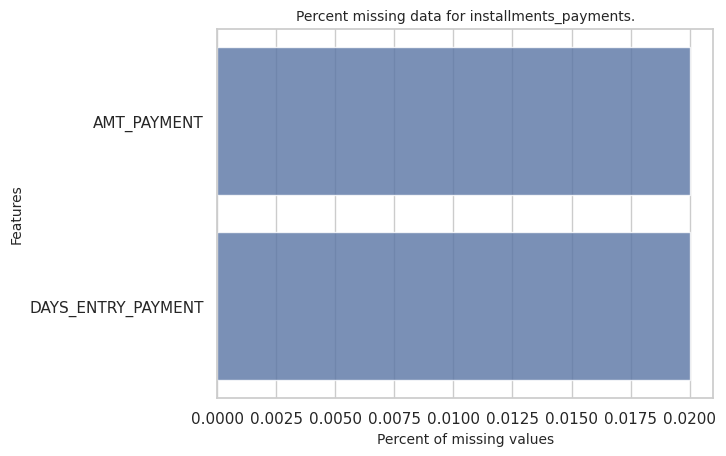

In [ ]:
display_feature_info(datasets['installments_payments'], 'installments_payments')

### Summary of POS_CASH_balance

In [ ]:
display_stats(datasets['POS_CASH_balance'], 'POS_CASH_balance')

--------------------------------------------------------------------------------
                    POS_CASH_balance                    
--------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   SK_ID_CURR             int64  
 2   MONTHS_BALANCE         int64  
 3   CNT_INSTALMENT         float64
 4   CNT_INSTALMENT_FUTURE  float64
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 int64  
 7   SK_DPD_DEF             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB
None
---------------------------------------------------------------------------
Shape of the df POS_CASH_balance is (10001358, 8) 

---------------------------------------------------------------------------
Statistical summary of POS_CASH_ba

None


Description of the df continued for POS_CASH_balance:

---------------------------------------------------------------------------
Data type value counts: 
 int64      5
float64    2
object     1
Name: count, dtype: int64

Return number of unique elements in the object. 

NAME_CONTRACT_STATUS    9
dtype: int64
---------------------------------------------------------------------------
Categorical and Numerical(int + float) features  of POS_CASH_balance.
---------------------------------------------------------------------------

{'int64': Index(['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'SK_DPD', 'SK_DPD_DEF'], dtype='object')}
------------------------------
{'float64': Index(['CNT_INSTALMENT', 'CNT_INSTALMENT_FUTURE'], dtype='object')}
------------------------------
{'object': Index(['NAME_CONTRACT_STATUS'], dtype='object')}
------------------------------

 

---------------------------------------------------------------------------
-----------------------------------------------

---------------------------------------------------------------------------


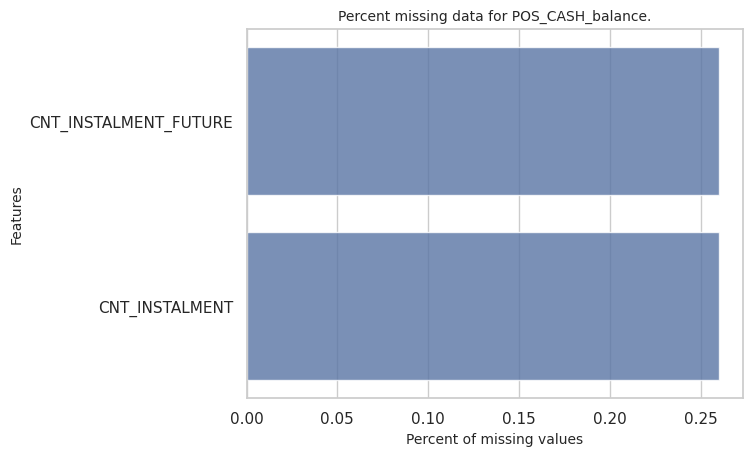

In [ ]:
display_feature_info(datasets['POS_CASH_balance'], 'POS_CASH_balance')

### Summary of application_test

In [ ]:
display_stats(datasets['application_test'], 'application_test')

--------------------------------------------------------------------------------
                    application_test                    
--------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Data columns (total 121 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    NAME_CONTRACT_TYPE            object 
 2    CODE_GENDER                   object 
 3    FLAG_OWN_CAR                  object 
 4    FLAG_OWN_REALTY               object 
 5    CNT_CHILDREN                  int64  
 6    AMT_INCOME_TOTAL              float64
 7    AMT_CREDIT                    float64
 8    AMT_ANNUITY                   float64
 9    AMT_GOODS_PRICE               float64
 10   NAME_TYPE_SUITE               object 
 11   NAME_INCOME_TYPE              object 
 12   NAME_EDUCATION_TYPE           object 
 13   NAME_

None


Description of the df continued for application_test:

---------------------------------------------------------------------------
Data type value counts: 
 float64    65
int64      40
object     16
Name: count, dtype: int64

Return number of unique elements in the object. 

NAME_CONTRACT_TYPE             2
CODE_GENDER                    2
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               7
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             5
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64
---------------------------------------------------------------------------
Categorical and Numerical(int + float) features  of application_test.
-------------------------------------

---------------------------------------------------------------------------


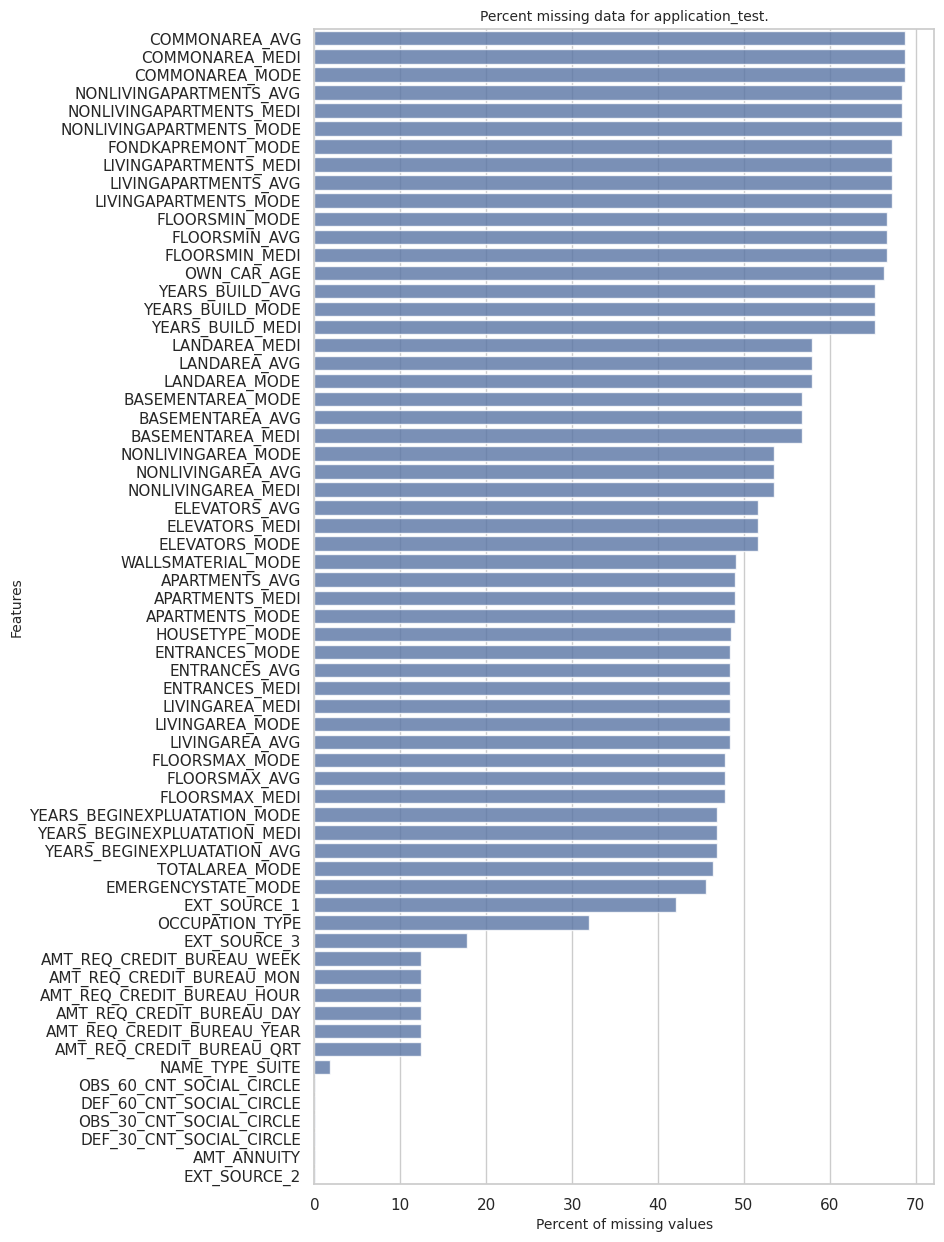

In [ ]:
display_feature_info(datasets['application_test'], 'application_test')

## Correlation Analysis
<a id='correlation'></a>

The top 20 correlated features (positive and negative) for application train datset are listed below.

In [ ]:
#correlations = datasets["application_train"].corr()['TARGET'].sort_values()
correlations = datasets["application_train"].select_dtypes(include=[np.number]).corr()['TARGET'].sort_values()
print('Most Positive Correlations:\n', correlations.tail(10))
print('\nMost Negative Correlations:\n', correlations.head(10))

Most Positive Correlations:
 REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_EMPLOYED                  0.074958
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64

Most Negative Correlations:
 EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE              -0.039645
REGION_POPULATION_RELATIVE   -0.037227
ELEVATORS_AVG                -0.034199
ELEVATORS_MEDI               -0.033863
Name: TARGET, dtype: float64


In [ ]:
num_attribs = ['TARGET', 'AMT_INCOME_TOTAL',  'AMT_CREDIT', 'DAYS_EMPLOYED',
               'DAYS_BIRTH', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'AMT_GOODS_PRICE']
df = datasets["application_train"].copy()
df2 = df[num_attribs]
corr = df2.corr()
corr.style.background_gradient(cmap='PuBu')

##  Distribution of the Datasets

The distribution of the top correlated features are plotted below

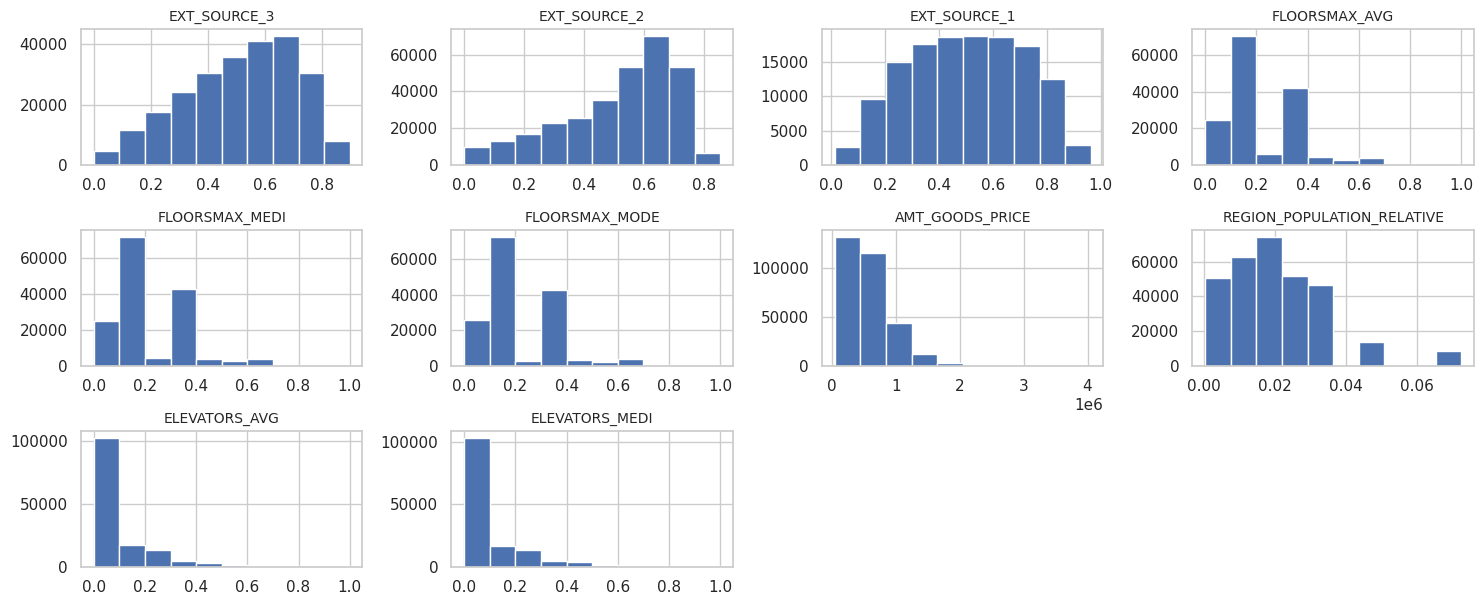

In [ ]:
var_neg_corr = correlations.head(10).index.values
numVar = var_neg_corr.shape[0]

plt.figure(figsize=(15,20))
for i,var in enumerate(var_neg_corr):
    dflt_var = datasets["application_train"].loc[datasets["application_train"]['TARGET']==1,var]
    dflt_non_var = datasets["application_train"].loc[datasets["application_train"]['TARGET']==0,var]

    plt.subplot(numVar,4,i+1)
    datasets["application_train"][var].hist()
    plt.title(var, fontsize = 10)
    plt.tight_layout()
plt.show()

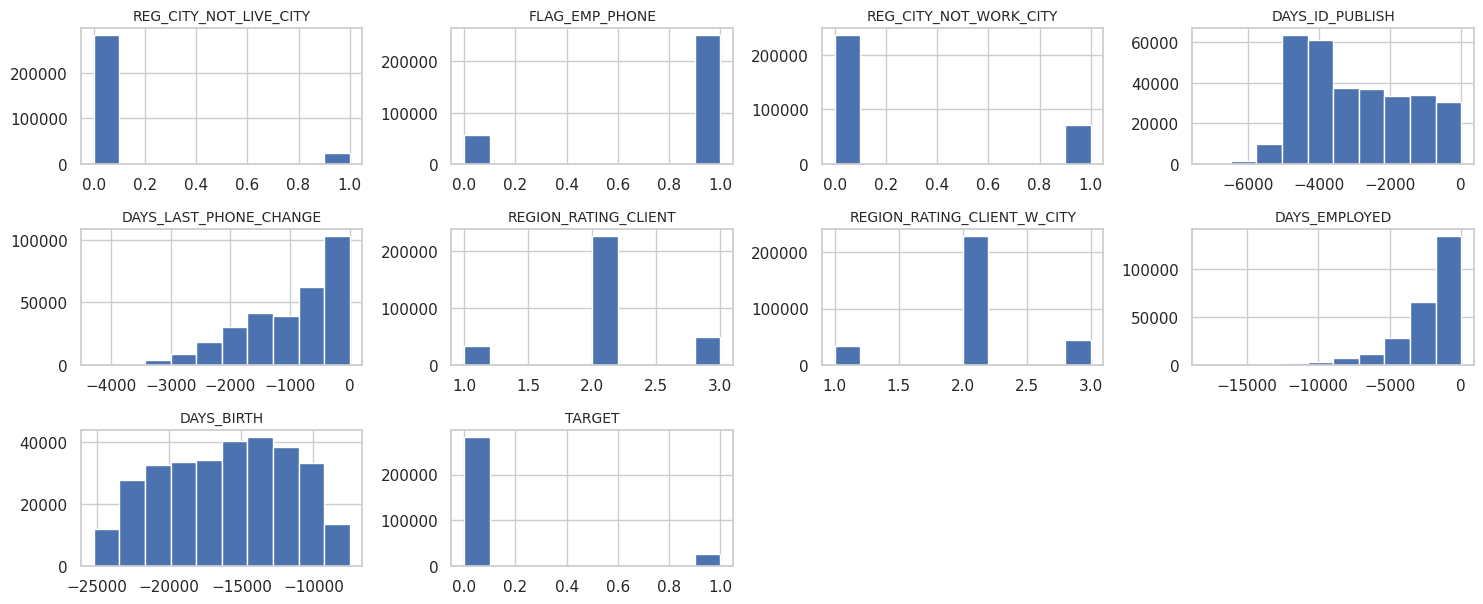

In [ ]:
var_pos_corr = correlations.tail(10).index.values
numVar = var_pos_corr.shape[0]

plt.figure(figsize=(15,20))
for i,var in enumerate(var_pos_corr):
    dflt_var = datasets["application_train"].loc[datasets["application_train"]['TARGET']==1,var]
    dflt_non_var = datasets["application_train"].loc[datasets["application_train"]['TARGET']==0,var]

    plt.subplot(numVar,4,i+1)
    datasets["application_train"][var].hist()
    plt.title(var, fontsize = 10)
    plt.tight_layout()
plt.show()

Observations:
- Historgrams used to plot the distribution of the highly correlated variables

In [ ]:
def cat_features_plot(datasets, df_name):
    df = datasets[df_name]
    df['TARGET'].replace(0, "No Default", inplace=True)
    df['TARGET'].replace(1, "Default", inplace=True)

#     df.select_dtypes('object')
    categorical_col = []

    for col in df:
        if df[col].dtype == 'object':
            categorical_col.append(col)

    # print("The numerical olumns are: \n \n ",numerical_col)
    #print("The categorical columns are: \n \n ",categorical_col)

    # categorical_col = categorical_col[0:8]
    #print(int(len(categorical_col)))
    plot_x = int(len(categorical_col)/2)
    fig, ax = plt.subplots(plot_x, 2, figsize=(20, 50))
    #plt.subplots_adjust(left=None, bottom=None, right=None,
                        #top=None, wspace=None, hspace=0.45)

    num = 0
    for i in range(0, 8):
        for j in range(0,2):
            tst = sns.countplot(x=categorical_col[num],
                               data=df, hue='TARGET', ax=ax[i][j])
            tst.set_title(f"Distribution of the {categorical_col[num]}  Variable.")
            tst.set_xticklabels(tst.get_xticklabels(), rotation=90)
            plt.subplots_adjust(left=None, bottom=None, right=None,
                        top=None, wspace=None, hspace=0.45)
            num = num + 1
            plt.tight_layout()

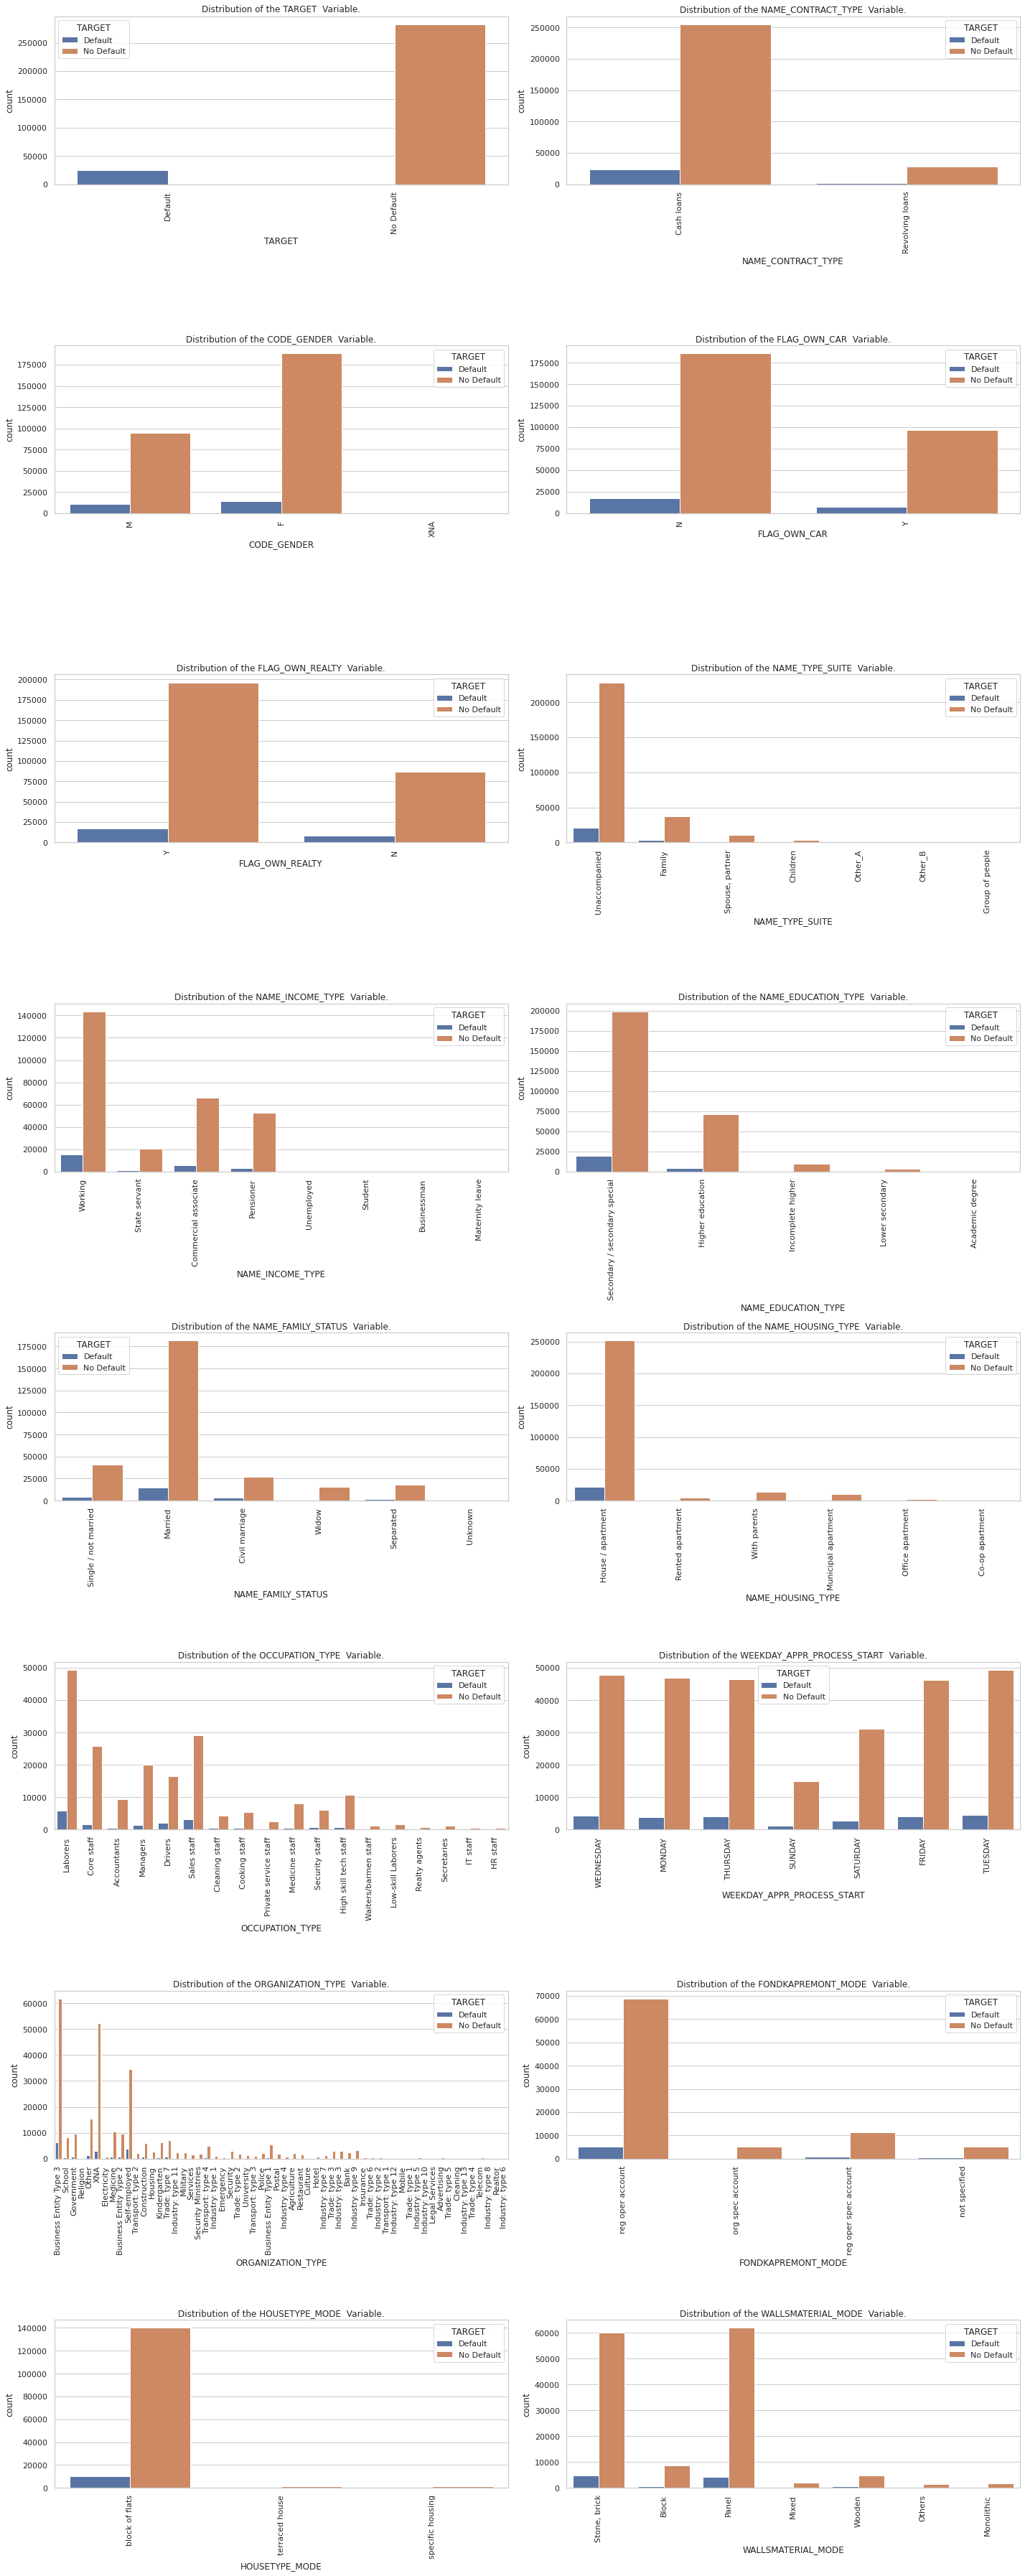

In [ ]:
cat_features_plot(datasets, "application_train")

Observations:
-  Defaulters among the highly categorical features are seen in most, highlighting Organization Type, Family Type , Occupation Type & Education.

Observations:
**Correlation Map of Numerical Variables**

* Strong correlation between amount credit and amount goods price
* Strong correlation between days birth and days employed
* strong correlation between ext source 1 and days birth
* These might be good candidates to do some feature engineering in.

In [ ]:
num_attribs = ['TARGET', 'AMT_INCOME_TOTAL',  'AMT_CREDIT', 'DAYS_EMPLOYED',
               'DAYS_BIRTH', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'AMT_GOODS_PRICE']
df = datasets["application_train"].copy()
df2 = df[num_attribs]
corr = df2.corr()
corr.style.background_gradient(cmap='PuBu').set_precision(2)

## Density Plots

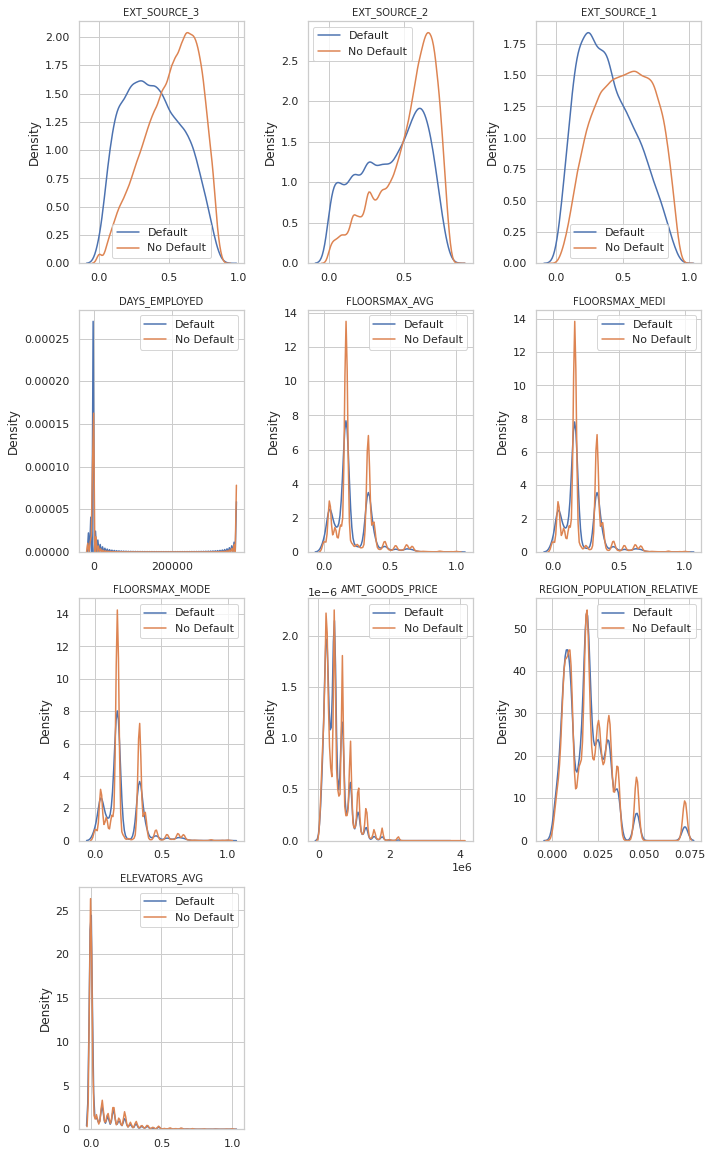

In [ ]:
var_neg_corr = correlations.head(10).index.values
numVar = var_neg_corr.shape[0]

plt.figure(figsize=(10,40))
for i,var in enumerate(var_neg_corr):
    dflt_var = datasets["application_train"].loc[datasets["application_train"]['TARGET']==1,var]
    dflt_non_var = datasets["application_train"].loc[datasets["application_train"]['TARGET']==0,var]

    plt.subplot(numVar,3,i+1)
    plt.subplots_adjust(wspace=2)
    sns.kdeplot(dflt_var,label='Default')
    sns.kdeplot(dflt_non_var,label='No Default')
    #plt.xlabel(var)
    plt.ylabel('Density')
    plt.title(var, fontsize = 10)
    plt.tight_layout()
plt.show()

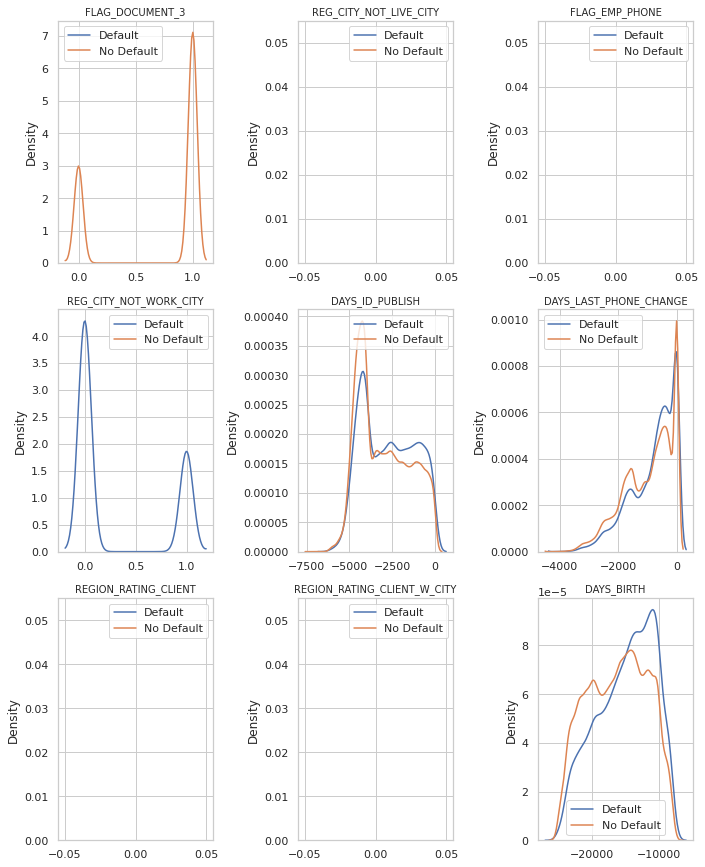

In [ ]:
var_pos_corr = correlations.tail(10).index.values
numVar = var_pos_corr.shape[0]

plt.figure(figsize=(10,40))
for i,var in enumerate(var_pos_corr):
    dflt_var = datasets["application_train"].loc[datasets["application_train"]['TARGET']==1,var]
    dflt_non_var = datasets["application_train"].loc[datasets["application_train"]['TARGET']==0,var]
    if var=='TARGET':
      pass
    else:
      plt.subplot(numVar,3,i+1)
      plt.subplots_adjust(wspace=2)
      sns.kdeplot(dflt_var,label='Default')
      sns.kdeplot(dflt_non_var,label='No Default')
      #plt.xlabel(var)
      plt.ylabel('Density')
      plt.title(var, fontsize = 10)
      plt.tight_layout()
plt.show()

Observations:

- We plot the KDEs of the most positively (negatively) correlated features with the TARGET. This is to evaluate whether there are any strange distributions between the default and do not default items.

- If the distributions for each feature are very different for default and do not default, this is good and we should look out for this. So we can see that EXT_SOURCE_3 has the most different distributions between default and no default.

# Dataset questions
### Unique record for each SK_ID_CURR
Validating primary key for the datasets

In [ ]:
datasets.keys()

dict_keys(['application_test', 'application_train', 'bureau', 'bureau_balance', 'credit_card_balance', 'installments_payments', 'previous_application', 'POS_CASH_balance'])

In [ ]:
len(datasets["application_train"]["SK_ID_CURR"].unique()) == datasets["application_train"].shape[0]

True

In [ ]:
np.intersect1d(datasets["application_train"]["SK_ID_CURR"], datasets["application_test"]["SK_ID_CURR"])

array([], dtype=int64)

In [ ]:
datasets["application_test"].shape

(48744, 121)

In [ ]:
datasets["application_train"].shape

(307511, 122)

### previous applications for the submission file
The persons in the kaggle submission file have had previous applications in the `previous_application.csv`. 47,800 out 48,744 people have had previous appications.

In [ ]:
appsDF = datasets["previous_application"]

appsDF.shape

(1670214, 37)

In [ ]:
len(np.intersect1d(datasets["previous_application"]["SK_ID_CURR"], datasets["application_test"]["SK_ID_CURR"]))

47800

In [ ]:
print(f"There are  {appsDF.shape[0]:,} previous applications")

There are  1,670,214 previous applications


In [ ]:
# How many entries are there for each month?
prevAppCounts = appsDF['SK_ID_CURR'].value_counts(dropna=False)


In [ ]:
len(prevAppCounts[prevAppCounts >40])  #more that 40 previous applications

101

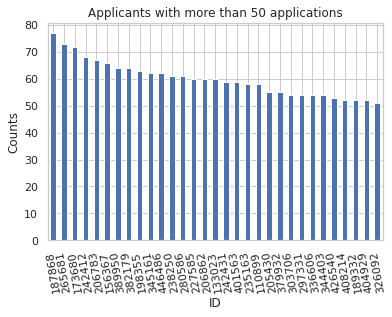

In [ ]:
prevAppCounts[prevAppCounts >50].plot(kind='bar')
plt.xticks(rotation=100)
plt.xlabel('ID')
plt.ylabel('Counts')
plt.title('Applicants with more than 50 applications')
plt.show()

The above visual indicates that are applicants with more than 50 applications in the dataset.

### Histogram of Number of previous applications for an ID

In [ ]:
sum(appsDF['SK_ID_CURR'].value_counts()==1)

60458

Text(0.5, 1.0, 'Histogram of Number of previous applications for an ID')

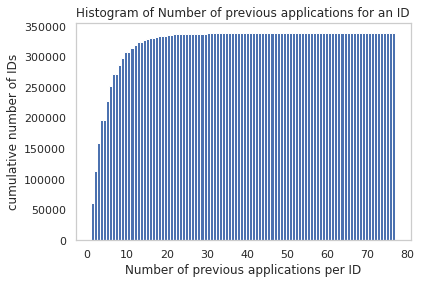

In [ ]:
plt.hist(appsDF['SK_ID_CURR'].value_counts(), cumulative =True, bins = 100);
plt.grid()
plt.ylabel('cumulative number of IDs')
plt.xlabel('Number of previous applications per ID')
plt.title('Histogram of Number of previous applications for an ID')


### Can we differentiate applications by low, medium and high previous apps?
    * Low = <5 claims (22%)
    * Medium = 10 to 39 claims (58%)
    * High = 40 or more claims (20%)

In [ ]:
apps_all = appsDF['SK_ID_CURR'].nunique()
apps_5plus = appsDF['SK_ID_CURR'].value_counts()>=5
apps_40plus = appsDF['SK_ID_CURR'].value_counts()>=40
print('Percentage with 10 or more previous apps:', np.round(100.*(sum(apps_5plus)/apps_all),5))
print('Percentage with 40 or more previous apps:', np.round(100.*(sum(apps_40plus)/apps_all),5))

Percentage with 10 or more previous apps: 41.76895
Percentage with 40 or more previous apps: 0.03453


# PHASE 3

# **Feature Engineering and Transformation**

# Joining tertiary, secondary & primary tables

In the case of the HCDR competition (and many other machine learning problems that involve multiple tables in 3NF or not)  we need to join these datasets (denormalize) when using a machine learning pipeline. Joining the secondary tables with the primary table will lead to lots of new features about each loan application; these features will tend to be aggregate type features or meta data about the loan or its application. How can we do this when using Machine Learning Pipelines?

## Joining `previous_application` with `application_x`
We refer to the `application_train` data (and also `application_test` data also) as the **primary table** and the other files as the **secondary tables** (e.g., `previous_application` dataset). All tables can be joined using the primary key `SK_ID_PREV`.

Let's assume we wish to generate a feature based on previous application attempts. In this case, possible features here could be:

* A simple feature could be the number of previous applications.
* Other summary features of original features such as `AMT_APPLICATION`, `AMT_CREDIT` could be based on average, min, max, median, etc.

To build such features, we need to join the `application_train` data (and also `application_test` data also) with the 'previous_application' dataset (and the other available datasets).

When joining this data in the context of pipelines, different strategies come to mind with various tradeoffs:

1. Preprocess each of the non-application data sets, thereby generating many new (derived) features, and then joining (aka merge) the results with the `application_train` data (the labeled dataset) and with the `application_test` data (the unlabeled submission dataset) prior to processing the data (in a train, valid, test partition) via your machine learning pipeline. [This approach is recommended for this HCDR competition. WHY?]

* Do the joins as part of the transformation steps. [Not recommended here. WHY?]. How can this be done? Will it work?
  * This would be necessary if we had dataset wide features such as IDF (inverse document frequency) which depend on the entire subset of data as opposed to a single loan application (e.g., a feature about the relative amount applied for such as the percentile of the loan amount being applied for).

I want you to think about this section and build on this.

## Roadmap for secondary table processing

1. Transform all the secondary tables to features that can be joined into the main table the application table (labeled and unlabeled)
   * 'bureau', 'bureau_balance', 'credit_card_balance', 'installments_payments',
   * 'previous_application', 'POS_CASH_balance'
* Merge the transformed secondary tables with the primary tables (i.e., the `application_train` data (the labeled dataset) and with the `application_test` data (the unlabeled submission dataset)), thereby leading to X_train, y_train, X_valid, etc.
* Proceed with the learning pipeline using X_train, y_train, X_valid, etc.
* Generate a submission file using the learnt model


## Feature Engineering for Primary , Secondary Tables & Tertiary

Observing Highly correlated features from all input datasets

Here we have to first select only numeric columns

In [ ]:
def correlation_files_target(df_name):
    A = datasets["application_train"].copy()
    B = datasets[df_name].copy()

    # Keep only numeric columns in B
    B_numeric = B.select_dtypes(include='number')

    # Concatenate TARGET from A with numeric columns of B
    merged = pd.concat([A["TARGET"], B_numeric], axis=1)

    # Compute correlation matrix
    correlation_matrix = merged.corr().filter(B_numeric.columns).filter(["TARGET"], axis=0)

    return correlation_matrix


In [ ]:
df_name = "previous_application"
correlation_matrix = correlation_files_target(df_name)
print(f"Correlation of the {df_name} against the Target is :")
correlation_matrix.T.TARGET.sort_values(ascending= False)

Correlation of the previous_application against the Target is :


AMT_DOWN_PAYMENT             0.002496
CNT_PAYMENT                  0.002341
DAYS_LAST_DUE_1ST_VERSION    0.001908
AMT_CREDIT                   0.001833
AMT_APPLICATION              0.001689
AMT_GOODS_PRICE              0.001676
SK_ID_CURR                   0.001107
NFLAG_INSURED_ON_APPROVAL    0.000879
RATE_DOWN_PAYMENT            0.000850
RATE_INTEREST_PRIMARY        0.000542
SK_ID_PREV                   0.000362
DAYS_DECISION               -0.000482
AMT_ANNUITY                 -0.000492
DAYS_FIRST_DUE              -0.000943
SELLERPLACE_AREA            -0.000954
DAYS_TERMINATION            -0.001072
NFLAG_LAST_APPL_IN_DAY      -0.001256
DAYS_FIRST_DRAWING          -0.001293
DAYS_LAST_DUE               -0.001940
HOUR_APPR_PROCESS_START     -0.002285
RATE_INTEREST_PRIVILEGED    -0.026427
Name: TARGET, dtype: float64

In [ ]:
df_name = "bureau"
correlation_matrix = correlation_files_target(df_name)
print(f"Correlation of the {df_name} against the Target is :")
correlation_matrix.T.TARGET.sort_values(ascending= False)

Correlation of the bureau against the Target is :


DAYS_CREDIT_UPDATE        0.002159
DAYS_CREDIT_ENDDATE       0.002048
SK_ID_BUREAU              0.001550
DAYS_CREDIT               0.001443
AMT_CREDIT_SUM            0.000218
DAYS_ENDDATE_FACT         0.000203
AMT_ANNUITY               0.000189
AMT_CREDIT_MAX_OVERDUE   -0.000389
CNT_CREDIT_PROLONG       -0.000495
AMT_CREDIT_SUM_LIMIT     -0.000558
AMT_CREDIT_SUM_DEBT      -0.000946
SK_ID_CURR               -0.001070
AMT_CREDIT_SUM_OVERDUE   -0.001464
CREDIT_DAY_OVERDUE       -0.001815
Name: TARGET, dtype: float64

In [ ]:
df_name = "bureau_balance"
correlation_matrix = correlation_files_target(df_name)
print(f"Correlation of the {df_name} against the Target is :")
correlation_matrix.T.TARGET.sort_values(ascending= False)

Correlation of the bureau_balance against the Target is :


SK_ID_BUREAU      0.001223
MONTHS_BALANCE   -0.005262
Name: TARGET, dtype: float64

In [ ]:
df_name = "credit_card_balance"
correlation_matrix = correlation_files_target(df_name)
print(f"Correlation of the {df_name} against the Target is :")
correlation_matrix.T.TARGET.sort_values(ascending= False)

Correlation of the credit_card_balance against the Target is :


CNT_DRAWINGS_ATM_CURRENT      0.001908
AMT_DRAWINGS_ATM_CURRENT      0.001520
AMT_INST_MIN_REGULARITY       0.001435
SK_ID_CURR                    0.001086
AMT_CREDIT_LIMIT_ACTUAL       0.000515
AMT_BALANCE                   0.000448
SK_ID_PREV                    0.000446
AMT_RECIVABLE                 0.000412
AMT_TOTAL_RECEIVABLE          0.000407
AMT_RECEIVABLE_PRINCIPAL      0.000383
SK_DPD                        0.000092
SK_DPD_DEF                   -0.000201
CNT_INSTALMENT_MATURE_CUM    -0.000342
MONTHS_BALANCE               -0.000768
AMT_PAYMENT_CURRENT          -0.001129
AMT_PAYMENT_TOTAL_CURRENT    -0.001395
AMT_DRAWINGS_CURRENT         -0.001419
CNT_DRAWINGS_CURRENT         -0.001764
CNT_DRAWINGS_OTHER_CURRENT   -0.001833
CNT_DRAWINGS_POS_CURRENT     -0.002387
AMT_DRAWINGS_OTHER_CURRENT   -0.002672
AMT_DRAWINGS_POS_CURRENT     -0.003518
Name: TARGET, dtype: float64

In [ ]:
df_name = "installments_payments"
correlation_matrix = correlation_files_target(df_name)
print(f"Correlation of the {df_name} against the Target is :")
correlation_matrix.T.TARGET.sort_values(ascending= False)

Correlation of the installments_payments against the Target is :


SK_ID_PREV                0.002891
NUM_INSTALMENT_VERSION    0.002511
NUM_INSTALMENT_NUMBER     0.000626
SK_ID_CURR               -0.000781
AMT_PAYMENT              -0.003512
DAYS_INSTALMENT          -0.003955
AMT_INSTALMENT           -0.003972
DAYS_ENTRY_PAYMENT       -0.004046
Name: TARGET, dtype: float64

In [ ]:
df_name = "POS_CASH_balance"
correlation_matrix = correlation_files_target(df_name)
print(f"Correlation of the {df_name} against the Target is :")

correlation_matrix.T.TARGET.sort_values(ascending= False)

Correlation of the POS_CASH_balance against the Target is :


CNT_INSTALMENT_FUTURE    0.002811
MONTHS_BALANCE           0.002775
SK_ID_PREV               0.002164
CNT_INSTALMENT           0.001434
SK_DPD                   0.000050
SK_ID_CURR              -0.000136
SK_DPD_DEF              -0.001362
Name: TARGET, dtype: float64

## Feature Aggregator Helper Function
<a id='newfeature'></a>

Functions required to perform feature aggregations are listed below

In [ ]:
class FeaturesAggregator(BaseEstimator, TransformerMixin):
    def __init__(self, file_name=None, features=None, funcs=None, primary_id = None): # no *args or **kargs
        self.file_name = file_name
        self.features = features
        self.funcs = funcs
        self.primary_id = primary_id
        self.agg_op_features = {}
        for f in self.features:
            temp = {f"{file_name}_{f}_{func}":func for func in self.funcs}
            self.agg_op_features[f]=[(k, v) for k, v in temp.items()]
        print(self.agg_op_features)

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        #from IPython.core.debugger import Pdb as pdb;    pdb().set_trace() #breakpoint; dont forget to quit
        result = X.groupby([self.primary_id]).agg(self.agg_op_features)
        result.columns = result.columns.droplevel()
        result = result.reset_index(level=[self.primary_id])
        return result # return dataframe with the join key "SK_ID_CURR"

In [ ]:
class engineer_features(BaseEstimator, TransformerMixin):
    def __init__(self, features=None):
        self

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):

# FROM APPLICATION
        # ADD INCOME CREDIT PERCENTAGE
        X['ef_INCOME_CREDIT_PERCENT'] = (
            X.AMT_INCOME_TOTAL / X.AMT_CREDIT).replace(np.inf, 0)

        # ADD INCOME PER FAMILY MEMBER
        X['ef_FAM_MEMBER_INCOME'] = (
            X.AMT_INCOME_TOTAL / X.CNT_FAM_MEMBERS).replace(np.inf, 0)

        # ADD ANNUITY AS PERCENTAGE OF ANNUAL INCOME
        X['ef_ANN_INCOME_PERCENT'] = (
            X.AMT_ANNUITY / X.AMT_INCOME_TOTAL).replace(np.inf, 0)

        return X

In [ ]:
class prep_OCCUPATION_TYPE(BaseEstimator, TransformerMixin):
    def __init__(self, features="OCCUPATION_TYPE"): # no *args or **kargs
        self.features = features
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        df = pd.DataFrame(X, columns=self.features)
        #from IPython.core.debugger import Pdb as pdb;    pdb().set_trace() #breakpoint; dont forget to quit
        df['OCCUPATION_TYPE'] = df['OCCUPATION_TYPE'].apply(lambda x: 1. if x in ['Core Staff', 'Accountants', 'Managers', 'Sales Staff', 'Medicine Staff', 'High Skill Tech Staff', 'Realty Agents', 'IT Staff', 'HR Staff'] else 0.)
        #df.drop(self.features, axis=1, inplace=True)
        return np.array(df.values)

In [ ]:
import gc

Creating a base copy of the data

In [ ]:
appsTrainDF = datasets['application_train']
appsTestDF = datasets['application_test']
prevAppsDF = datasets["previous_application"] #prev app
bureauDF = datasets["bureau"] #bureau app

bureaubalDF = datasets['bureau_balance']
ccbalDF = datasets["credit_card_balance"] #prev app


installmentspaymentsDF = datasets["installments_payments"] #bureau app
pos_cash_bal_DF = datasets["POS_CASH_balance"] #POS_CASH_balance app

Validating the shapes

In [ ]:
appsTrainDF.shape

(307511, 122)

In [ ]:
bureaubalDF.shape

(27299925, 3)

In [ ]:
ccbalDF.shape


(3840312, 23)

In [ ]:
installmentspaymentsDF.shape


(13605401, 8)

In [ ]:
pos_cash_bal_DF.shape

(10001358, 8)

In [ ]:
prevAppsDF.shape

(1670214, 37)

## Tertiary Datasets

The tertiary datasets or tables refer to bureau_balance, POS_CASH_balance, instalments_payments, credit_card_balance

In [ ]:
tertiaty_datasets=['bureau_balance','credit_card_balance','installments_payments','POS_CASH_balance']

###  Third Tier Custom - Domain Knowledge based features

Any domain based features that will aid in a better model have been included here. In the table credit card balance the payment difference can be value to predict risk.

In [ ]:
 # Difference between the monthly amount paid - the expected monthly amount
ccbalDF['payment_diff_curr_pay'] = ccbalDF['AMT_PAYMENT_TOTAL_CURRENT'] - ccbalDF['AMT_PAYMENT_CURRENT']
ccbalDF['payment_diff_min_pay'] = ccbalDF['AMT_PAYMENT_TOTAL_CURRENT'] - ccbalDF['AMT_INST_MIN_REGULARITY']
 # Difference between the monthly amount paid - the minimum monthly amount


###  Third Tier datasets Numerical feature aggregation

In [ ]:
# function to get the numerical features
def get_numattribs(ds_name):
  num_attribs=(datasets[ds_name].select_dtypes(include=['int64', 'float64']).columns.tolist())
  print()
  print('Numerical attributes for',ds_name,' : ',num_attribs)
  print()
  return num_attribs

Feature aggregation for the tertiary datasets

In [ ]:
# Aggregate across old and new features
# agg_funcs = ['min', 'max', 'mean', 'count', 'sum']
agg_funcs = ['min', 'max']

primary_id1 = "SK_ID_PREV"
primary_id2 = "SK_ID_BUREAU"


posBal_features = ['MONTHS_BALANCE','CNT_INSTALMENT','CNT_INSTALMENT_FUTURE']
instalPay_features = ['DAYS_INSTALMENT','AMT_INSTALMENT']
ccBal_features = ['AMT_BALANCE','AMT_DRAWINGS_CURRENT','payment_diff_curr_pay','payment_diff_min_pay']
burBal_features = ['MONTHS_BALANCE']


prevApps_features = ['AMT_APPLICATION','AMT_CREDIT','AMT_ANNUITY'] # NO MISSING VALUES
bureau_features = ['AMT_CREDIT_SUM']

cc_features_pipeline = Pipeline([

    ('credit_card_num_aggregator', FeaturesAggregator('credit_card_balance',ccBal_features , agg_funcs, primary_id1)),
    ])

installment_features_pipeline = Pipeline([
    ('installment_num_aggregator', FeaturesAggregator('installments_payments',instalPay_features, agg_funcs, primary_id1)),
    ])

POS_CASH_balance_pipeline = Pipeline([
    ('POS_CASH_balance', FeaturesAggregator('POS_CASH_balance' ,posBal_features , agg_funcs, primary_id1)),
    ])

bureau_balance_feature_pipeline = Pipeline([
    ('bureau_balance', FeaturesAggregator('bureau_balance' ,burBal_features , agg_funcs, primary_id2)),
    ])

{'AMT_BALANCE': [('credit_card_balance_AMT_BALANCE_min', 'min'), ('credit_card_balance_AMT_BALANCE_max', 'max')], 'AMT_DRAWINGS_CURRENT': [('credit_card_balance_AMT_DRAWINGS_CURRENT_min', 'min'), ('credit_card_balance_AMT_DRAWINGS_CURRENT_max', 'max')], 'payment_diff_curr_pay': [('credit_card_balance_payment_diff_curr_pay_min', 'min'), ('credit_card_balance_payment_diff_curr_pay_max', 'max')], 'payment_diff_min_pay': [('credit_card_balance_payment_diff_min_pay_min', 'min'), ('credit_card_balance_payment_diff_min_pay_max', 'max')]}
{'DAYS_INSTALMENT': [('installments_payments_DAYS_INSTALMENT_min', 'min'), ('installments_payments_DAYS_INSTALMENT_max', 'max')], 'AMT_INSTALMENT': [('installments_payments_AMT_INSTALMENT_min', 'min'), ('installments_payments_AMT_INSTALMENT_max', 'max')]}
{'MONTHS_BALANCE': [('POS_CASH_balance_MONTHS_BALANCE_min', 'min'), ('POS_CASH_balance_MONTHS_BALANCE_max', 'max')], 'CNT_INSTALMENT': [('POS_CASH_balance_CNT_INSTALMENT_min', 'min'), ('POS_CASH_balance_CNT_

### Step 1: Merge Tier 3 with Tier 2

In [ ]:
bureaubal_aggregated = bureau_balance_feature_pipeline.fit_transform(bureaubalDF)
ccblance_aggregated = cc_features_pipeline.fit_transform(ccbalDF)
installments_pmnts_aggregated = installment_features_pipeline.fit_transform(installmentspaymentsDF)
pos_cash_bal_aggregated = POS_CASH_balance_pipeline.fit_transform(pos_cash_bal_DF)

Merging the aggregated features for pos_cash_bal , installments_pmnts , credit card balance with Previous application

In [ ]:
prevApps_ThirdTierMerge = True

posBal_join_feature = 'SK_ID_PREV'
prevApps_join_feature = 'SK_ID_CURR'
bureau_join_feature = 'SK_ID_CURR'
instalPay_join_feature = 'SK_ID_PREV'
ccBal_join_feature = 'SK_ID_PREV'
burBal_join_feature = 'SK_ID_BUREAU'


if prevApps_ThirdTierMerge:
  # Merge Datasets
  prevAppsDF = prevAppsDF.merge(pos_cash_bal_aggregated, how='left', on=posBal_join_feature)
  prevAppsDF = prevAppsDF.merge(installments_pmnts_aggregated, how='left', on=instalPay_join_feature)
  prevAppsDF = prevAppsDF.merge(ccblance_aggregated, how='left', on=ccBal_join_feature)


  prevApps_features.extend(installments_pmnts_aggregated.columns[1:])
  prevApps_features.extend(ccblance_aggregated.columns[1:])
  prevApps_features.extend(pos_cash_bal_aggregated.columns[1:])



Merging the aggregated features the dataset Bureau Balance with Bureau as per the data model.

In [ ]:
bureau_ThirdTierMerge = True

if bureau_ThirdTierMerge:
  # Merge Dataset
  bureauDF = bureauDF.merge(bureaubal_aggregated, how='left', on=burBal_join_feature)

  # Add Created Features
  bureau_features.extend(bureaubal_aggregated.columns[1:])

## Secondary Datasets

###  Second Tier datasets Numerical feature aggregation

In [ ]:
#agg_funcs = ['min', 'max', 'mean', 'count', 'sum']
agg_funcs = ['count', 'max', 'min', 'sum']
primary_id1 = "SK_ID_CURR"


prevApps_feature_pipeline = Pipeline([
    ('prevApps', FeaturesAggregator('prevApps' ,prevApps_features , agg_funcs, primary_id1)),
    ])

bureau_feature_pipeline = Pipeline([
    ('bureau', FeaturesAggregator('bureau' ,bureau_features , agg_funcs, primary_id1)),
    ])


{'AMT_APPLICATION': [('prevApps_AMT_APPLICATION_count', 'count'), ('prevApps_AMT_APPLICATION_max', 'max'), ('prevApps_AMT_APPLICATION_min', 'min'), ('prevApps_AMT_APPLICATION_sum', 'sum')], 'AMT_CREDIT': [('prevApps_AMT_CREDIT_count', 'count'), ('prevApps_AMT_CREDIT_max', 'max'), ('prevApps_AMT_CREDIT_min', 'min'), ('prevApps_AMT_CREDIT_sum', 'sum')], 'AMT_ANNUITY': [('prevApps_AMT_ANNUITY_count', 'count'), ('prevApps_AMT_ANNUITY_max', 'max'), ('prevApps_AMT_ANNUITY_min', 'min'), ('prevApps_AMT_ANNUITY_sum', 'sum')], 'installments_payments_DAYS_INSTALMENT_min': [('prevApps_installments_payments_DAYS_INSTALMENT_min_count', 'count'), ('prevApps_installments_payments_DAYS_INSTALMENT_min_max', 'max'), ('prevApps_installments_payments_DAYS_INSTALMENT_min_min', 'min'), ('prevApps_installments_payments_DAYS_INSTALMENT_min_sum', 'sum')], 'installments_payments_DAYS_INSTALMENT_max': [('prevApps_installments_payments_DAYS_INSTALMENT_max_count', 'count'), ('prevApps_installments_payments_DAYS_INS

In [ ]:
prevApps_aggregated = prevApps_feature_pipeline.fit_transform(prevAppsDF)
bureau_aggregated = bureau_feature_pipeline.fit_transform(bureauDF)

In [ ]:
prevApps_aggregated.columns

Index(['SK_ID_CURR', 'prevApps_AMT_APPLICATION_count',
       'prevApps_AMT_APPLICATION_max', 'prevApps_AMT_APPLICATION_min',
       'prevApps_AMT_APPLICATION_sum', 'prevApps_AMT_CREDIT_count',
       'prevApps_AMT_CREDIT_max', 'prevApps_AMT_CREDIT_min',
       'prevApps_AMT_CREDIT_sum', 'prevApps_AMT_ANNUITY_count',
       'prevApps_AMT_ANNUITY_max', 'prevApps_AMT_ANNUITY_min',
       'prevApps_AMT_ANNUITY_sum',
       'prevApps_installments_payments_DAYS_INSTALMENT_min_count',
       'prevApps_installments_payments_DAYS_INSTALMENT_min_max',
       'prevApps_installments_payments_DAYS_INSTALMENT_min_min',
       'prevApps_installments_payments_DAYS_INSTALMENT_min_sum',
       'prevApps_installments_payments_DAYS_INSTALMENT_max_count',
       'prevApps_installments_payments_DAYS_INSTALMENT_max_max',
       'prevApps_installments_payments_DAYS_INSTALMENT_max_min',
       'prevApps_installments_payments_DAYS_INSTALMENT_max_sum',
       'prevApps_installments_payments_AMT_INSTALMENT_min_c

###  Second Tier Custom - Domain Knowledge based features


In [ ]:
prevApps_aggregated['prevApps_AMT_APPLICATION_avg'] = (
   prevApps_aggregated['prevApps_AMT_APPLICATION_sum'] / prevApps_aggregated['prevApps_AMT_APPLICATION_count'] ).replace(np.inf, 0)

prevApps_aggregated['prevApps_AMT_APPLICATION_range'] = (
   prevApps_aggregated['prevApps_AMT_APPLICATION_max'] - prevApps_aggregated['prevApps_AMT_APPLICATION_min'] ).replace(np.inf, 0)


bureau_aggregated['bureau_AMT_CREDIT_SUM_avg'] = (
   bureau_aggregated['bureau_AMT_CREDIT_SUM_sum'] / bureau_aggregated['bureau_AMT_CREDIT_SUM_count'] ).replace(np.inf, 0)

bureau_aggregated['bureau_AMT_APPLICATION_range'] = (
   bureau_aggregated['bureau_AMT_CREDIT_SUM_max'] - bureau_aggregated['bureau_AMT_CREDIT_SUM_min'] ).replace(np.inf, 0)

## Primary Datasets

### Merge Aggregated Dataset With Tier 1 Tables - Train and Test

Prior to merging with the Primary data, we will be dropping columns with more than 50% missing values because they are not reliable parameters.

In [ ]:
appsTrainDF = datasets["application_train"]
X_kaggle_test = datasets["application_test"]

df_missing = pd.DataFrame(np.round((appsTrainDF.isna().sum()/ appsTrainDF.shape[0]) * 100, 2), columns=['Percent'], index= appsTrainDF.columns)
df_missing_50_cols = df_missing[df_missing.Percent >= 50].index

# Drop
appsTrainDF.drop(columns=df_missing_50_cols, inplace=True)
X_kaggle_test.drop(columns=df_missing_50_cols, inplace=True)

In [ ]:
appsTrainDF.shape

(307511, 81)

In [ ]:
X_kaggle_test.shape

(48744, 80)

In [ ]:
merge_all_data = True

if merge_all_data:
# 1. Join/Merge in prevApps Data
    appsTrainDF = appsTrainDF.merge(prevApps_aggregated, how='left', on='SK_ID_CURR')
    X_kaggle_test = X_kaggle_test.merge(prevApps_aggregated, how='left', on='SK_ID_CURR')

# 2. Join/Merge in bureau Data
    appsTrainDF = appsTrainDF.merge(bureau_aggregated, how='left', on="SK_ID_CURR")
    X_kaggle_test = X_kaggle_test.merge(bureau_aggregated, how='left', on="SK_ID_CURR")

In [ ]:
appsTrainDF.shape

(307511, 181)

In [ ]:
X_kaggle_test.shape

(48744, 180)

### Custom - Domain Knowledge based Features

In [ ]:
# Training dataset
appsTrainDF['DAYS_EMPLOYED_PCT'] = appsTrainDF['DAYS_EMPLOYED'] / appsTrainDF['DAYS_BIRTH']
appsTrainDF['CREDIT_INCOME_PCT'] = appsTrainDF['AMT_CREDIT'] / appsTrainDF['AMT_INCOME_TOTAL']
appsTrainDF['ANNUITY_INCOME_PCT'] = appsTrainDF['AMT_ANNUITY'] / appsTrainDF['AMT_INCOME_TOTAL']
appsTrainDF['CREDIT_TERM'] = appsTrainDF['AMT_ANNUITY'] / appsTrainDF['AMT_CREDIT']

# Test dataset
X_kaggle_test['DAYS_EMPLOYED_PCT'] = X_kaggle_test['DAYS_EMPLOYED'] / X_kaggle_test['DAYS_BIRTH']
X_kaggle_test['CREDIT_INCOME_PCT'] = X_kaggle_test['AMT_CREDIT'] / X_kaggle_test['AMT_INCOME_TOTAL']
X_kaggle_test['ANNUITY_INCOME_PCT'] = X_kaggle_test['AMT_ANNUITY'] / X_kaggle_test['AMT_INCOME_TOTAL']
X_kaggle_test['CREDIT_TERM'] = X_kaggle_test['AMT_ANNUITY'] / X_kaggle_test['AMT_CREDIT']

### Handle remaining missing values and null values
Fill NA values with 0, Execute Fillna(0)

In [ ]:
appsTrainDF[prevApps_aggregated.columns] = appsTrainDF[prevApps_aggregated.columns].fillna(0)
X_kaggle_test[prevApps_aggregated.columns] = X_kaggle_test[prevApps_aggregated.columns].fillna(0)

appsTrainDF[bureau_aggregated.columns] = appsTrainDF[bureau_aggregated.columns].fillna(0)
X_kaggle_test[bureau_aggregated.columns] = X_kaggle_test[bureau_aggregated.columns].fillna(0)

In [ ]:
appsTrainDF.shape

(307511, 185)

In [ ]:
X_kaggle_test.shape

(48744, 184)

## Polynomial Features on numeric values of Application Train

One simple feature construction method is called polynomial features. In this method, we make features that are powers of existing features as well as interaction terms between existing features. For example, we can create variables EXT_SOURCE_1^2 and EXT_SOURCE_2^2 and also variables such as EXT_SOURCE_1 x EXT_SOURCE_2, EXT_SOURCE_1 x EXT_SOURCE_2^2, EXT_SOURCE_1^2 x EXT_SOURCE_2^2, and so on. These features that are a combination of multiple individual variables are called interaction terms because they capture the interactions between variables. In other words, while two variables by themselves may not have a strong influence on the target, combining them together into a single interaction variable might show a relationship with the target. Interaction terms are commonly used in statistical models to capture the effects of multiple variables.

In [ ]:
# Create aggregate features (via pipeline)
class polynomialFeatureAdder(BaseEstimator, TransformerMixin):
    def __init__(self, features=None, degree=4): # no *args or **kargs
        self.features = features
        self.polynomial_degree = degree


    def fit(self, X, y=None):
        return self

    def fit_transform(self, X, y=None):
        # print("X type from fit_transform",type(X))
        imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
        data = X[self.features]

        data_imputed = imp_mean.fit_transform(data)
        data = pd.DataFrame(data_imputed, columns=self.features)
        # print("imputed data : /n", data)
        poly_pipeline = Pipeline([
                                 ("poly_transformer",PolynomialFeatures(degree = self.polynomial_degree))
                                 ])
        poly_n_features = poly_pipeline.fit_transform(data, y)
        #poly_n_feature_names = poly_pipeline.get_params().get('poly_transformer').get_feature_names()
        poly_n_feature_names = poly_pipeline.named_steps['poly_transformer'].get_feature_names_out(self.features)
        poly_df_train = pd.DataFrame(poly_n_features, columns= poly_n_feature_names)

        return poly_df_train # return dataframe with polynomial features

 We can use a degree of 4 to see the results (when we are creating polynomial features, we want to avoid using too high of a degree, both because the number of features scales exponentially with the degree, and because we can run into problems with overfitting).

In [ ]:
#poly_features = [ 'EXT_SOURCE_1','EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']
poly_features = ['EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']

polynomial_features_pipeline = Pipeline([
                                ('poly_adder',polynomialFeatureAdder(poly_features, 4))
                              ])

polyDF = datasets['application_train']

polyDF[poly_features] = polyDF[poly_features].fillna(0)


polynomial_df_train = polynomial_features_pipeline.fit_transform(polyDF)


polynomial_df_train.head(1)

1  EXT_SOURCE_2  EXT_SOURCE_3  DAYS_BIRTH  EXT_SOURCE_2^2  \
0  1.0      0.262949      0.139376     -9461.0        0.069142   

   EXT_SOURCE_2 EXT_SOURCE_3  EXT_SOURCE_2 DAYS_BIRTH  EXT_SOURCE_3^2  \
0                   0.036649             -2487.756636        0.019426   

   EXT_SOURCE_3 DAYS_BIRTH  DAYS_BIRTH^2  ...  EXT_SOURCE_2^2 DAYS_BIRTH^2  \
0             -1318.634256    89510521.0  ...                 6.188933e+06   

   EXT_SOURCE_2 EXT_SOURCE_3^3  EXT_SOURCE_2 EXT_SOURCE_3^2 DAYS_BIRTH  \
0                     0.000712                              -48.326185   

   EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH^2  EXT_SOURCE_2 DAYS_BIRTH^3  \
0                            3.280441e+06              -2.226804e+11   

   EXT_SOURCE_3^4  EXT_SOURCE_3^3 DAYS_BIRTH  EXT_SOURCE_3^2 DAYS_BIRTH^2  \
0        0.000377                 -25.615272                 1.738796e+06   

   EXT_SOURCE_3 DAYS_BIRTH^3  DAYS_BIRTH^4  
0              -1.180316e+11  8.012133e+15  

[1 rows x 35 columns]

In [ ]:
appsTrainDF.columns.to_list()

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'YEARS_BEGINEXPLUATATION_AVG',
 'FLOORSMAX_AVG',
 'YEARS_BEGINEXPLUATATION_MODE',
 'FLOORSMAX_MODE'

In [ ]:
print(polyDF.columns.tolist())


['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG', 'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE', 'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_

In [ ]:
#poly_features = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']
poly_features = [ 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']

polynomial_features_pipeline = Pipeline([
                                ('poly_adder',polynomialFeatureAdder(poly_features, 4))
                              ])

polyDF = datasets['application_test']
polyDF[poly_features] = polyDF[poly_features].fillna(0)
polynomial_df_test = polynomial_features_pipeline.fit_transform(polyDF)

polynomial_df_train.index =  datasets['application_train'].index
polynomial_df_test.index = datasets['application_test'].index

polynomial_df_test.head(1)

1  EXT_SOURCE_2  EXT_SOURCE_3  DAYS_BIRTH  EXT_SOURCE_2^2  \
0  1.0      0.789654       0.15952    -19241.0        0.623554   

   EXT_SOURCE_2 EXT_SOURCE_3  EXT_SOURCE_2 DAYS_BIRTH  EXT_SOURCE_3^2  \
0                   0.125965             -15193.73937        0.025446   

   EXT_SOURCE_3 DAYS_BIRTH  DAYS_BIRTH^2  ...  EXT_SOURCE_2^2 DAYS_BIRTH^2  \
0             -3069.315478   370216081.0  ...                 2.308497e+08   

   EXT_SOURCE_2 EXT_SOURCE_3^3  EXT_SOURCE_2 EXT_SOURCE_3^2 DAYS_BIRTH  \
0                     0.003205                             -386.627243   

   EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH^2  EXT_SOURCE_2 DAYS_BIRTH^3  \
0                            4.663438e+07              -5.624967e+12   

   EXT_SOURCE_3^4  EXT_SOURCE_3^3 DAYS_BIRTH  EXT_SOURCE_3^2 DAYS_BIRTH^2  \
0        0.000648                 -78.103287                 9.420698e+06   

   EXT_SOURCE_3 DAYS_BIRTH^3  DAYS_BIRTH^4  
0              -1.136310e+12  1.370599e+17  

[1 rows x 35 columns]

In [ ]:
print(polynomial_df_train.shape)
print(polynomial_df_test.shape)


(307511, 35)
(48744, 35)


In [ ]:
print(appsTrainDF.shape)
print(X_kaggle_test.shape)


(307511, 185)
(48744, 184)


### Join the training dataset with polynomial features

In [ ]:
appsTrainDFpoly = pd.concat([appsTrainDF, polynomial_df_train])

In [ ]:
appsTrainDF.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'bureau_bureau_balance_MONTHS_BALANCE_max_count',
       'bureau_bureau_balance_MONTHS_BALANCE_max_max',
       'bureau_bureau_balance_MONTHS_BALANCE_max_min',
       'bureau_bureau_balance_MONTHS_BALANCE_max_sum',
       'bureau_AMT_CREDIT_SUM_avg', 'bureau_AMT_APPLICATION_range',
       'DAYS_EMPLOYED_PCT', 'CREDIT_INCOME_PCT', 'ANNUITY_INCOME_PCT',
       'CREDIT_TERM'],
      dtype='object', length=185)

**Join the unlabeled(test) with polynomial features.**

In [ ]:
X_kaggle_test_poly = pd.concat([X_kaggle_test, polynomial_df_test])

In [ ]:
X_kaggle_test.columns

Index(['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       ...
       'bureau_bureau_balance_MONTHS_BALANCE_max_count',
       'bureau_bureau_balance_MONTHS_BALANCE_max_max',
       'bureau_bureau_balance_MONTHS_BALANCE_max_min',
       'bureau_bureau_balance_MONTHS_BALANCE_max_sum',
       'bureau_AMT_CREDIT_SUM_avg', 'bureau_AMT_APPLICATION_range',
       'DAYS_EMPLOYED_PCT', 'CREDIT_INCOME_PCT', 'ANNUITY_INCOME_PCT',
       'CREDIT_TERM'],
      dtype='object', length=184)

In [ ]:
print(appsTrainDF.shape)
print(X_kaggle_test.shape)

(307511, 185)
(48744, 184)


In [ ]:
%config Completer.use_jedi = False
%config Completer.use_jedi = False

**Total numeric features in the application train df.**

In [ ]:
appsTrainDF.select_dtypes(include=['int64', 'float64']).columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       ...
       'bureau_bureau_balance_MONTHS_BALANCE_max_count',
       'bureau_bureau_balance_MONTHS_BALANCE_max_max',
       'bureau_bureau_balance_MONTHS_BALANCE_max_min',
       'bureau_bureau_balance_MONTHS_BALANCE_max_sum',
       'bureau_AMT_CREDIT_SUM_avg', 'bureau_AMT_APPLICATION_range',
       'DAYS_EMPLOYED_PCT', 'CREDIT_INCOME_PCT', 'ANNUITY_INCOME_PCT',
       'CREDIT_TERM'],
      dtype='object', length=172)

**Total Categorical features in the application train df.**

In [ ]:
appsTrainDF.select_dtypes(exclude=['int64', 'float64']).columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE',
       'EMERGENCYSTATE_MODE'],
      dtype='object')

**Deductions from the list of dtypes of the appsTrainDF**

* There 172 numerical features.
* There are 13 categorical features.
* The categorical features dont show up in the final correlation matrix of the appsTrainDF.

In [ ]:
appsTrainDF.dtypes.value_counts()

float64    131
int64       41
object      13
Name: count, dtype: int64

In [ ]:
start = time()
#correlation_with_all_features = appsTrainDF.corr()
correlation_with_all_features = appsTrainDF.select_dtypes(include=[np.number]).corr()

end = time()

In [ ]:
print("Time taken for correlation ", ctime(end - start))
print()
correlation_with_all_features['TARGET'].sort_values()

Time taken for correlation  Thu Jan  1 00:00:26 1970



EXT_SOURCE_3                  -0.178919
EXT_SOURCE_2                  -0.160472
DAYS_EMPLOYED                 -0.044932
FLOORSMAX_AVG                 -0.044003
FLOORSMAX_MEDI                -0.043768
                                 ...   
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, Length: 172, dtype: float64

In [ ]:
# correlation_with_all_features.reset_index(inplace= True)
len(correlation_with_all_features.index)

172

In [ ]:
# set this value to choose the number of positive and negative correlated features
n_val = 15


print("---"*15)
print("---"*15)

print("    Total correlation of all the features.    " )

print("---"*15)
print("---"*15)

print(f"Top {n_val} negative correlated features")
print()
print(correlation_with_all_features.TARGET.sort_values(ascending = True).head(n_val))
print()
print()
print(f"Top {n_val} positive correlated features")
print()
print(correlation_with_all_features.TARGET.sort_values(ascending = True).tail(n_val))

---------------------------------------------
---------------------------------------------
    Total correlation of all the features.    
---------------------------------------------
---------------------------------------------
Top 15 negative correlated features

EXT_SOURCE_3                                                -0.178919
EXT_SOURCE_2                                                -0.160472
DAYS_EMPLOYED                                               -0.044932
FLOORSMAX_AVG                                               -0.044003
FLOORSMAX_MEDI                                              -0.043768
FLOORSMAX_MODE                                              -0.043226
AMT_GOODS_PRICE                                             -0.039645
REGION_POPULATION_RELATIVE                                  -0.037227
TOTALAREA_MODE                                              -0.032596
prevApps_POS_CASH_balance_CNT_INSTALMENT_FUTURE_max_count   -0.030579
prevApps_POS_CASH_balance_CNT_IN

In [ ]:
correlation_with_all_features.TARGET.sort_values(ascending = True)[-n_val:]


prevApps_installments_payments_DAYS_INSTALMENT_max_min          0.042178
DAYS_EMPLOYED_PCT                                               0.042206
prevApps_POS_CASH_balance_MONTHS_BALANCE_max_min                0.042284
prevApps_credit_card_balance_payment_diff_curr_pay_min_count    0.043808
prevApps_credit_card_balance_payment_diff_curr_pay_max_count    0.043808
FLAG_DOCUMENT_3                                                 0.044346
REG_CITY_NOT_LIVE_CITY                                          0.044395
FLAG_EMP_PHONE                                                  0.045982
REG_CITY_NOT_WORK_CITY                                          0.050994
DAYS_ID_PUBLISH                                                 0.051457
DAYS_LAST_PHONE_CHANGE                                          0.055218
REGION_RATING_CLIENT                                            0.058899
REGION_RATING_CLIENT_W_CITY                                     0.060893
DAYS_BIRTH                                                      0.078239
TARGET                                                          1.000000
Name: TARGET, dtype: float64

In [ ]:
tf_apps_train_final = []

featureslist1 = correlation_with_all_features.TARGET.sort_values(ascending = True)[:n_val].index.tolist()
featureslist2 = correlation_with_all_features.TARGET.sort_values(ascending = True)[-n_val:].index.tolist()
tf_apps_train_final = featureslist1 + featureslist2


In [ ]:
tf_apps_train_final

['EXT_SOURCE_3',
 'EXT_SOURCE_2',
 'DAYS_EMPLOYED',
 'FLOORSMAX_AVG',
 'FLOORSMAX_MEDI',
 'FLOORSMAX_MODE',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'TOTALAREA_MODE',
 'prevApps_POS_CASH_balance_CNT_INSTALMENT_FUTURE_max_count',
 'prevApps_POS_CASH_balance_CNT_INSTALMENT_min_count',
 'prevApps_POS_CASH_balance_CNT_INSTALMENT_max_count',
 'prevApps_POS_CASH_balance_CNT_INSTALMENT_FUTURE_min_count',
 'prevApps_POS_CASH_balance_MONTHS_BALANCE_min_count',
 'prevApps_POS_CASH_balance_MONTHS_BALANCE_max_count',
 'prevApps_installments_payments_DAYS_INSTALMENT_max_min',
 'DAYS_EMPLOYED_PCT',
 'prevApps_POS_CASH_balance_MONTHS_BALANCE_max_min',
 'prevApps_credit_card_balance_payment_diff_curr_pay_min_count',
 'prevApps_credit_card_balance_payment_diff_curr_pay_max_count',
 'FLAG_DOCUMENT_3',
 'REG_CITY_NOT_LIVE_CITY',
 'FLAG_EMP_PHONE',
 'REG_CITY_NOT_WORK_CITY',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'DAYS_BIRTH',
 '

In [ ]:
#tf_apps_train_final.remove('TARGET')
print(len(tf_apps_train_final))
display((tf_apps_train_final))

30


['EXT_SOURCE_3',
 'EXT_SOURCE_2',
 'DAYS_EMPLOYED',
 'FLOORSMAX_AVG',
 'FLOORSMAX_MEDI',
 'FLOORSMAX_MODE',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'TOTALAREA_MODE',
 'prevApps_POS_CASH_balance_CNT_INSTALMENT_FUTURE_max_count',
 'prevApps_POS_CASH_balance_CNT_INSTALMENT_min_count',
 'prevApps_POS_CASH_balance_CNT_INSTALMENT_max_count',
 'prevApps_POS_CASH_balance_CNT_INSTALMENT_FUTURE_min_count',
 'prevApps_POS_CASH_balance_MONTHS_BALANCE_min_count',
 'prevApps_POS_CASH_balance_MONTHS_BALANCE_max_count',
 'prevApps_installments_payments_DAYS_INSTALMENT_max_min',
 'DAYS_EMPLOYED_PCT',
 'prevApps_POS_CASH_balance_MONTHS_BALANCE_max_min',
 'prevApps_credit_card_balance_payment_diff_curr_pay_min_count',
 'prevApps_credit_card_balance_payment_diff_curr_pay_max_count',
 'FLAG_DOCUMENT_3',
 'REG_CITY_NOT_LIVE_CITY',
 'FLAG_EMP_PHONE',
 'REG_CITY_NOT_WORK_CITY',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'DAYS_BIRTH',
 '

In [ ]:
appsTrainDF.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [ ]:
for idx in tf_apps_train_final:
  print(f"{idx:50}  {appsTrainDF[idx].dtypes}")

EXT_SOURCE_3                                        float64
EXT_SOURCE_2                                        float64
DAYS_EMPLOYED                                       int64
FLOORSMAX_AVG                                       float64
FLOORSMAX_MEDI                                      float64
FLOORSMAX_MODE                                      float64
AMT_GOODS_PRICE                                     float64
REGION_POPULATION_RELATIVE                          float64
TOTALAREA_MODE                                      float64
prevApps_POS_CASH_balance_CNT_INSTALMENT_FUTURE_max_count  float64
prevApps_POS_CASH_balance_CNT_INSTALMENT_min_count  float64
prevApps_POS_CASH_balance_CNT_INSTALMENT_max_count  float64
prevApps_POS_CASH_balance_CNT_INSTALMENT_FUTURE_min_count  float64
prevApps_POS_CASH_balance_MONTHS_BALANCE_min_count  float64
prevApps_POS_CASH_balance_MONTHS_BALANCE_max_count  float64
prevApps_installments_payments_DAYS_INSTALMENT_max_min  float64
DAYS_EMPLOYED_PCT       

In [ ]:
modeling_num_attrib = []
modeling_cat_attrib = []

for idx in tf_apps_train_final:
  if appsTrainDF[idx].dtypes in ['int64', 'float64']:
    modeling_num_attrib.append(idx)
  else:
    modeling_cat_attrib.append(idx)

print(len(modeling_num_attrib))
print(len(modeling_cat_attrib))

30
0


In [ ]:
# Convert categorical features to numerical approximations (via pipeline)
class ClaimAttributesAdder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        charlson_idx_dt = {'0': 0, '1-2': 2, '3-4': 4, '5+': 6}
        los_dt = {'1 day': 1, '2 days': 2, '3 days': 3, '4 days': 4, '5 days': 5, '6 days': 6,
          '1- 2 weeks': 11, '2- 4 weeks': 21, '4- 8 weeks': 42, '26+ weeks': 180}
        X['PayDelay'] = X['PayDelay'].apply(lambda x: int(x) if x != '162+' else int(162))
        X['DSFS'] = X['DSFS'].apply(lambda x: None if pd.isnull(x) else int(x[0]) + 1)
        X['CharlsonIndex'] = X['CharlsonIndex'].apply(lambda x: charlson_idx_dt[x])
        X['LengthOfStay'] = X['LengthOfStay'].apply(lambda x: None if pd.isnull(x) else los_dt[x])
        return X




# Preprocessing Data Pipeline

In [ ]:
#train_dataset = datasets["application_train"]
train_dataset=appsTrainDF
class_labels = ["No Default","Default"]

## HCDR preprocessing

### Column Selector

In [ ]:
# Create a class to select numerical or categorical columns since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

### Numerical Attributes

Identify the numeric features we wish to consider.

In [ ]:
num_attribs=train_dataset.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [ ]:
num_attribs.remove('TARGET')
num_attribs.remove('SK_ID_CURR')

In [ ]:
num_attribs

['CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'YEARS_BEGINEXPLUATATION_AVG',
 'FLOORSMAX_AVG',
 'YEARS_BEGINEXPLUATATION_MODE',
 'FLOORSMAX_MODE',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'FLOORSMAX_MEDI',
 'TOTALAREA_MODE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DO

### Numerical Pipeline definition

In [ ]:
num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', SimpleImputer(strategy='mean')),
        ('std_scaler', StandardScaler()),
    ])

### Categorical Attributes

#####  OHE when previously unseen unique values in the test/validation set

Train, validation and Test sets (and the leakage problem we have mentioned previously):



Let's look at a small usecase to tell us how to deal with this:

* The OneHotEncoder is fitted to the training set, which means that for each unique value present in the training set, for each feature, a new column is created. Let's say we have 39 columns after the encoding up from 30 (before preprocessing).
* The output is a numpy array (when the option sparse=False is used), which has the disadvantage of losing all the information about the original column names and values.
* When we try to transform the test set, after having fitted the encoder to the training set, we obtain a `ValueError`. This is because the there are new, previously unseen unique values in the test set and the encoder doesn’t know how to handle these values. In order to use both the transformed training and test sets in machine learning algorithms, we need them to have the same number of columns.

This last problem can be solved by using the option handle_unknown='ignore'of the OneHotEncoder, which, as the name suggests, will ignore previously unseen values when transforming the test set.



Here is a example that in action:

```python
# Identify the categorical features we wish to consider.
cat_attribs = ['CODE_GENDER', 'FLAG_OWN_REALTY','FLAG_OWN_CAR','NAME_CONTRACT_TYPE',
               'NAME_EDUCATION_TYPE','OCCUPATION_TYPE','NAME_INCOME_TYPE']

# Notice handle_unknown="ignore" in OHE which ignore values from the validation/test that
# do NOT occur in the training set
cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('ohe', OneHotEncoder(sparse=False, handle_unknown="ignore"))
    ])

```


In [ ]:
# Identify the categorical features we wish to consider.
# cat_attribs = ['CODE_GENDER', 'FLAG_OWN_REALTY','FLAG_OWN_CAR','NAME_CONTRACT_TYPE',
#                'NAME_EDUCATION_TYPE','OCCUPATION_TYPE','NAME_INCOME_TYPE']
cat_attribs = train_dataset.select_dtypes(exclude=['float64','int64']).columns.tolist()

In [ ]:
cat_attribs

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'EMERGENCYSTATE_MODE']

### Categorical Pipeline definition

In [ ]:
# Notice handle_unknown="ignore" in OHE which ignore values from the validation/test that
# do NOT occur in the training set
cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        ('imputer', SimpleImputer(strategy='most_frequent')),
        #('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('ohe', OneHotEncoder(sparse_output=False, handle_unknown="ignore"))
    ])

### Create Data Preparation Pipeline
With Feature union, combine numerical and categorical Pipeline together to prepare for Data pipeline

In [ ]:
data_prep_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

### Selected Features

In [ ]:
selected_features = num_attribs + cat_attribs
tot_features = f"{len(selected_features)}:   Num:{len(num_attribs)},    Cat:{len(cat_attribs)}"
#Total Feature selected for processing
tot_features

'183:   Num:170,    Cat:13'

# Evaluation metrics

Since HCDR is a Classification task, we are going to use the following metrics to measure the Model performance

In [ ]:
def pct(x):
    return round(100*x,3)

Define dataframe with all metrics included

In [ ]:
try:
    expLog
except NameError:
    expLog = pd.DataFrame(columns=["exp_name",
                                   "Train Acc",
                                   "Valid Acc",
                                   "Test  Acc",
                                   "Train AUC",
                                   "Valid AUC",
                                   "Test  AUC",
                                   "Train F1 Score",
                                   "Valid F1 Score",
                                   "Test F1 Score",
                                   "Train Log Loss",
                                   "Valid Log Loss",
                                   "Test Log Loss",
                                   "P Score",
                                   "Train Time",
                                   "Valid Time",
                                   "Test Time",
                                   "Description"
                                  ])

In [ ]:
# roc curve, precision recall curve for each model
fprs, tprs, precisions, recalls, names, scores, cvscores, pvalues, accuracy, cnfmatrix = list(), list(), list(), list(), list(), list(), list(), list(), list(), list()
features_list, final_best_clf,results = {}, {},[]

## Accuracy Score
This metric describes the fraction of correctly classified samples. In SKLearn, it can be modified to return solely the number of correct samples.Accuracy is the default scoring method for both logistic regression and k-Nearest Neighbors in scikit-learn.

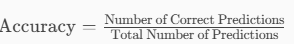



## Precision
The precision is the ratio of true positives over the total number of predicted positives.

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay

def precision_recall_cust(model, X_train, y_train, X_test, y_test, X_valid, y_valid, precisions, recalls, name):
    # Fit model on the training data
    model.fit(X_train, y_train)

    # Calculate precision and recall for the test set
    precision, recall, _ = precision_recall_curve(y_test, model.predict_proba(X_test)[:, 1])
    precisions.append(precision)
    recalls.append(recall)

    # Plot combined Precision-Recall curve for train, valid, test using PrecisionRecallDisplay
    fig, ax = plt.subplots(figsize=(8, 6))  # Create a new figure for plotting
    PrecisionRecallDisplay.from_estimator(model, X_train, y_train, name="Train Precision-Recall", ax=ax)
    PrecisionRecallDisplay.from_estimator(model, X_test, y_test, name="Test Precision-Recall", ax=ax)
    PrecisionRecallDisplay.from_estimator(model, X_valid, y_valid, name="Valid Precision-Recall", ax=ax)

    # Set the title and add legend
    ax.set_title("Precision-Recall Curve Comparison - " + name)
    ax.legend(loc="upper left", bbox_to_anchor=(1.04, 1), borderaxespad=0)

    # Show the plot
    plt.show()

    return precisions, recalls


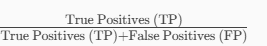

## Recall
The recall is the ratio of true positives over the true positives and false negatives. Recall is assessing the ability of the classifier to find all the positive samples. The best value is 1 and the worst value is 0



---

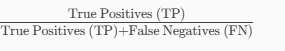

## F1 score
The F1 score is a metric that has a value of 0 - 1, with 1 being the best value. The F1 score is a weighted average of the precision and recall, with the contributions of precision and recall are the same


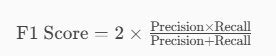

## Confusion Matrix
The confusion matrix, in this case for a binary classification, is a 2x2 matrix that contains the count of the true positives, false positives, true negatives, and false negatives.  


In [ ]:
def confusion_matrix_def(model,X_train,y_train,X_test, y_test, X_valid, y_valid,cnfmatrix):
  #Prediction
  preds_test = model.predict(X_test)
  preds_train = model.predict(X_train)
  preds_valid = model.predict(X_valid)

  cm_train = confusion_matrix(y_train, preds_train).astype(np.float32)
  #print(cm_train)
  cm_train /= cm_train.sum(axis=1)[:, np.newaxis]

  cm_test = confusion_matrix(y_test, preds_test).astype(np.float32)
  #print(cm_test)
  cm_test /= cm_test.sum(axis=1)[:, np.newaxis]

  cm_valid = confusion_matrix(y_valid, preds_valid).astype(np.float32)
  cm_valid /= cm_valid.sum(axis=1)[:, np.newaxis]

  plt.figure(figsize=(16, 4))
  #plt.subplots(1,3,figsize=(12,4))

  plt.subplot(131)
  g = sns.heatmap(cm_train, vmin=0, vmax=1, annot=True, cmap="Reds")
  plt.xlabel("Predicted", fontsize=14)
  plt.ylabel("True", fontsize=14)
  g.set(xticklabels=class_labels, yticklabels=class_labels)
  plt.title("Train", fontsize=14)

  plt.subplot(132)
  g = sns.heatmap(cm_valid, vmin=0, vmax=1, annot=True, cmap="Reds")
  plt.xlabel("Predicted", fontsize=14)
  plt.ylabel("True", fontsize=14)
  g.set(xticklabels=class_labels, yticklabels=class_labels)
  plt.title("Validation set", fontsize=14);

  plt.subplot(133)
  g = sns.heatmap(cm_test, vmin=0, vmax=1, annot=True, cmap="Reds")
  plt.xlabel("Predicted", fontsize=14)
  plt.ylabel("True", fontsize=14)
  g.set(xticklabels=class_labels, yticklabels=class_labels)
  plt.title("Test", fontsize=14);
  cnfmatrix.append(cm_test)

  return cnfmatrix

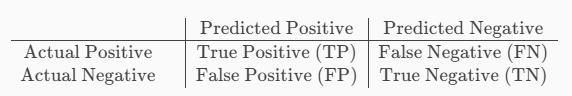

## AUC (Area under ROC curve)
An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:
▪	True Positive Rate
▪	False Positive Rate


AUC stands for "Area under the ROC Curve." That is, AUC measures the entire two-dimensional area underneath the entire ROC curve from (0,0) to (1,1).


AUC is desirable for the following two reasons:
1. AUC is scale-invariant. It measures how well predictions are ranked, rather than their absolute values.
2. AUC is classification-threshold-invariant. It measures the quality of the model's predictions irrespective of what classification threshold is chosen.

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, RocCurveDisplay

def roc_curve_cust(model, X_train, y_train, X_test, y_test, X_valid, y_valid, fprs, tprs, name):
    # Fit model on the training data
    model.fit(X_train, y_train)

    # Calculate ROC for the test set
    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    fprs.append(fpr)
    tprs.append(tpr)

    # Plot combined ROC curve for train, valid, test using RocCurveDisplay
    fig, ax = plt.subplots(figsize=(8, 6))  # Create a new figure for plotting
    RocCurveDisplay.from_estimator(model, X_train, y_train, name="Train ROC AUC", ax=ax)
    RocCurveDisplay.from_estimator(model, X_test, y_test, name="Test ROC AUC", ax=ax)
    RocCurveDisplay.from_estimator(model, X_valid, y_valid, name="Valid ROC AUC", ax=ax)

    # Set the title and add legend
    ax.set_title("ROC Curve Comparison - " + name)
    ax.legend(loc="upper left", bbox_to_anchor=(1.04, 1), borderaxespad=0)

    # Show the plot
    plt.show()

    return fprs, tprs


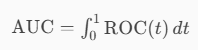

## Binary cross-entropy loss (CXE)
CXE measures the performance of a classification model whose output is a probability value between 0 and 1. CXE increases as the predicted probability diverges from the actual label. Therefore, we choose a parameter, which would minimize the binary CXE loss function.

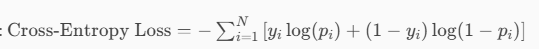

## p-value
p-value is the probability of obtaining test results at least as extreme as the results actually observed, under the assumption that the null hypothesis is correct. A very small p-value means that such an extreme observed outcome would be very unlikely under the null hypothesis.

We will compare the classifiers with the baseline untuned model by conducting two-tailed hypothesis test.

Null Hypothesis, H0: There is no significant difference between the two machine learning pipelines.
Alternate Hypothesis, HA: The two machine learning pipelines are different.
A p-value less than or equal to the significance level is considered statistically significant.

image.png

In [ ]:
metrics = {'accuracy': make_scorer(accuracy_score),
            'roc_auc': 'roc_auc',
            'f1': make_scorer(f1_score),
            'log_loss': make_scorer(log_loss)
          }

# Baseline model with Imbalanced Dataset
## Create Train and Test Datasets

In [ ]:
# Split Sample to feed the pipeline and it will result in a new dataset that is (1 / splits) the size
splits = 50

# Train Test split percentage
subsample_rate = 0.3

finaldf = np.array_split(train_dataset, splits)
X_train = finaldf[0][selected_features]
y_train = finaldf[0]['TARGET']
X_kaggle_test= X_kaggle_test[selected_features]

## split part of data
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, stratify=y_train,
                                                    test_size=subsample_rate, random_state=42)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train,stratify=y_train,test_size=0.15, random_state=42)

print(f"X train           shape: {X_train.shape}")
print(f"X validation      shape: {X_valid.shape}")
print(f"X test            shape: {X_test.shape}")
print(f"X kaggle_test     shape: {X_kaggle_test.shape}")

X train           shape: (3659, 183)
X validation      shape: (646, 183)
X test            shape: (1846, 183)
X kaggle_test     shape: (48744, 183)


## Define pipeline

In [ ]:
%%time
np.random.seed(42)
full_pipeline_with_predictor = Pipeline([
        ("preparation", data_prep_pipeline),
        ("linear", LogisticRegression())
    ])

CPU times: user 62 µs, sys: 0 ns, total: 62 µs
Wall time: 67 µs


## Perform cross-fold validation and Train the model
Split the training data to 15 fold to perform Crossfold validation

In [ ]:
cvSplits = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)

In [ ]:
X_train.head(5)

CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
5362             0          157500.0    312768.0      24840.0   
5150             0          112500.0    397881.0      22347.0   
5841             0           51750.0    135000.0       6750.0   
2399             0          171000.0    675000.0      45108.0   
2564             0          157500.0    505642.5      22401.0   

      AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
5362         270000.0                    0.020246      -14502          -1093   
5150         328500.0                    0.018634      -14875          -2201   
5841         135000.0                    0.031329      -20383         365243   
2399         675000.0                    0.072508      -19026          -3313   
2564         436500.0                    0.046220      -15010          -4028   

      DAYS_REGISTRATION  DAYS_ID_PUBLISH  ...  FLAG_OWN_REALTY  \
5362             -108.0            -1112  ...                Y   
5150            -4659.0            -4268  ...                Y   
5841            -3830.0            -3946  ...                Y   
2399            -1771.0            -1815  ...                Y   
2564            -8826.0            -5126  ...                Y   

      NAME_TYPE_SUITE      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
5362    Unaccompanied               Working  Secondary / secondary special   
5150    Unaccompanied               Working  Secondary / secondary special   
5841    Unaccompanied             Pensioner  Secondary / secondary special   
2399    Unaccompanied               Working  Secondary / secondary special   
2564    Unaccompanied  Commercial associate  Secondary / secondary special   

      NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  OCCUPATION_TYPE  \
5362           Separated  House / apartment         Laborers   
5150             Married  House / apartment      Sales staff   
5841             Married  House / apartment              NaN   
2399             Married  House / apartment              NaN   
2564           Separated  House / apartment         Laborers   

      WEEKDAY_APPR_PROCESS_START       ORGANIZATION_TYPE  EMERGENCYSTATE_MODE  
5362                      MONDAY  Business Entity Type 2                   No  
5150                      MONDAY           Self-employed                  NaN  
5841                   WEDNESDAY                     XNA                  NaN  
2399                      FRIDAY  Business Entity Type 3                   No  
2564                    THURSDAY  Business Entity Type 3                  NaN  

[5 rows x 183 columns]

In [ ]:
start = time()
model = full_pipeline_with_predictor.fit(X_train, y_train)
np.random.seed(42)

# Set up cross validation scores
logit_scores = cross_validate(model, X_train, y_train,cv=cvSplits,scoring=metrics, return_train_score=True, n_jobs=-1)
train_time = np.round(time() - start, 4)

# Time and score valid predictions
start = time()
logit_score_valid  = full_pipeline_with_predictor.score(X_valid, y_valid)
valid_time = np.round(time() - start, 4)

# Time and score test predictions
start = time()
logit_score_test  = full_pipeline_with_predictor.score(X_test, y_test)
test_time = np.round(time() - start, 4)

## Calculate metrics

In [ ]:
exp_name = f"Baseline_{len(selected_features)}_features"
expLog.loc[len(expLog)] = [f"{exp_name}"] + list(np.round(
               [logit_scores['train_accuracy'].mean(),
                logit_scores['test_accuracy'].mean(),
                accuracy_score(y_test, model.predict(X_test)),
                logit_scores['train_roc_auc'].mean(),
                logit_scores['test_roc_auc'].mean(),
                roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]),
                logit_scores['train_f1'].mean(),
                logit_scores['test_f1'].mean(),
                f1_score(y_test, model.predict(X_test)),
                logit_scores['train_log_loss'].mean(),
                logit_scores['test_log_loss'].mean(),
                log_loss(y_test, model.predict(X_test)),0 ],4)) \
                + [train_time, logit_scores['score_time'].mean(), test_time] + [f"Imbalanced Logistic reg features {tot_features} with 20% training data"]
expLog


exp_name  Train Acc  Valid Acc  Test  Acc  Train AUC  \
0  Baseline_183_features     0.9275     0.9149     0.9117     0.8662   

   Valid AUC  Test  AUC  Train F1 Score  Valid F1 Score  Test F1 Score  \
0     0.7036     0.6836          0.2343          0.1015         0.0578   

   Train Log Loss  Valid Log Loss  Test Log Loss  P Score  Train Time  \
0          2.6121           3.066         3.1826      0.0      5.5524   

   Valid Time  Test Time                                        Description  
0    0.044272     0.0182  Imbalanced Logistic reg features 183:   Num:17...

## Confusion matrix

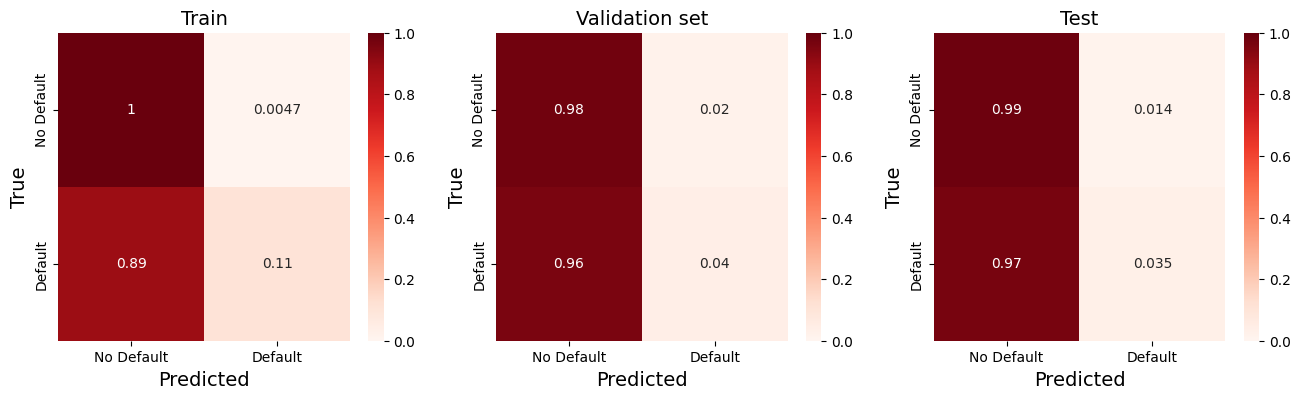

In [ ]:
# Create confusion matrix for baseline model
_=confusion_matrix_def(model,X_train,y_train,X_test,y_test,X_valid, y_valid,cnfmatrix)

## AUC (Area under ROC curve)

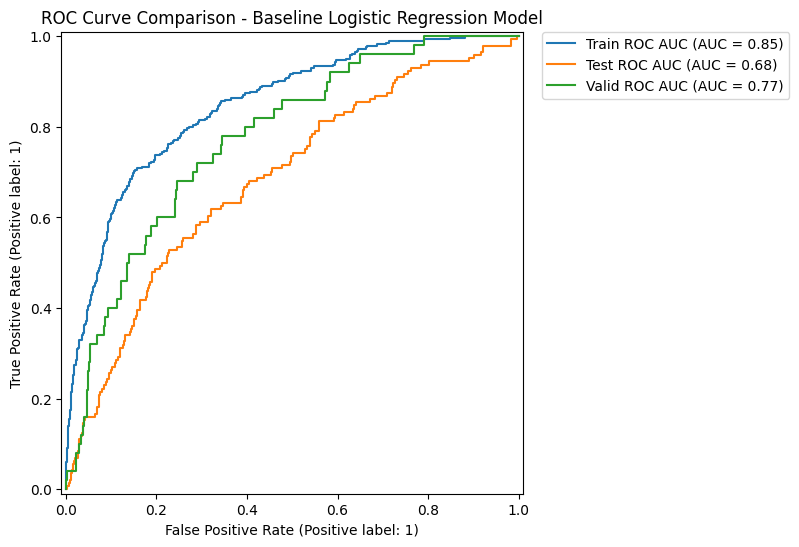

In [ ]:
_,_=roc_curve_cust(model,X_train,y_train,X_test, y_test,X_valid, y_valid,fprs,tprs,"Baseline Logistic Regression Model")

## Precision Recall Curve

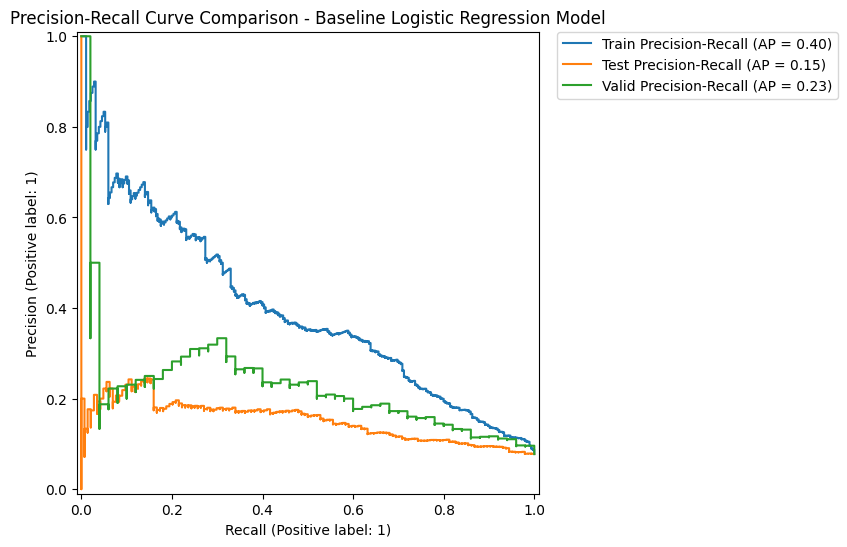

In [ ]:
_,_=precision_recall_cust(model,X_train,y_train,X_test, y_test,X_valid, y_valid,precisions,recalls,"Baseline Logistic Regression Model")

# Baseline Model - With sampled data

To get a baseline, we will use some of the features after being preprocessed through the pipeline.
The baseline model is a logistic regression model. Since 'No default and Default' target records are not balanced in trainging set, we are going to resample the minority class("Default with target value 1") to balance the input dataset

## Create Train and Test Datasets

In [ ]:
#X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train,stratify=y_train,test_size=0.15, random_state=42)

print(f"X train           shape: {X_train.shape}")
print(f"X validation      shape: {X_valid.shape}")
print(f"X test            shape: {X_test.shape}")
print(f"X X_kaggle_test   shape: {X_kaggle_test.shape}")

X train           shape: (3659, 183)
X validation      shape: (646, 183)
X test            shape: (1846, 183)
X X_kaggle_test   shape: (48744, 183)


In [ ]:
# Bincount shows the imbalanced data in Target default and no default class
np.bincount(y_train)

array([3374,  285])

## Resample Minority class
Resampling should be performed only in the train dataset, to avoid overfitting and data leakage.

In [ ]:
# concatenate our training data back together
train_data = pd.concat([X_train, y_train], axis=1)
train_data.head()

CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
5362             0          157500.0    312768.0      24840.0   
5150             0          112500.0    397881.0      22347.0   
5841             0           51750.0    135000.0       6750.0   
2399             0          171000.0    675000.0      45108.0   
2564             0          157500.0    505642.5      22401.0   

      AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
5362         270000.0                    0.020246      -14502          -1093   
5150         328500.0                    0.018634      -14875          -2201   
5841         135000.0                    0.031329      -20383         365243   
2399         675000.0                    0.072508      -19026          -3313   
2564         436500.0                    0.046220      -15010          -4028   

      DAYS_REGISTRATION  DAYS_ID_PUBLISH  ...  NAME_TYPE_SUITE  \
5362             -108.0            -1112  ...    Unaccompanied   
5150            -4659.0            -4268  ...    Unaccompanied   
5841            -3830.0            -3946  ...    Unaccompanied   
2399            -1771.0            -1815  ...    Unaccompanied   
2564            -8826.0            -5126  ...    Unaccompanied   

          NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  NAME_FAMILY_STATUS  \
5362               Working  Secondary / secondary special           Separated   
5150               Working  Secondary / secondary special             Married   
5841             Pensioner  Secondary / secondary special             Married   
2399               Working  Secondary / secondary special             Married   
2564  Commercial associate  Secondary / secondary special           Separated   

      NAME_HOUSING_TYPE  OCCUPATION_TYPE  WEEKDAY_APPR_PROCESS_START  \
5362  House / apartment         Laborers                      MONDAY   
5150  House / apartment      Sales staff                      MONDAY   
5841  House / apartment              NaN                   WEDNESDAY   
2399  House / apartment              NaN                      FRIDAY   
2564  House / apartment         Laborers                    THURSDAY   

           ORGANIZATION_TYPE  EMERGENCYSTATE_MODE  TARGET  
5362  Business Entity Type 2                   No       0  
5150           Self-employed                  NaN       0  
5841                     XNA                  NaN       0  
2399  Business Entity Type 3                   No       0  
2564  Business Entity Type 3                  NaN       0  

[5 rows x 184 columns]

**After resampling, both default and non-default classes are balanced**

In [ ]:
# separate minority and majority classes
no_default_data = train_data[train_data.TARGET==0]
default_data = train_data[train_data.TARGET==1]

# sample minority
default_sampled_data = resample(default_data,
                          replace=True, # sample with replacement
                          n_samples=len(no_default_data), # match number in majority class
                          random_state=42) # reproducible

# combine majority and upsampled minority
train_data = pd.concat([no_default_data, default_sampled_data])

train_data.TARGET.value_counts()

TARGET
0    3374
1    3374
Name: count, dtype: int64

In [ ]:
y_train = train_data['TARGET']
X_train = train_data[selected_features]

## Create a Pipeline with Baseline Model

In [ ]:
%%time
np.random.seed(42)
full_pipeline_with_predictor = Pipeline([
        ("preparation", data_prep_pipeline),
        ("linear", LogisticRegression())
    ])

CPU times: user 51 µs, sys: 10 µs, total: 61 µs
Wall time: 69.1 µs


## Create crossfold validation splits
Split the training data to 5 fold to perform Crossfold validation

In [ ]:
cvSplits = ShuffleSplit(n_splits=5, test_size=0.3, random_state=42)

## Baseline Prediction

In [ ]:
start = time()
model = full_pipeline_with_predictor.fit(X_train, y_train)
np.random.seed(42)

# Set up cross validation scores
logit_scores = cross_validate(model, X_train, y_train,cv=cvSplits,scoring=metrics, return_train_score=True, n_jobs=-1)
train_time = np.round(time() - start, 4)

# Time and score test predictions
start = time()
logit_score_valid  = full_pipeline_with_predictor.score(X_valid, y_valid)
valid_time = np.round(time() - start, 4)

# Time and score test predictions
start = time()
logit_score_test  = full_pipeline_with_predictor.score(X_test, y_test)
test_time = np.round(time() - start, 4)

## Baseline metrics

Accuracy, AUC score, F1 Score and Log loss used for measuring the baseline model

In [ ]:
exp_name = f"Baseline_{len(selected_features)}_features"
expLog.loc[len(expLog)] = [f"{exp_name}"] + list(np.round(
               [logit_scores['train_accuracy'].mean(),
                logit_scores['test_accuracy'].mean(),
                accuracy_score(y_test, model.predict(X_test)),
                logit_scores['train_roc_auc'].mean(),
                logit_scores['test_roc_auc'].mean(),
                roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]),
                logit_scores['train_f1'].mean(),
                logit_scores['test_f1'].mean(),
                f1_score(y_test, model.predict(X_test)),
                logit_scores['train_log_loss'].mean(),
                logit_scores['test_log_loss'].mean(),
                log_loss(y_test, model.predict(X_test)),0 ],4)) \
                + [train_time, logit_scores['score_time'].mean(), test_time] + [f"Balanced Logistic reg features {tot_features} with 20% training data"]
expLog

exp_name  Train Acc  Valid Acc  Test  Acc  Train AUC  \
0  Baseline_183_features     0.9275     0.9149     0.9117     0.8662   
1  Baseline_183_features     0.7996     0.7769     0.7151     0.8700   

   Valid AUC  Test  AUC  Train F1 Score  Valid F1 Score  Test F1 Score  \
0     0.7036     0.6836          0.2343          0.1015         0.0578   
1     0.8418     0.6488          0.8061          0.7839         0.2196   

   Train Log Loss  Valid Log Loss  Test Log Loss  P Score  Train Time  \
0          2.6121          3.0660         3.1826      0.0      5.5524   
1          7.2240          8.0417        10.2703      0.0      2.0746   

   Valid Time  Test Time                                        Description  
0    0.044272     0.0182  Imbalanced Logistic reg features 183:   Num:17...  
1    0.069212     0.0154  Balanced Logistic reg features 183:   Num:170,...

## Confusion matrix

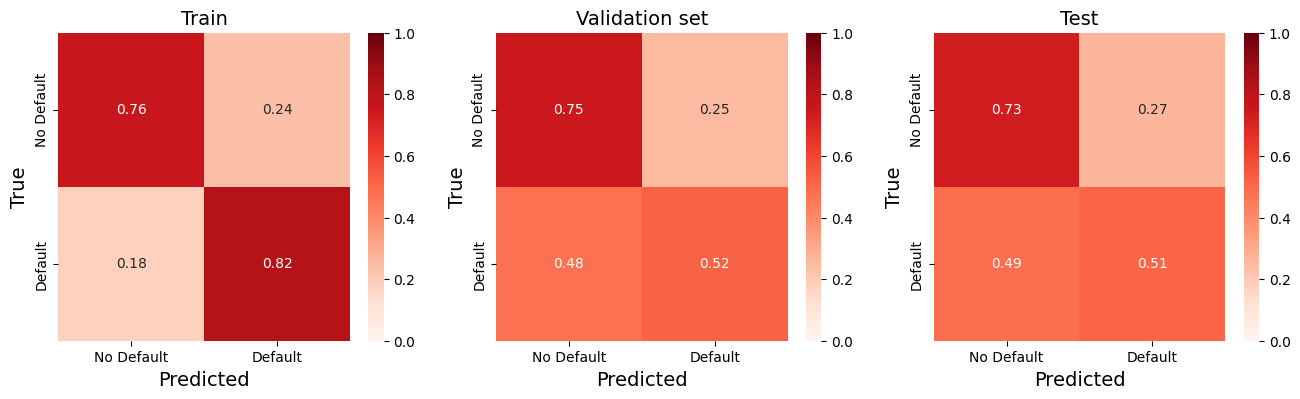

In [ ]:
# Create confusion matrix for baseline model
_=confusion_matrix_def(model,X_train,y_train,X_test,y_test,X_valid, y_valid,cnfmatrix)

## AUC (Area under ROC curve)

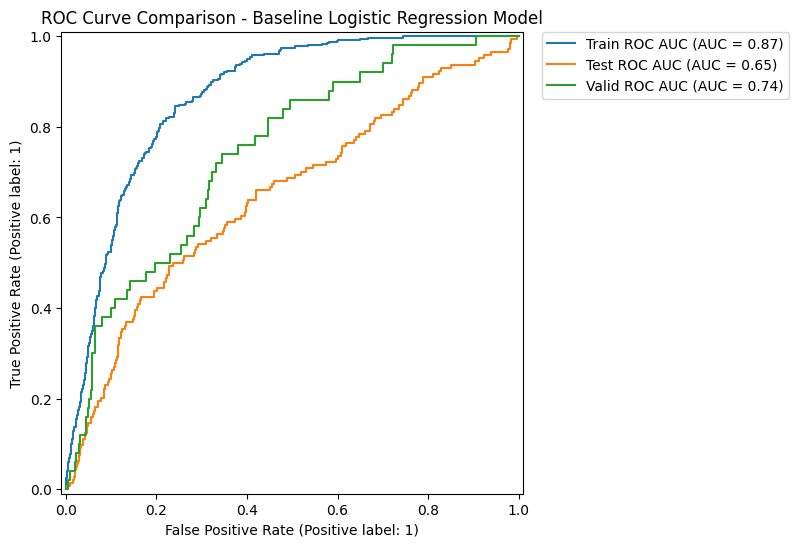

In [ ]:
_,_=roc_curve_cust(model,X_train,y_train,X_test, y_test,X_valid, y_valid,fprs,tprs,"Baseline Logistic Regression Model")

## Precision Recall Curve

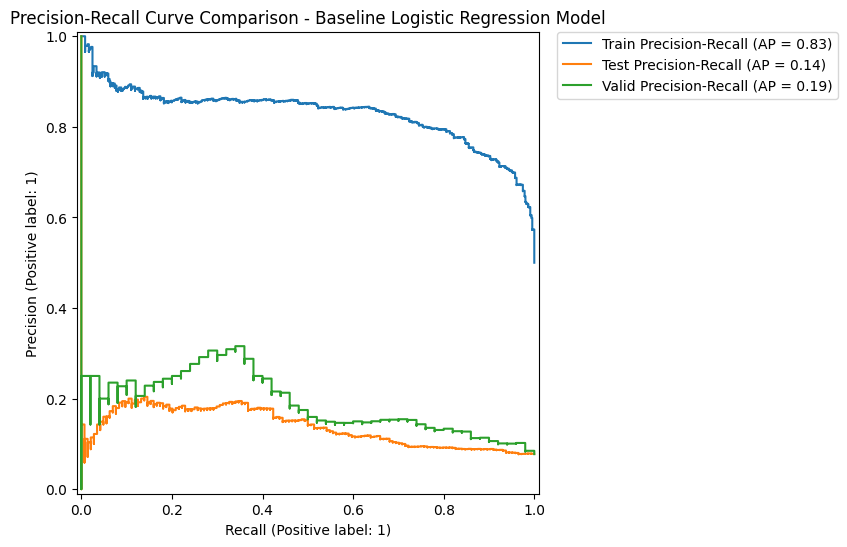

In [ ]:
_,_=precision_recall_cust(model,X_train,y_train,X_test, y_test,X_valid, y_valid,precisions,recalls,"Baseline Logistic Regression Model")

# Tune Basline model with grid search

Various Classification algorithms were used to compare with the best model. Following metrics were used to find the best model

* Cross fold Train Accuracy
* Test Accuracy
* p-value
* Train ROC_AUC_Score
* Test ROC_AUC_Score
* Train F1_Score
* Test F1_Score
* Train LogLoss
* Test LogLoss
* Train Time
* Test Time
* Confusion matrix

## Classifiers

In [ ]:
classifiers = [
        [('Logistic Regression', LogisticRegression(solver='saga',random_state=42),"RFE")],
        [('Gradient Boosting', GradientBoostingClassifier(warm_start=True, random_state=42),"RFE")],
        [('XGBoost', XGBClassifier(random_state=42),"RFE")],
        [('RandomForest', RandomForestClassifier(random_state=42),"RFE")]
    ]

## Hyper-parameters for different models

In [ ]:
# Arrange grid search parameters for each classifier
params_grid = {
        'Logistic Regression': {
            'penalty': ('l1', 'l2','elasticnet'),
            'tol': (0.0001, 0.00001),
            'C': (10, 1, 0.1, 0.01),
        },


        'Gradient Boosting':  {
            'max_depth': [5,10], # Lower helps with overfitting
            'max_features': [10,15],
            'validation_fraction': [0.2],
            'n_iter_no_change': [10],
            'tol': [0.01,0.0001],
            'n_estimators':[1000],
            'subsample' : [0.8],             #fraction of observations to be randomly samples for each tree.
            'min_samples_leaf' : [3,5],        # (Default = 1) minimum number of samples in a leaf
        },

      'XGBoost':  {
            'max_depth': [3,5], # Lower helps with overfitting
            'n_estimators':[300,500],
            'learning_rate': [0.01,0.1],
            'eta' : [0.01,0.1],
            'colsample_bytree' : [0.2,0.5],
        },

        'RandomForest':  {
            'max_depth': [5,10],
            'max_features': [15,20],
            'min_samples_split': [5, 10],
            'min_samples_leaf': [3, 5],
            'bootstrap': [True],
            'n_estimators':[1000]},
    }

In [ ]:
# Set feature selection settings
# Features removed each step
feature_selection_steps=10
# Number of features used
features_used=len(selected_features)

## Conduct Grid Search

In [ ]:
results.append(logit_scores['train_accuracy'])
names = ['Baseline LR']
def ConductGridSearch(in_classifiers,cnfmatrix,fprs,tprs,precisions,recalls):
    for (name, classifier,feature_sel) in in_classifiers:
            # Print classifier and parameters
            print('****** START', name,'*****')
            parameters = params_grid[name]
            print("Parameters:")
            for p in sorted(parameters.keys()):
                print("\t"+str(p)+": "+ str(parameters[p]))

            # generate the pipeline based on the feature selection method
            if feature_sel == "SVM":
                full_pipeline_with_predictor = Pipeline([
                ("preparation", data_prep_pipeline),
                ("predictor", classifier)
                ])
            else:
                full_pipeline_with_predictor = Pipeline([
                ("preparation", data_prep_pipeline),
                ('RFE', RFE(estimator=classifier, n_features_to_select=features_used, step=feature_selection_steps)),
                ("predictor", classifier)
                ])

            # Execute the grid search
            params = {}
            for p in parameters.keys():
                pipe_key = 'predictor__'+str(p)
                params[pipe_key] = parameters[p]
            grid_search = GridSearchCV(full_pipeline_with_predictor, params, cv=cvSplits, scoring='roc_auc',
                                       n_jobs=-1,verbose=1)
            grid_search.fit(X_train, y_train)

            # Best estimator score
            best_train = pct(grid_search.best_score_)

            # Best train scores
            print("Cross validation with best estimator")
            best_train_scores = cross_validate(grid_search.best_estimator_, X_train, y_train,cv=cvSplits,scoring=metrics,
                                               return_train_score=True, n_jobs=-1)

            #get all scores
            best_train_accuracy = np.round(best_train_scores['train_accuracy'].mean(),4)
            best_train_f1 = np.round(best_train_scores['train_f1'].mean(),4)
            best_train_logloss = np.round(best_train_scores['train_log_loss'].mean(),4)
            best_train_roc_auc = np.round(best_train_scores['train_roc_auc'].mean(),4)

            valid_time = np.round(best_train_scores['score_time'].mean(),4)
            best_valid_accuracy = np.round(best_train_scores['test_accuracy'].mean(),4)
            best_valid_f1 = np.round(best_train_scores['test_f1'].mean(),4)
            best_valid_logloss = np.round(best_train_scores['test_log_loss'].mean(),4)
            best_valid_roc_auc = np.round(best_train_scores['test_roc_auc'].mean(),4)

            #append all results
            results.append(best_train_scores['train_accuracy'])
            names.append(name)

            # Conduct t-test with baseline logit (control) and best estimator (experiment)
            (t_stat, p_value) = stats.ttest_rel(logit_scores['train_roc_auc'], best_train_scores['train_roc_auc'])

            #test and Prediction with whole data
            # Best estimator fitting time
            print("Fit and Prediction with best estimator")
            start = time()
            model = grid_search.best_estimator_.fit(X_train, y_train)
            train_time = round(time() - start, 4)

            # Best estimator prediction time
            start = time()
            y_test_pred = model.predict(X_test)
            test_time = round(time() - start, 4)
            scores.append(roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))
            accuracy.append(accuracy_score(y_test, y_test_pred))

            # Create confusion matrix for the best model
            cnfmatrix = confusion_matrix_def(model,X_train,y_train,X_test,y_test,X_valid, y_valid,cnfmatrix)

            # Create AUC ROC curve
            fprs,tprs = roc_curve_cust(model,X_train,y_train,X_test, y_test,X_valid, y_valid,fprs,tprs,name)

            #Create Precision recall curve
            precisions,recalls = precision_recall_cust(model,X_train,y_train,X_test, y_test,X_valid, y_valid,precisions,recalls,name)

            #Best Model
            final_best_clf[name]=pd.DataFrame([{'label': grid_search.best_estimator_.named_steps['predictor'].__class__.__name__,
                                           'predictor': grid_search.best_estimator_.named_steps['predictor']}])
            #Feature importance

            #feature_name = num_attribs + list(grid_search.best_estimator_.named_steps['preparation'].transformer_list[1][1].named_steps['ohe'].get_feature_names()) throws error
            feature_name = num_attribs + list(grid_search.best_estimator_.named_steps['preparation'].transformer_list[1][1].named_steps['ohe'].get_feature_names_out())
            feature_list = feature_name
            if feature_sel == "RFE":
                        features_list[name]=pd.DataFrame({'feature_name': feature_list,
                                         'feature_importance': grid_search.best_estimator_.named_steps['RFE'].ranking_})
            # Collect the best parameters found by the grid search
            print("Best Parameters:")
            best_parameters = grid_search.best_estimator_.get_params()
            param_dump = []
            for param_name in sorted(params.keys()):
                param_dump.append((param_name, best_parameters[param_name]))
                print("\t"+str(param_name)+": " + str(best_parameters[param_name]))
            print("****** FINISH",name," *****")
            print("")

            # Record the results
            exp_name = name
            expLog.loc[len(expLog)] = [f"{exp_name}"] + list(np.round(
                    [best_train_accuracy,
                    #pct(accuracy_score(y_valid, model.predict(X_valid))),
                    best_valid_accuracy,
                    accuracy_score(y_test, y_test_pred),
                    best_train_roc_auc,
                    best_valid_roc_auc,
                    #roc_auc_score(y_valid, model.predict_proba(X_valid)[:, 1]),
                    roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]),
                    best_train_f1,
                    best_valid_f1,
                    f1_score(y_test, y_test_pred),
                    best_train_logloss,
                    best_valid_logloss,
                    log_loss(y_test, y_test_pred),
                    p_value
                    ],4)) + [train_time,valid_time,test_time] \
                    + [json.dumps(param_dump)]



```
# This is formatted as code
```

### Logistic Regression Model

In [ ]:
ConductGridSearch(classifiers[0],cnfmatrix,fprs,tprs,precisions,recalls)

****** START Logistic Regression *****
Parameters:
	C: (10, 1, 0.1, 0.01)
	penalty: ('l1', 'l2', 'elasticnet')
	tol: (0.0001, 1e-05)
Fitting 5 folds for each of 24 candidates, totalling 120 fits


KeyboardInterrupt: 

### Gradient Boosting



In [ ]:
ConductGridSearch(classifiers[1],cnfmatrix,fprs,tprs,precisions,recalls)

### XGBoost



In [ ]:
ConductGridSearch(classifiers[2],cnfmatrix,fprs,tprs,precisions,recalls)

### RandomForest



In [ ]:
ConductGridSearch(classifiers[3],cnfmatrix,fprs,tprs,precisions,recalls)

### Support Vector

In [ ]:
ConductGridSearch(classifiers[1],cnfmatrix,fprs,tprs,precisions,recalls)

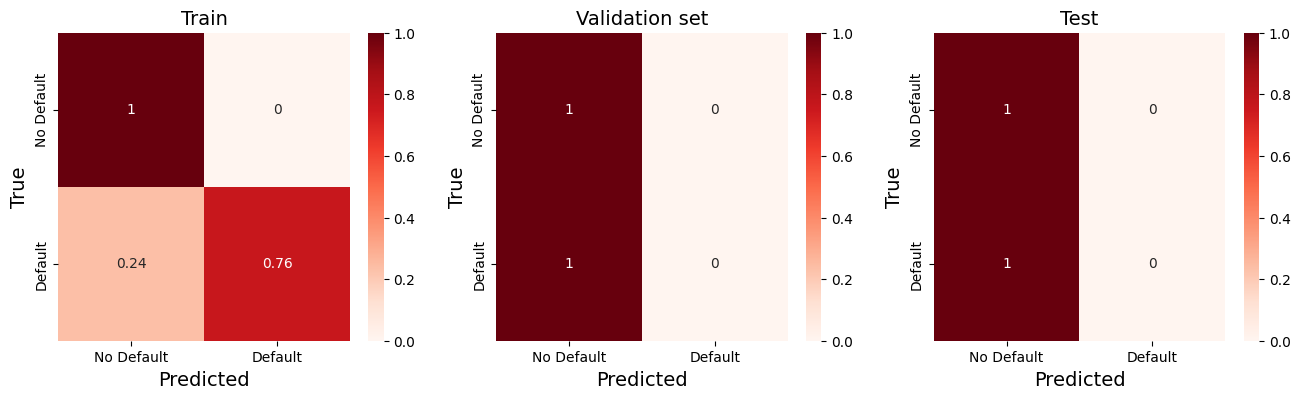

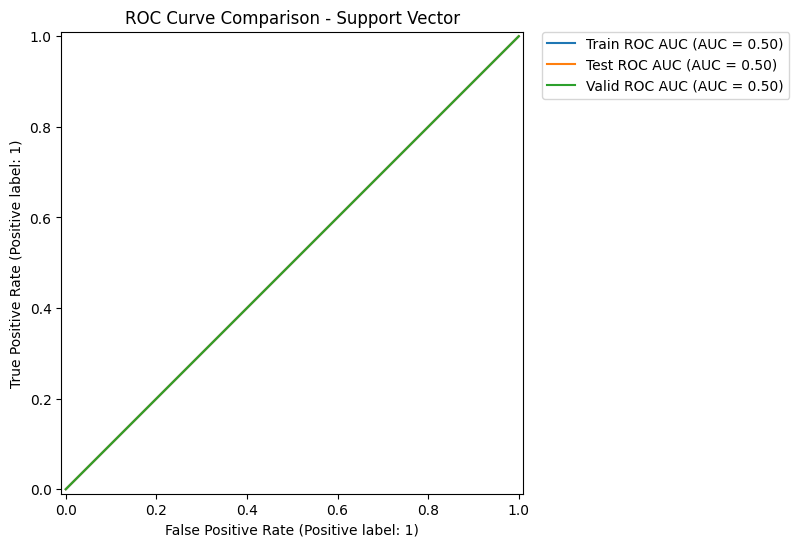

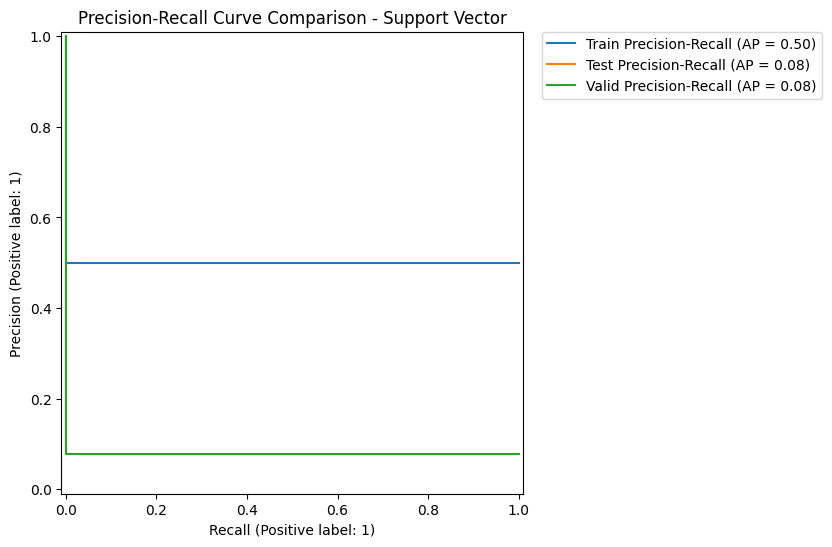

### PCA & Handling MultiCollinearity

> Add blockquote



Multicollinearity highly affects the variance associated with the problem, and can also affect the interpretation of the model, as it undermines the statistical significance of independent variables.For a dataset, if some of the independent variables are highly independent of each other, it results in multicollinearity. A small change in any of the features can affect the model performance to a great extent. In other words, The coefficients of the model become very sensitive to small changes in the independent variables.The basic idea is to run a PCA on all predictors. Their ratio, the Condition Index, will be high if multicollinearity is present. <br>
Reference : https://www.whitman.edu/Documents/Academics/Mathematics/2017/Perez

### Logistic regression with PCA

In [ ]:
for (name, classifier,feature_sel) in classifiers[0]:
        # Print classifier and parameters
        print('****** START', name,'*****')
        parameters = params_grid[name]
        print("Parameters:")
        for p in sorted(parameters.keys()):
            print("\t"+str(p)+": "+ str(parameters[p]))

        # generate the pipeline based on the feature selection method
        full_pipeline_with_predictor = Pipeline([
            ("preparation", data_prep_pipeline),
            ("PCA",PCA(0.95)),
            ("predictor", classifier)
            ])

        # Execute the grid search
        params = {}
        for p in parameters.keys():
            pipe_key = 'predictor__'+str(p)
            params[pipe_key] = parameters[p]
        grid_search = GridSearchCV(full_pipeline_with_predictor, params, cv=cvSplits, scoring='roc_auc',
                                   n_jobs=-1,verbose=1)
        grid_search.fit(X_train, y_train)

        # Best estimator score
        best_train = pct(grid_search.best_score_)

        # Best train scores
        print("Cross validation with best estimator")
        best_train_scores = cross_validate(grid_search.best_estimator_, X_train, y_train,cv=cvSplits,scoring=metrics,
                                           return_train_score=True, n_jobs=-1)

        #get all scores
        best_train_accuracy = np.round(best_train_scores['train_accuracy'].mean(),4)
        best_train_f1 = np.round(best_train_scores['train_f1'].mean(),4)
        best_train_logloss = np.round(best_train_scores['train_log_loss'].mean(),4)
        best_train_roc_auc = np.round(best_train_scores['train_roc_auc'].mean(),4)

        valid_time = np.round(best_train_scores['score_time'].mean(),4)
        best_valid_accuracy = np.round(best_train_scores['test_accuracy'].mean(),4)
        best_valid_f1 = np.round(best_train_scores['test_f1'].mean(),4)
        best_valid_logloss = np.round(best_train_scores['test_log_loss'].mean(),4)
        best_valid_roc_auc = np.round(best_train_scores['test_roc_auc'].mean(),4)

        (t_stat, p_value) = stats.ttest_rel(logit_scores['train_roc_auc'], best_train_scores['train_roc_auc'])

        #test and Prediction with whole data
        # Best estimator fitting time
        print("Fit and Prediction with best estimator")
        start = time()
        model = grid_search.best_estimator_.fit(X_train, y_train)
        train_time = round(time() - start, 4)

        # Best estimator prediction time
        start = time()
        y_test_pred = model.predict(X_test)
        test_time = round(time() - start, 4)

        # Collect the best parameters found by the grid search
        print("Best Parameters:")
        best_parameters = grid_search.best_estimator_.get_params()
        param_dump = []
        for param_name in sorted(params.keys()):
            param_dump.append((param_name, best_parameters[param_name]))
            print("\t"+str(param_name)+": " + str(best_parameters[param_name]))
        print("****** FINISH",name," *****")
        print("")

        # Record the results
        exp_name = "Logistic Regression with PCA"
        expLog.loc[len(expLog)] = [f"{exp_name}"] + list(np.round(
                [best_train_accuracy,
                #pct(accuracy_score(y_valid, model.predict(X_valid))),
                best_valid_accuracy,
                accuracy_score(y_test, y_test_pred),
                best_train_roc_auc,
                best_valid_roc_auc,
                #roc_auc_score(y_valid, model.predict_proba(X_valid)[:, 1]),
                roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]),
                best_train_f1,
                best_valid_f1,
                f1_score(y_test, y_test_pred),
                best_train_logloss,
                best_valid_logloss,
                log_loss(y_test, y_test_pred),
                p_value
                ],4)) + [train_time,valid_time,test_time] \
                + [json.dumps(param_dump)]

# Model Validation
## Feature Importance based on all Models

In [ ]:
print("Available in features_list:", list(features_list.keys()))


Available in features_list: ['Logistic Regression', 'Gradient Boosting', 'XGBoost', 'RandomForest']


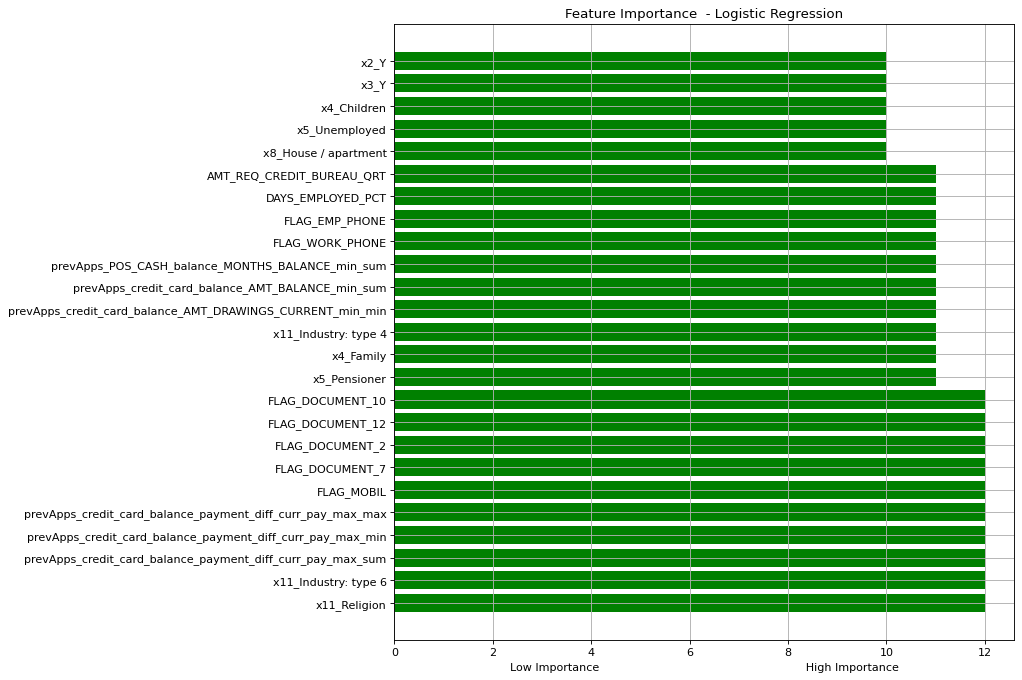

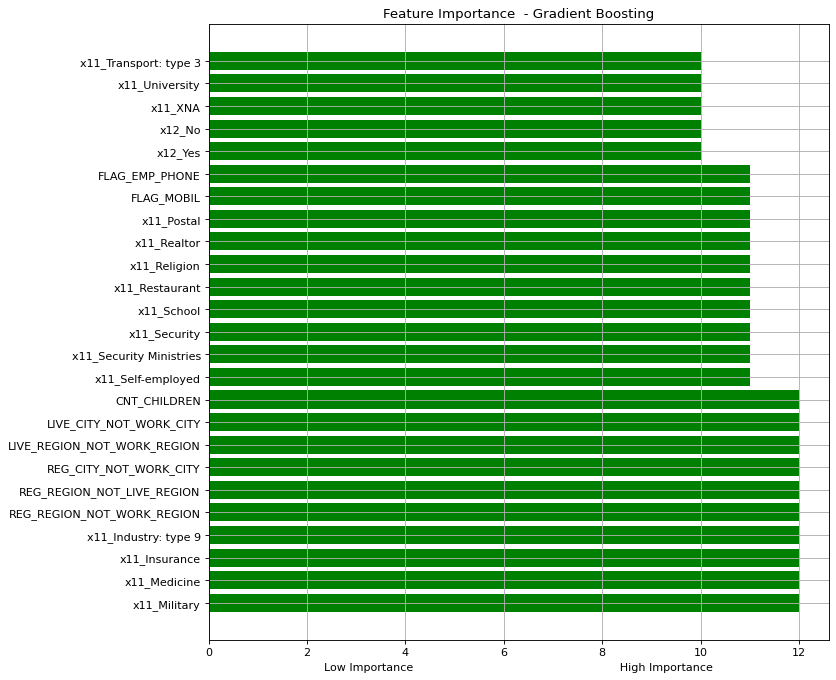

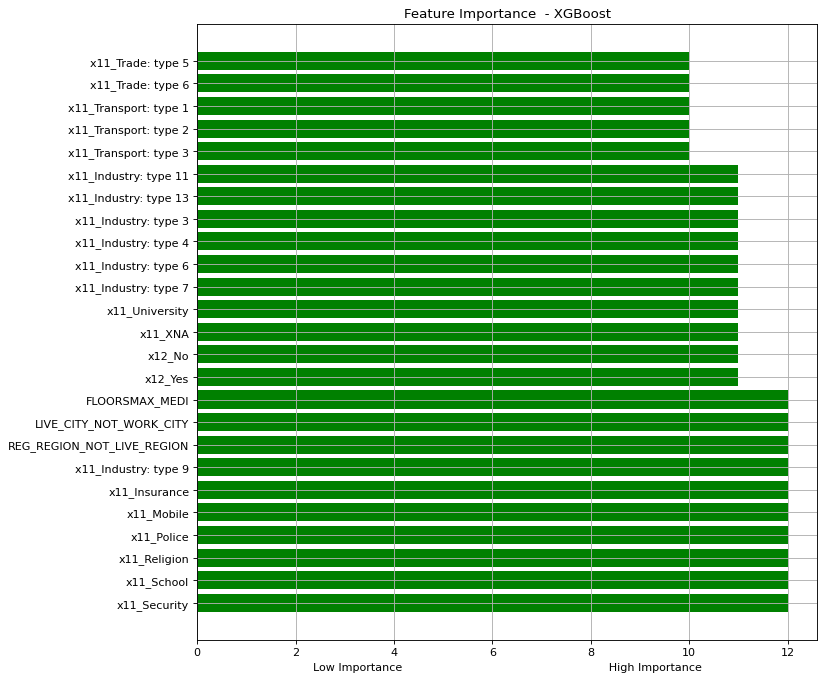

In [ ]:
# plot feature importance by their ranking for each model
for name in names[1:-1]:
    plt.figure(figsize=(10,10), dpi= 80)
    features_df = features_df = features_list[name].sort_values(['feature_importance','feature_name'], ascending=[False, False])
    sortedNames = np.array(features_df)[0:25, 0]
    sortedImportances = np.array(features_df)[0:25, 1]
    plt.title('Feature Importance  - ' + name)
    plt.barh(range(len(sortedNames)), sortedImportances, color='g', align='center')
    plt.yticks(range(len(sortedNames)), sortedNames)
    plt.xlabel('Low Importance                                                           High Importance')
    plt.grid()
    plt.show()

## Boxplot with all CV results

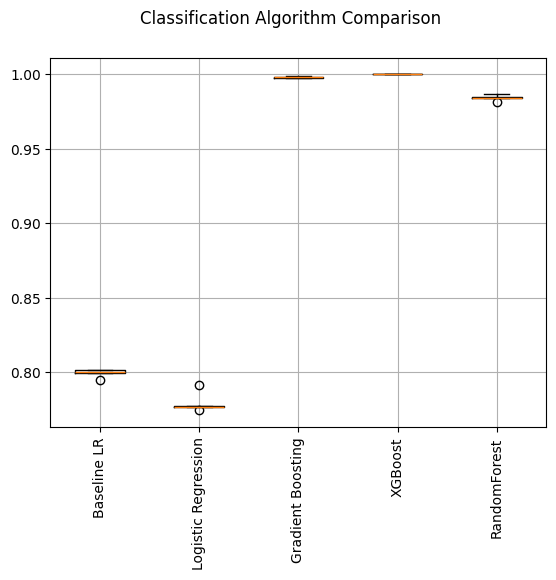

In [ ]:
# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Classification Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names,rotation=90)
pyplot.grid()
pyplot.show()

## AUC (Area Under the ROC Curve)

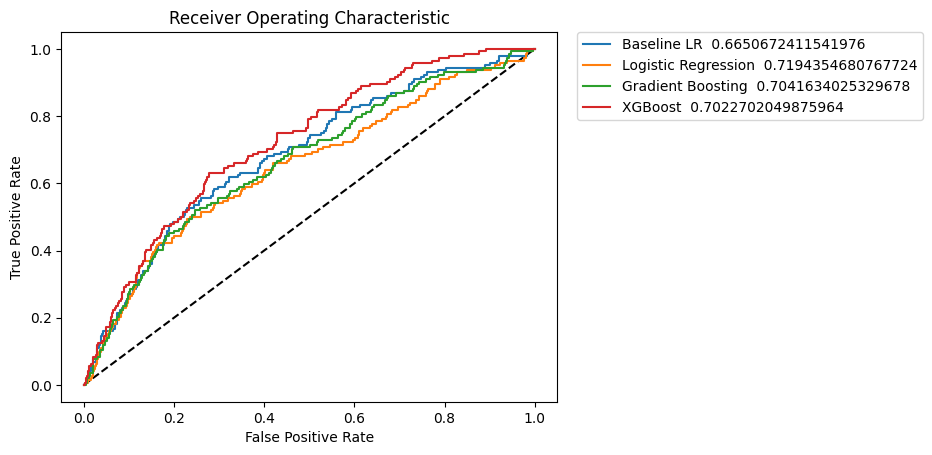

In [ ]:
# roc curve fpr, tpr  for all classifiers
plt.plot([0,1],[0,1], 'k--')
for i in range(len(names)-1):
    plt.plot(fprs[i],tprs[i],label = names[i] + '  ' + str(scores[i]))
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left", borderaxespad=0)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('Receiver Operating Characteristic')
plt.show()

## Precision Recall Curve

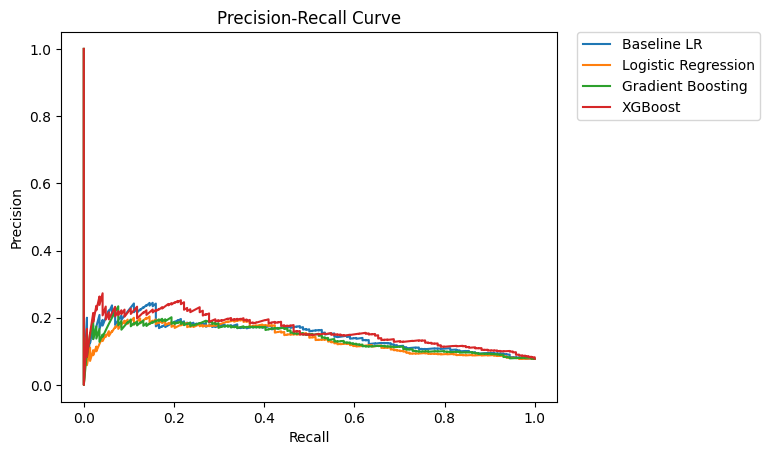

In [ ]:
# precision recall curve  for all classifiers
for i in range(len(names)-1):
    plt.plot(recalls[i],precisions[i],label = names[i])
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left", borderaxespad=0)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title('Precision-Recall Curve')
plt.show()

## Confusion Matrix

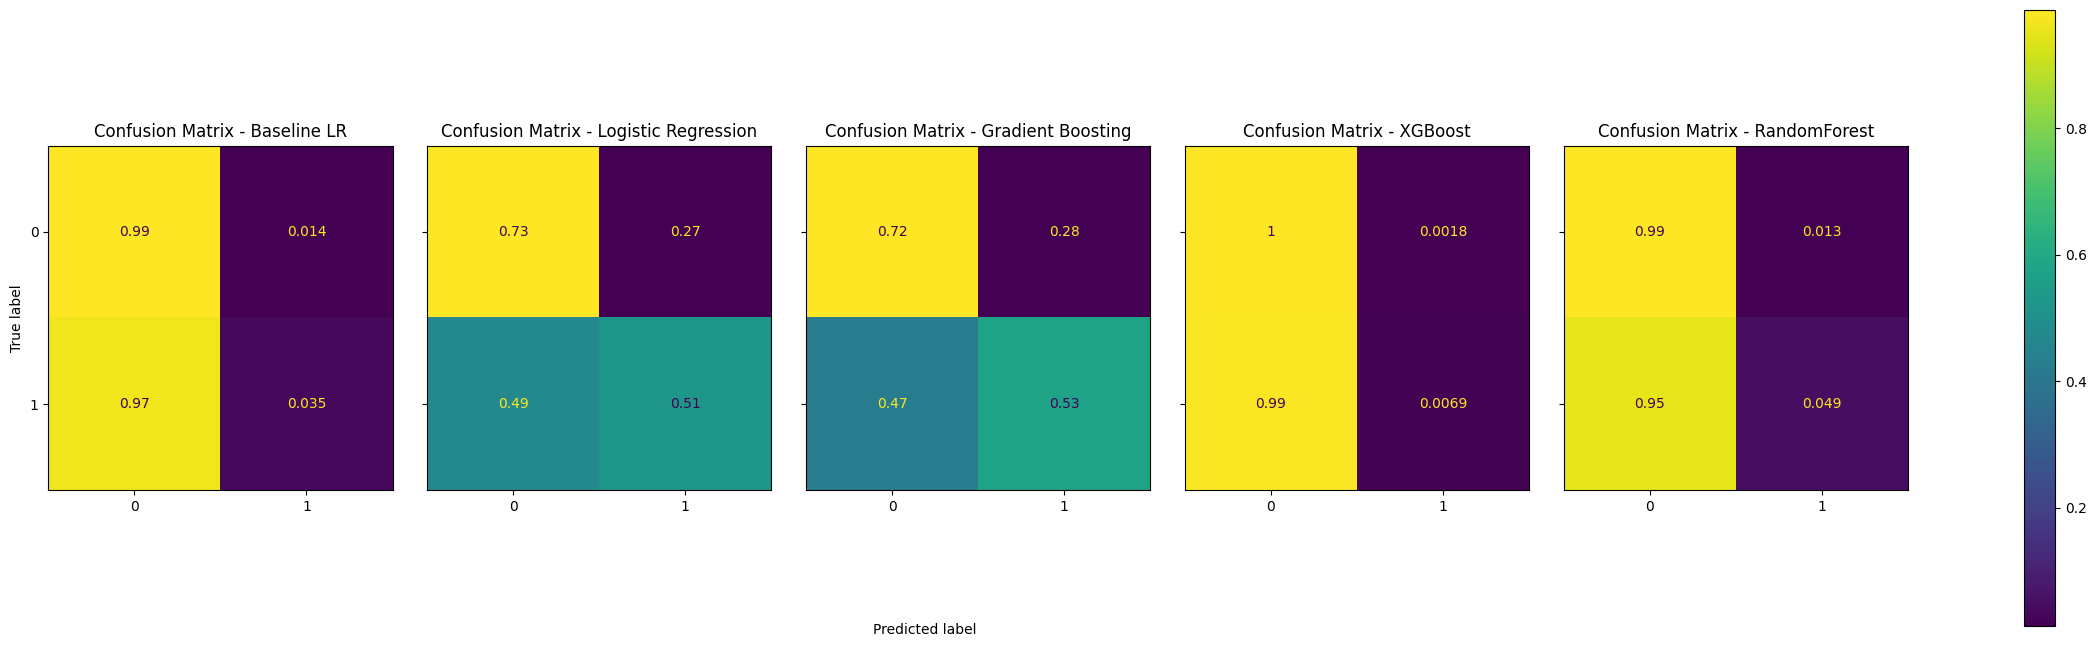

In [ ]:
# plot confusion matrix for all classifiers
f, axes = plt.subplots(1, len(names), figsize=(30, 8), sharey='row')
for i in range(len(names)):
    disp = ConfusionMatrixDisplay(cnfmatrix[i], display_labels=['0', '1'])
    disp.plot(ax=axes[i], xticks_rotation=0)
    disp.ax_.set_title("Confusion Matrix - " + names[i])
    disp.im_.colorbar.remove()
    disp.ax_.set_xlabel('')
    if i!=0:
        disp.ax_.set_ylabel('')

f.text(0.4, 0.1, 'Predicted label', ha='left')
plt.subplots_adjust(wspace=0.10, hspace=0.1)

f.colorbar(disp.im_, ax=axes)
plt.show()

## Final results
<a id='exp results'></a>

In [ ]:
pd.set_option('display.max_colwidth', None)
expLog

exp_name  Train Acc  Valid Acc  Test  Acc  Train AUC  \
0         Baseline_183_features     0.9275     0.9149     0.9117     0.8662   
1         Baseline_183_features     0.7996     0.7769     0.7151     0.8700   
2           Logistic Regression     0.7793     0.7580     0.7069     0.8505   
3             Gradient Boosting     0.9983     0.9912     0.9209     1.0000   
4                       XGBoost     1.0000     0.9878     0.9139     1.0000   
5                  RandomForest     0.9844     0.9700     0.8830     0.9998   
6  Logistic Regression with PCA     0.7252     0.7118     0.6836     0.8012   

   Valid AUC  Test  AUC  Train F1 Score  Valid F1 Score  Test F1 Score  \
0     0.7036     0.6836          0.2343          0.1015         0.0578   
1     0.8418     0.6488          0.8061          0.7839         0.2196   
2     0.8264     0.6651          0.7843          0.7624         0.2216   
3     0.9993     0.7166          0.9983          0.9913         0.0135   
4     0.9999     0.7042          1.0000          0.9879         0.0809   
5     0.9985     0.7023          0.9846          0.9707         0.1880   
6     0.7871     0.6867          0.7283          0.7152         0.2316   

   Train Log Loss  Valid Log Loss  Test Log Loss  P Score  Train Time  \
0          2.6121          3.0660         3.1826      0.0      7.5035   
1          7.2240          8.0417        10.2703      0.0      4.7589   
2          7.9536          8.7217        10.5632      0.0     44.6439   
3          0.0626          0.3168         2.8507      0.0    168.1385   
4          0.0000          0.4414         3.1045      0.0     28.9942   
5          0.5632          1.0822         4.2175      0.0     59.4779   
6          9.9057         10.3877        11.4028      0.0      1.9331   

   Valid Time  Test Time  \
0    0.082536     0.0247   
1    0.136437     0.1401   
2    0.095700     0.0351   
3    0.154200     0.0649   
4    0.218900     0.0497   
5    0.956500     0.2464   
6    0.108800     0.0261   

                                                                                                                                                                                                                                                                     Description  
0                                                                                                                                                                                              Imbalanced Logistic reg features 183:   Num:170,    Cat:13 with 20% training data  
1                                                                                                                                                                                                Balanced Logistic reg features 183:   Num:170,    Cat:13 with 20% training data  
2                                                                                                                                                                                               [["predictor__C", 10], ["predictor__penalty", "l2"], ["predictor__tol", 0.0001]]  
3  [["predictor__max_depth", 10], ["predictor__max_features", 15], ["predictor__min_samples_leaf", 5], ["predictor__n_estimators", 1000], ["predictor__n_iter_no_change", 10], ["predictor__subsample", 0.8], ["predictor__tol", 0.01], ["predictor__validation_fraction", 0.2]]  
4                                                                                                             [["predictor__colsample_bytree", 0.2], ["predictor__eta", 0.01], ["predictor__learning_rate", 0.1], ["predictor__max_depth", 5], ["predictor__n_estimators", 500]]  
5                                                                    [["predictor__bootstrap", true], ["predictor__max_depth", 10], ["predictor__max_features", 15], ["predictor__min_samples_leaf", 3], ["predictor__min_samples_split", 5], ["predictor__n_estimators", 1000]]  
6                                                             

# Phase 4

# Feature Engineering & Aggregation

Data preparation accounts for about 80% of the work of data scientists



The feature engineering we performed can be classified into - sub-parts which include
- Including Custom domain knowledge based features
- Creating engineered aggregated features
- Experimental modelling of the data
- Validating Manual OHE
- Creating Poly Features to degree 4 for selected features
- Merging all datasets
- Drop Columns with Missing Values



An essential part of any feature engineering process is the domain knowledge based features which will help improve the accuracy of a model. The first step was to identify these for each dataset. Some of the new custom features included were credit card amount balance after payment based on due amount,  application amount average , the credit average, Available credit as a percentage of income , Annuity as a percentage of income , Annuity as a percentage of available credit  <br>

The next step involved  was to identify the numerical features and aggregate them to mean, min & max values. An attempt was made to apply label encoding for unique values more than 5 at the engineering phase. However,  a design decision was made to apply OHE at the pipeline level for specific highly correlated fields on the final merged dataset to optimize the amount of code to handle the same functionality. <br>

Extensive feature engineering was conducted by attempting multiple modelling approaches with primary, secondary and tertiary tables prior to finalizing an optimized approach with the least amount of memory usage. Attempt one involved creating engineered and aggregated features for Tier 3 tables: bureau_balance, credit_card_installment, installment_payments  and point_of_sale_systems_cash_balance. This was then merged with Tier 2 tables i.e  prev_application_balance with  credit_card_installment, installment_payments and point_of_sale_systems_cash_balance & bureau with bureau_balance, along with aggregated features. A flat view combining all of the above tables were merged along with the primary dataset application train. This resulted in a high number of redundant features occupying large memory.<br>

 Attempt 2 involved creating custom and aggregated features for tier 3 tables and merging with tier 2 tables based on the primary key provided, which was later “extended” to the tier1 tables based on the additional aggregated columns. This approach created less duplicates, was optimized and occupied less memory by using a garbage collector after each merge. <br>

In Attempt 3, the merged dataframe in the previous attempt were merged with the polynomial features with a degree of 4. <br>

A final merge of the Tier3, Tier2 and Tier1 datasets were  used to create a train dataframe. Special care was taken to ensure that there are no columns which have more than 50% of the data missing.
<br>
Engineering the features and including them in the model with small splits helped test the model but provided low accuracy. However, using these merged features along with reasonable splits during the training face did provide a better accuracy and less possibility of overfitting especially for Random forest and XGBoost.
<br>
Future work and experiments include Label encoding for the unique categorical values in all categorical fields and not select few. Attempting PCA or custom function to handle multicollinearity in the pipeline and eliminate features of low importance and verify its impacts on accuracy.
<br>

The steps involved in Feature engineering were:
Separate the files into Tiers.



The pipeline for tier 3 files,



We include the manually engineered features for each file if any (InstallmentPaymentFeaturesAdder).
Replace the missing values with the most frequent values for the categorical feature columns and perform One Hot Encoding for all the categorical columns (getDummies).
Create aggregated features using the(FeaturesAggregator).
Removed the features which have greater than 60% of null values(MissingFeatureRemover).
Removed features with multicollinearity, dropped features which have a correlation value of greater than the threshold of 0.9(CollinearFeatureRemover).

The aggregated features with OHE are merged with the tier 2 files, those are the previous_application and the bureau datasets.
The tier 3 pipelines are repeated on the tier 2 files as well.
The tier 2 aggregated features with OHE are merged with application_train /test datasets.
The final pipeline on the application_train is as mentioned below.
![image-3.png](attachment:image-3.png)

The final features in the application_train / test dataset is:
![image-4.png](attachment:image-4.png)


## Manual Feature Engineering for below mentioned files.
1. installments_payments
2. credit_card_balance
3. previous_application
4. application_train


In [ ]:
# Create installment features
class InstallmentPaymentFeaturesAdder(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.l = []

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):

        # new feature creation from the Installment Payment file
        X['PAY_IS_LATE'] = X['DAYS_INSTALMENT'] - X['DAYS_ENTRY_PAYMENT']
        X['AMT_MISSED'] = X['AMT_INSTALMENT'] - X['AMT_PAYMENT']

        return X

In [ ]:
# Create installment features
class CCBalFeaturesAdder(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.l = []

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):

        # new feature creation from the Credit Card file
        X['DPD_MISSED'] = X['SK_DPD'] - X['SK_DPD_DEF']
        X['CREDIT_UTILIZED'] = X['AMT_CREDIT_LIMIT_ACTUAL'] - X['AMT_DRAWINGS_CURRENT']
        X['MIN_CREDIT_AMTMISS'] = X['AMT_INST_MIN_REGULARITY'] - X['AMT_PAYMENT_CURRENT']

        # Difference between the monthly amount paid - the expected monthly amount
        X['PAYMENT_DIFF_CURR_PAY'] = X['AMT_PAYMENT_TOTAL_CURRENT'] - X['AMT_PAYMENT_CURRENT']
        X['PAYMENT_DIFF_MIN_PAY'] = X['AMT_PAYMENT_TOTAL_CURRENT'] - X['AMT_INST_MIN_REGULARITY']
        # Difference between the monthly amount paid - the minimum monthly amount
        return X

In [ ]:
# Create previous application features
class PrevAppFeaturesAdder(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.l = []

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        # new feature in the Previous Application file
        X['INTEREST'] = X['CNT_PAYMENT'] * X['AMT_ANNUITY'] - X['AMT_CREDIT']
        X['INTEREST_PER_CREDIT'] = X['INTEREST'] / X['AMT_CREDIT']
        X['CREDIT_SUCCESS'] = X['AMT_APPLICATION'] - X['AMT_CREDIT']
        X['INTEREST_RT'] = 2 * 12 * X['INTEREST'] / (X['AMT_CREDIT'] * (X['CNT_PAYMENT'] + 1))
        return X

In [ ]:
# Create application features
class ApplicationTrainTestFeaturesAdder(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.l = []

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):

        # credit to income ratio
        X['CREDIT_INCOME_RATIO'] = X['AMT_CREDIT'] / X['AMT_INCOME_TOTAL']

        # annuity to income ratio
        X['ANNUITY_INCOME_RATIO'] = X['AMT_ANNUITY'] / X['AMT_INCOME_TOTAL']

        # length of the credit term
        X['CREDIT_LENGTH'] = X['AMT_ANNUITY'] / X['AMT_CREDIT']

        # what is income to age ratio
        X['INCOME_AGE_RATIO'] = X['AMT_INCOME_TOTAL'] / X['DAYS_BIRTH']

        # what is credit to age ratio
        X['CREDIT_AGE_RATIO'] = X['AMT_CREDIT'] / X['DAYS_BIRTH']

        # what percent of applicants life have they been working at recent company
        X['DAYS_EMPLOYED_PERCENT'] = X['DAYS_EMPLOYED'] / X['DAYS_BIRTH']

        # add liability feature code
        conditions_temp = [
            (X['FLAG_OWN_CAR'] == 'Y') & (X['FLAG_OWN_REALTY'] == 'Y'),
            (X['FLAG_OWN_CAR'] == 'N') & (X['FLAG_OWN_REALTY'] == 'Y'),
            (X['FLAG_OWN_CAR'] == 'Y') & (X['FLAG_OWN_REALTY'] == 'N'),
            (X['FLAG_OWN_CAR'] == 'N') & (X['FLAG_OWN_REALTY'] == 'N')]

        values_temp = ['0', '1', '2', '3']

        X['HAS_LIBAILITY'] = np.select(conditions_temp, values_temp)
        X['DAYS_EMPLOYED_PCT'] = X['DAYS_EMPLOYED'] / X['DAYS_BIRTH']
        X['CREDIT_INCOME_PCT'] = X['AMT_CREDIT'] / X['AMT_INCOME_TOTAL']
        X['ANNUITY_INCOME_PCT'] = X['AMT_ANNUITY'] / X['AMT_INCOME_TOTAL']
        X['CREDIT_TERM'] = X['AMT_ANNUITY'] / X['AMT_CREDIT']


        return X

## One Hot Encoder

In [ ]:
# Create aggregate features (via pipeline)
class getDummies(BaseEstimator, TransformerMixin):
    def __init__(self, columns=None): # no *args or **kargs
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        X.fillna(X.select_dtypes(include = 'object').mode().iloc[0], inplace = True)
        result = pd.get_dummies(X, columns = self.columns)

        #('imputer', SimpleImputer(strategy='most_frequent')),
        return result

## Feature Aggregator Helper Function
<a id='newfeature'></a>

Functions required to perform feature aggregations are listed below

In [ ]:
# function to get the numerical features
def get_numattribs(dataDF):
  num_attribs=(dataDF.select_dtypes(include=['int64', 'float64']).columns.tolist())
  print()
  print('Numerical attributes for',ds_name,' : ',num_attribs)
  print()
  return num_attribs

In [ ]:
class FeaturesAggregator(BaseEstimator, TransformerMixin):
    def __init__(self, file_name=None, features=None, primary_id = None):
        self.prefix = file_name
        self.features = features
        self.numeric_stats = ["min", "max", "mean", "count", "sum"]
        self.categorical_stats = ["mean", "count", "sum"]
        self.primary_id = primary_id
        self.agg_op_features = {}
        self.agg_features_names = [self.primary_id]

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        numeric_cols = list(X.columns[X.columns.isin(self.features)])
        numeric_cols = [num for num in numeric_cols if num not in ['SK_ID_CURR','SK_ID_PREV','SK_ID_BUREAU']]
        categorical_cols = list(X.columns[~X.columns.isin(self.features)])

        for f in numeric_cols:
            self.agg_op_features[f] = self.numeric_stats
            self.agg_features_names = self.agg_features_names + [self.prefix + "_" + f + "_" + s for s in self.numeric_stats]

        for f in categorical_cols:
            self.agg_op_features[f] = self.categorical_stats
            self.agg_features_names = self.agg_features_names + [self.prefix + "_" + f + "_" + s for s in self.categorical_stats]

        result = X.groupby(self.primary_id).agg(self.agg_op_features)
        result.columns = result.columns.droplevel()
        result = result.reset_index(level=[self.primary_id])
        result.columns = self.agg_features_names
        return result

In [ ]:
class engineer_features(BaseEstimator, TransformerMixin):
    def __init__(self, features=None):
        self

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):

# FROM APPLICATION
        # ADD INCOME CREDIT PERCENTAGE
        X['ef_INCOME_CREDIT_PERCENT'] = (
            X.AMT_INCOME_TOTAL / X.AMT_CREDIT).replace(np.inf, 0)

        # ADD INCOME PER FAMILY MEMBER
        X['ef_FAM_MEMBER_INCOME'] = (
            X.AMT_INCOME_TOTAL / X.CNT_FAM_MEMBERS).replace(np.inf, 0)

        # ADD ANNUITY AS PERCENTAGE OF ANNUAL INCOME
        X['ef_ANN_INCOME_PERCENT'] = (
            X.AMT_ANNUITY / X.AMT_INCOME_TOTAL).replace(np.inf, 0)

        return X

In [ ]:
# Creates the following date features
# But could do so much more with these features
#    E.g.,
#      extract the domain address of the homepage and OneHotEncode it
#
# ['release_month','release_day','release_year', 'release_dayofweek','release_quarter']
class prep_OCCUPATION_TYPE(BaseEstimator, TransformerMixin):
    def __init__(self, features="OCCUPATION_TYPE"): # no *args or **kargs
        self.features = features
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        df = pd.DataFrame(X, columns=self.features)
        #from IPython.core.debugger import Pdb as pdb;    pdb().set_trace() #breakpoint; dont forget to quit
        df['OCCUPATION_TYPE'] = df['OCCUPATION_TYPE'].apply(lambda x: 1. if x in ['Core Staff', 'Accountants', 'Managers', 'Sales Staff', 'Medicine Staff', 'High Skill Tech Staff', 'Realty Agents', 'IT Staff', 'HR Staff'] else 0.)
        #df.drop(self.features, axis=1, inplace=True)
        return np.array(df.values)

## Missing Data Removal

In [ ]:
# Remove missing columns
class MissingFeatureRemover(BaseEstimator, TransformerMixin):
    def __init__(self, threshold = .6):
        self.threshold = threshold

    def fit(self, X, y=None):

        # get the percent of missingness in features
        percent = (X.isnull().sum()/X.isnull().count()).sort_values(ascending = False)

        # turn into a data frame
        missing_application_train_data  = pd.DataFrame(percent, columns=['Percent'])

        # get the columns with missingness exceeding the threshold
        self.columns_to_drop = list(missing_application_train_data.index[missing_application_train_data['Percent'] > self.threshold])

        return self

    def transform(self, X, y=None):

        # drop the columns with missingness over the threshold
        X = X.drop(columns = self.columns_to_drop, axis=1)

        return X

## Collinear Feature Removal


In [ ]:
# Remove features with high colli
class CollinearFeatureRemover(BaseEstimator, TransformerMixin):
    def __init__(self, threshold = .9):
        self.threshold = threshold

    def fit(self, X, y=None):

        # get the correlation matrix for the entire dataset after one hot encoding features
#        correlation_matrix = X.head(1000).corr().abs()
        correlation_matrix = X.sample(10000).corr().abs()

        # get only the lower portion of collinearity matrix
        lower = correlation_matrix.where(np.tril(np.ones(correlation_matrix.shape), k=-1).astype(np.bool))

        # get the fields with correlation above threshold
        self.columns_to_drop = [index for index in lower.index if any(lower.loc[index] > self.threshold)]

        return self

    def transform(self, X, y=None):

        # drop the columns with collinearity over the threshold
        X = X.drop(columns = self.columns_to_drop, axis=1)

        return X

## Removal of Zero Variance

In [ ]:
# Remove features with near zero variance
class NearZeroVarianceFeatureRemover(BaseEstimator, TransformerMixin):
    def __init__(self, threshold = 0):
        self.threshold = threshold

    def fit(self, X, y=None):

        # get the fields with correlation above threshold
        self.columns_to_drop = [col for col in X.select_dtypes([np.number]).columns if np.nanvar(X[col]) <= self.threshold]

        return self

    def transform(self, X, y=None):

        # drop the columns with collinearity over the threshold
        X = X.drop(columns = self.columns_to_drop, axis=1)

        return X

In [ ]:
import gc
gc.collect()

0

## Creating a base copy of the data

In [ ]:
appsTrainDF = datasets['application_train'].copy()
X_kaggle_test = datasets['application_test'].copy()
prevAppsDF = datasets["previous_application"].copy()
bureauDF = datasets["bureau"].copy()

bureaubalDF = datasets['bureau_balance'].copy()
ccbalDF = datasets["credit_card_balance"].copy()
installmentspaymentsDF = datasets["installments_payments"].copy()
pos_cash_bal_DF = datasets["POS_CASH_balance"].copy()

## Tertiary Datasets

The tertiary datasets or tables refer to bureau_balance, POS_CASH_balance, instalments_payments, credit_card_balance

In [ ]:
tertiaty_datasets=['bureau_balance','credit_card_balance','installments_payments','POS_CASH_balance']

###  Third Tier datasets Numerical feature aggregation

Feature aggregation for the tertiary datasets

In [ ]:
primary_id1 = "SK_ID_PREV"
primary_id2 = "SK_ID_BUREAU"


posBal_features = pos_cash_bal_DF.columns.to_list()
instalPay_features = installmentspaymentsDF.columns.to_list()
instalPay_features.extend(['PAY_IS_LATE', 'AMT_MISSED'])

ccBal_features = ccbalDF.columns.to_list()
ccBal_features.extend(['DPD_MISSED', 'CREDIT_UTILIZED', 'MIN_CREDIT_AMTMISS',
                       'PAYMENT_DIFF_CURR_PAY','PAYMENT_DIFF_MIN_PAY'])

burBal_features = bureaubalDF.columns.to_list()

fn_POS_CASH ='POS_CASH_balance'
fn_ins_pay = 'installments_payments'
fn_ccbal = 'credit_card_balance'
fn_bbal ='bureau_balance'

**Define Pipeline to create aggregator and OHE features.**

In [ ]:
# set pos cash pipeline
pos_cash_pipe = Pipeline([
    #('imputer', SimpleImputer(strategy='most_frequent')),
    ('ohe', getDummies()),
    ('aggregator', FeaturesAggregator(fn_POS_CASH,posBal_features, primary_id1)),
    ('missing data remover', MissingFeatureRemover()),
    ('collinearity remover', CollinearFeatureRemover())
])


# set installments_payments pipeline
install_pay_pipe = Pipeline([
    ('install_pay_new_features', InstallmentPaymentFeaturesAdder()),
    #('imputer', SimpleImputer(strategy='most_frequent')),
    ('ohe', getDummies()),
    ('aggregator', FeaturesAggregator(fn_ins_pay,instalPay_features, primary_id1)),
    ('missing data remover', MissingFeatureRemover()),
    ('collinearity remover', CollinearFeatureRemover())
])

# set credit_card_balance pipeline
cc_bal_pipe = Pipeline([
    ('install_pay_new_features', CCBalFeaturesAdder()),
    #('imputer', SimpleImputer(strategy='most_frequent')),
    ('ohe', getDummies()),
    ('aggregator', FeaturesAggregator(fn_ccbal,ccBal_features, primary_id1)),
    ('missing data remover', MissingFeatureRemover()),
    ('collinearity remover', CollinearFeatureRemover())
])

# set bureau_balance pipeline
bureau_bal_pipe = Pipeline([
    #('imputer', SimpleImputer(strategy='most_frequent')),
    ('ohe', getDummies()),
    ('aggregator', FeaturesAggregator(fn_bbal, burBal_features, primary_id2)),
    ('missing data remover', MissingFeatureRemover()),
    ('collinearity remover', CollinearFeatureRemover())
])


### Run the pipelines for tier 3

In [ ]:
# bureaubalDF = datasets['bureau_balance'].copy()
# ccbalDF = datasets["credit_card_balance"].copy()
# installmentspaymentsDF = datasets["installments_payments"].copy()
# pos_cash_bal_DF = datasets["POS_CASH_balance"].copy()

In [ ]:
# remove columns contains objects
# columns_to_drop = ['DAYS_ENTRY_PAYMENT', 'AMT_INSTALMENT', 'AMT_PAYMENT', 'PAY_IS_LATE', 'AMT_MISSED']
columns_to_drop = ['DAYS_ENTRY_PAYMENT', 'AMT_INSTALMENT', 'AMT_PAYMENT']
installmentspaymentsDF = installmentspaymentsDF.drop(columns=columns_to_drop)


In [ ]:
pos_cash_bal_DF

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
0            1803195      182943             -31            48.0   
1            1715348      367990             -33            36.0   
2            1784872      397406             -32            12.0   
3            1903291      269225             -35            48.0   
4            2341044      334279             -35            36.0   
...              ...         ...             ...             ...   
10001353     2448283      226558             -20             6.0   
10001354     1717234      141565             -19            12.0   
10001355     1283126      315695             -21            10.0   
10001356     1082516      450255             -22            12.0   
10001357     1259607      174278             -52            16.0   

          CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
0                          45.0               Active       0           0  
1                          35.0               Active       0           0  
2                           9.0               Active       0           0  
3                          42.0               Active       0           0  
4                          35.0               Active       0           0  
...                         ...                  ...     ...         ...  
10001353                    0.0               Active     843           0  
10001354                    0.0               Active     602           0  
10001355                    0.0               Active     609           0  
10001356                    0.0               Active     614           0  
10001357                    0.0            Completed       0           0  

[10001358 rows x 8 columns]

In [ ]:
pos_cash_bal_aggregated = pos_cash_pipe.fit_transform(pos_cash_bal_DF)
del pos_cash_bal_DF





In [ ]:
installmentspaymentsDF

SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  \
0            1054186      161674                     1.0   
1            1330831      151639                     0.0   
2            2085231      193053                     2.0   
3            2452527      199697                     1.0   
4            2714724      167756                     1.0   
...              ...         ...                     ...   
13605396     2186857      428057                     0.0   
13605397     1310347      414406                     0.0   
13605398     1308766      402199                     0.0   
13605399     1062206      409297                     0.0   
13605400     2448869      434321                     1.0   

          NUM_INSTALMENT_NUMBER  DAYS_INSTALMENT  
0                             6          -1180.0  
1                            34          -2156.0  
2                             1            -63.0  
3                             3          -2418.0  
4                             2          -1383.0  
...                         ...              ...  
13605396                     66          -1624.0  
13605397                     47          -1539.0  
13605398                     43             -7.0  
13605399                     43          -1986.0  
13605400                     19            -27.0  

[13605401 rows x 5 columns]

In [ ]:
# installments_pmnts_aggregated = install_pay_pipe.fit_transform(installmentspaymentsDF)
# del installmentspaymentsDF

installments_pmnts_aggregated = installmentspaymentsDF.copy()

In [ ]:
ccblance_aggregated = cc_bal_pipe.fit_transform(ccbalDF)
del ccbalDF

bureaubal_aggregated = bureau_bal_pipe.fit_transform(bureaubalDF)
del bureaubalDF

gc.collect()

0

### Step 1: Merge Tier 3 with Tier 2

In [ ]:
print(pos_cash_bal_aggregated.shape)
print(ccblance_aggregated.shape)
print(installments_pmnts_aggregated.shape)
print(bureaubal_aggregated.shape)

(936325, 24)
(104307, 67)
(13605401, 5)
(817395, 20)


Merging the aggregated features for pos_cash_bal , installments_pmnts , credit card balance with Previous application

In [ ]:
prevApps_ThirdTierMerge = True

posBal_join_feature = 'SK_ID_PREV'
instalPay_join_feature = 'SK_ID_PREV'
ccBal_join_feature = 'SK_ID_PREV'
burBal_join_feature = 'SK_ID_BUREAU'
prevApps_join_feature = 'SK_ID_CURR'
bureau_join_feature = 'SK_ID_CURR'

if prevApps_ThirdTierMerge:
  # Merge Datasets
  prevAppsDF = prevAppsDF.merge(pos_cash_bal_aggregated, how='left', on=posBal_join_feature)
  prevAppsDF = prevAppsDF.merge(installments_pmnts_aggregated, how='left', on=instalPay_join_feature)
  prevAppsDF = prevAppsDF.merge(ccblance_aggregated, how='left', on=ccBal_join_feature)


Merging the aggregated features the dataset Bureau Balance with Bureau as per the data model.

In [ ]:
bureau_ThirdTierMerge = True

if bureau_ThirdTierMerge:
  bureauDF = bureauDF.merge(bureaubal_aggregated, how='left', on=burBal_join_feature)


In [ ]:
print(prevAppsDF.shape)
print(bureauDF.shape)

In [ ]:
gc.collect()

## Secondary Datasets

###  Second Tier datasets feature aggregation and OHE pipeline

In [ ]:
primary_id1 = "SK_ID_CURR"

fn_bureau = 'bureau'
fn_prevapps = 'previous_application'
fn_appsTrain = 'application_train'
fn_appsTest = 'application_test'

# dataframe names for reference
# appsTrainDF
# appsTestDF
# prevAppsDF
# bureauDF

**Define the second tier pipeline**

In [ ]:
# get column names
prevApps_features = prevAppsDF.columns.to_list()
prevApps_features.extend(['INTEREST', 'INTEREST_PER_CREDIT', 'CREDIT_SUCCESS', 'INTEREST_RT'])

bureau_features = bureauDF.columns.to_list()

# set previous_application pipeline
prev_app_pipe = Pipeline([
    ('prev_app_feature_adder', PrevAppFeaturesAdder()),
    #('imputer', SimpleImputer(strategy='most_frequent')),
    ('ohe', getDummies()),
    ('aggregator', FeaturesAggregator(fn_prevapps,prevApps_features, primary_id1)),
    ('missing data remover', MissingFeatureRemover()),
    ('collinearity remover', CollinearFeatureRemover())
])

# set bureau pipeline
bureau_pipe = Pipeline([
    #('imputer', SimpleImputer(strategy='most_frequent')),
    ('ohe', getDummies()),
    ('aggregator', FeaturesAggregator(fn_bureau,bureau_features, primary_id1)),
    ('missing data remover', MissingFeatureRemover()),
    ('collinearity remover', CollinearFeatureRemover())
])

In [ ]:
bureauDF

In [ ]:
# #agg_funcs = ['min', 'max', 'mean', 'count', 'sum']
# agg_funcs = ['count', 'max', 'min', 'sum']
# primary_id1 = "SK_ID_CURR"


# prevApps_feature_pipeline = Pipeline([
#     ('prevApps', FeaturesAggregator('prevApps' ,prevApps_features , agg_funcs, primary_id1)),
#     ])

# bureau_feature_pipeline = Pipeline([
#     ('bureau', FeaturesAggregator('bureau' ,bureau_features , agg_funcs, primary_id1)),
#     ])


In [ ]:
prevAppsDF

In [ ]:
primary_id1 = "SK_ID_CURR"
prevAppsDF = prevAppsDF.rename(columns={'SK_ID_CURR_x': 'SK_ID_CURR'})

prevApps_aggregated = prev_app_pipe.fit_transform(prevAppsDF)
primary_id1 = "SK_ID_CURR"
bureau_aggregated = bureau_pipe.fit_transform(bureauDF)

del bureauDF
del prevAppsDF

gc.collect()

In [ ]:
print(prevApps_aggregated.shape)
print(bureau_aggregated.shape)

## Primary Datasets

### Merge Aggregated Dataset With Tier 1 Tables - Train and Test

Prior to merging with the Primary data, we will be dropping columns with more than 50% missing values because they are not reliable parameters.

In [ ]:
prevApps_join_feature = 'SK_ID_CURR'
bureau_join_feature = 'SK_ID_CURR'

merge_all_data = True

if merge_all_data:
# 1. Join/Merge in prevApps Data
    # Merge all the features with Application_train
    appsTrainDF = appsTrainDF.merge(prevApps_aggregated, how = 'left', on = prevApps_join_feature)
    appsTrainDF = appsTrainDF.merge(bureau_aggregated, how = 'left', on = bureau_join_feature)

    # Merge all the features with Application_train
    X_kaggle_test = X_kaggle_test.merge(prevApps_aggregated, how = 'left', on = prevApps_join_feature)
    X_kaggle_test = X_kaggle_test.merge(bureau_aggregated, how = 'left', on = bureau_join_feature)


In [ ]:
print(appsTrainDF.shape)
print(X_kaggle_test.shape)

In [ ]:
gc.collect()

## Categorical feature mapping

In [ ]:
def get_cat_attribs():
  cat_cols = []
  cat_cols=list(appsTrainDF.select_dtypes(include=['object']).columns)
  return cat_cols

cat_attribs = get_cat_attribs()

over_5_unique = ([])

for att in cat_attribs:
  if (len(appsTrainDF[att].unique()) > 5):
    over_5_unique.append(att)

print(f'{len(over_5_unique)} cat attributes with more than 5 unique values')

In [ ]:
for att in over_5_unique:

  print(f'{att}:')

  column_total = appsTrainDF[att].shape[0]

  for v in appsTrainDF[att].unique():

    print(f"Rows for {v}: {sum(appsTrainDF[att] == v)} - {round(100 * (sum(appsTrainDF[att] == v) / column_total))}%")

In [ ]:
 appsTrainDF['NAME_TYPE_SUITE'] = appsTrainDF['NAME_TYPE_SUITE'].replace({
                       'Family' : 'other',
                       'Spouse, partner' : 'other',
                       'Children' : 'other',
                       'Other_A' : 'other',
                       'Other_B' : 'other',
                       'Group of people' : 'other',})

 appsTrainDF['NAME_INCOME_TYPE'] = appsTrainDF['NAME_INCOME_TYPE'].replace({
                       'Unemployed' : 'other',
                       'Student' : 'other',
                       'Businessman' : 'other',
                       'Maternity leave' : 'other',})

 appsTrainDF['NAME_FAMILY_STATUS'] = appsTrainDF['NAME_FAMILY_STATUS'].replace({
                       'Single / not married' : 'Not Married',
                       'Married' : 'Married',
                       'Civil marriage' : 'Married',
                       'Widow' : 'Not Married',
                       'Separated' : 'Not Married',
                       'Unknown' : 'Not Married',})

 appsTrainDF['NAME_HOUSING_TYPE'] = appsTrainDF['NAME_HOUSING_TYPE'].replace({
                       'House / apartment' : 'House / apartment',
                       'Rented apartment' : 'other',
                       'With parents' : 'other',
                       'Municipal apartment' : 'other',
                       'Office apartment' : 'other',
                       'Co-op apartment' : 'other',})

 appsTrainDF['OCCUPATION_TYPE'] = appsTrainDF['OCCUPATION_TYPE'].replace({
                       'Laborers' : 'Service Industry',
                       'Drivers' : 'Service Industry',
                       'Cleaning staff' : 'Service Industry',
                       'Cooking staff' : 'Service Industry',
                       'Private service staff' : 'Service Industry',
                       'Security staff' : 'Service Industry',
                       'Waiters/barmen staff' : 'Service Industry',
                       'Low-skill Laborers' : 'Service Industry',
                       'Core staff' : 'Office',
                       'Accountants' : 'Office',
                       'Managers' : 'Office',
                       'Sales staff' : 'Office',
                       'Medicine staff' : 'Office',
                       'High skill tech staff' : 'Office',
                       'Realty agents' : 'Office',
                       'Secretaries' : 'Office',
                       'IT staff' : 'Office',
                       'HR staff' : 'Office',})


 appsTrainDF['WEEKDAY_APPR_PROCESS_START'] = appsTrainDF['WEEKDAY_APPR_PROCESS_START'].replace({
                       'SUNDAY' : 'Weekend',
                       'MONDAY' : 'Weekday',
                       'TUESDAY' : 'Weekday',
                       'WEDNESDAY' : 'Weekday',
                       'THURSDAY' : 'Weekday',
                       'FRIDAY' : 'Weekday',
                       'SATURDAY' : 'Weekend',})

 appsTrainDF['ORGANIZATION_TYPE'] = appsTrainDF['ORGANIZATION_TYPE'].replace({
                         'Advertising' : 'Business',
                         'Agriculture' : 'Industrial',
                         'Bank' : 'Business',
                         'Business Entity Type 1' : 'Business',
                         'Business Entity Type 2' : 'Business',
                         'Business Entity Type 3' : 'Business',
                         'Cleaning' : 'Service',
                         'Construction' : 'Industrial',
                         'Culture' : 'Other',
                         'Electricity' : 'Industrial',
                         'Emergency' : 'Government',
                         'Government' : 'Government',
                         'Hotel' : 'Service',
                         'Housing' : 'Other',
                         'Industry: type 1' : 'Industrial',
                         'Industry: type 10' : 'Industrial',
                         'Industry: type 11' : 'Industrial',
                         'Industry: type 12' : 'Industrial',
                         'Industry: type 13' : 'Industrial',
                         'Industry: type 2' : 'Industrial',
                         'Industry: type 3' : 'Industrial',
                         'Industry: type 4' : 'Industrial',
                         'Industry: type 5' : 'Industrial',
                         'Industry: type 6' : 'Industrial',
                         'Industry: type 7' : 'Industrial',
                         'Industry: type 8' : 'Industrial',
                         'Industry: type 9' : 'Industrial',
                         'Insurance' : 'Business',
                         'Kindergarten' : 'Government',
                         'Legal Services' : 'Business',
                         'Medicine' : 'Government',
                         'Military' : 'Government',
                         'Mobile' : 'Other',
                         'Other' : 'Other',
                         'Police' : 'Government',
                         'Postal' : 'Government',
                         'Realtor' : 'Business',
                         'Religion' : 'Other',
                         'Restaurant' : 'Government',
                         'School' : 'Government',
                         'Security' : 'Other',
                         'Security Ministries' : 'Other',
                         'Self-employed' : 'Other',
                         'Services' : 'Service',
                         'Telecom' : 'Business',
                         'Trade: type 1' : 'Trade',
                         'Trade: type 2' : 'Trade',
                         'Trade: type 3' : 'Trade',
                         'Trade: type 4' : 'Trade',
                         'Trade: type 5' : 'Trade',
                         'Trade: type 6' : 'Trade',
                         'Trade: type 7' : 'Trade',
                         'Transport: type 1' : 'Service',
                         'Transport: type 2' : 'Service',
                         'Transport: type 3' : 'Service',
                         'Transport: type 4' : 'Service',
                         'University' : 'Government',
                         'XNA' : 'XNA'})

In [ ]:
 X_kaggle_test['NAME_TYPE_SUITE'] = X_kaggle_test['NAME_TYPE_SUITE'].replace({
                       'Family' : 'other',
                       'Spouse, partner' : 'other',
                       'Children' : 'other',
                       'Other_A' : 'other',
                       'Other_B' : 'other',
                       'Group of people' : 'other',})

 X_kaggle_test['NAME_INCOME_TYPE'] = X_kaggle_test['NAME_INCOME_TYPE'].replace({
                       'Unemployed' : 'other',
                       'Student' : 'other',
                       'Businessman' : 'other',
                       'Maternity leave' : 'other',})

 X_kaggle_test['NAME_FAMILY_STATUS'] = X_kaggle_test['NAME_FAMILY_STATUS'].replace({
                       'Single / not married' : 'Not Married',
                       'Married' : 'Married',
                       'Civil marriage' : 'Married',
                       'Widow' : 'Not Married',
                       'Separated' : 'Not Married',
                       'Unknown' : 'Not Married',})

 X_kaggle_test['NAME_HOUSING_TYPE'] = X_kaggle_test['NAME_HOUSING_TYPE'].replace({
                       'House / apartment' : 'House / apartment',
                       'Rented apartment' : 'other',
                       'With parents' : 'other',
                       'Municipal apartment' : 'other',
                       'Office apartment' : 'other',
                       'Co-op apartment' : 'other',})

 X_kaggle_test['OCCUPATION_TYPE'] = X_kaggle_test['OCCUPATION_TYPE'].replace({
                       'Laborers' : 'Service Industry',
                       'Drivers' : 'Service Industry',
                       'Cleaning staff' : 'Service Industry',
                       'Cooking staff' : 'Service Industry',
                       'Private service staff' : 'Service Industry',
                       'Security staff' : 'Service Industry',
                       'Waiters/barmen staff' : 'Service Industry',
                       'Low-skill Laborers' : 'Service Industry',
                       'Core staff' : 'Office',
                       'Accountants' : 'Office',
                       'Managers' : 'Office',
                       'Sales staff' : 'Office',
                       'Medicine staff' : 'Office',
                       'High skill tech staff' : 'Office',
                       'Realty agents' : 'Office',
                       'Secretaries' : 'Office',
                       'IT staff' : 'Office',
                       'HR staff' : 'Office',})


 X_kaggle_test['WEEKDAY_APPR_PROCESS_START'] = X_kaggle_test['WEEKDAY_APPR_PROCESS_START'].replace({
                       'SUNDAY' : 'Weekend',
                       'MONDAY' : 'Weekday',
                       'TUESDAY' : 'Weekday',
                       'WEDNESDAY' : 'Weekday',
                       'THURSDAY' : 'Weekday',
                       'FRIDAY' : 'Weekday',
                       'SATURDAY' : 'Weekend',})

 X_kaggle_test['ORGANIZATION_TYPE'] = X_kaggle_test['ORGANIZATION_TYPE'].replace({
                         'Advertising' : 'Business',
                         'Agriculture' : 'Industrial',
                         'Bank' : 'Business',
                         'Business Entity Type 1' : 'Business',
                         'Business Entity Type 2' : 'Business',
                         'Business Entity Type 3' : 'Business',
                         'Cleaning' : 'Service',
                         'Construction' : 'Industrial',
                         'Culture' : 'Other',
                         'Electricity' : 'Industrial',
                         'Emergency' : 'Government',
                         'Government' : 'Government',
                         'Hotel' : 'Service',
                         'Housing' : 'Other',
                         'Industry: type 1' : 'Industrial',
                         'Industry: type 10' : 'Industrial',
                         'Industry: type 11' : 'Industrial',
                         'Industry: type 12' : 'Industrial',
                         'Industry: type 13' : 'Industrial',
                         'Industry: type 2' : 'Industrial',
                         'Industry: type 3' : 'Industrial',
                         'Industry: type 4' : 'Industrial',
                         'Industry: type 5' : 'Industrial',
                         'Industry: type 6' : 'Industrial',
                         'Industry: type 7' : 'Industrial',
                         'Industry: type 8' : 'Industrial',
                         'Industry: type 9' : 'Industrial',
                         'Insurance' : 'Business',
                         'Kindergarten' : 'Government',
                         'Legal Services' : 'Business',
                         'Medicine' : 'Government',
                         'Military' : 'Government',
                         'Mobile' : 'Other',
                         'Other' : 'Other',
                         'Police' : 'Government',
                         'Postal' : 'Government',
                         'Realtor' : 'Business',
                         'Religion' : 'Other',
                         'Restaurant' : 'Government',
                         'School' : 'Government',
                         'Security' : 'Other',
                         'Security Ministries' : 'Other',
                         'Self-employed' : 'Other',
                         'Services' : 'Service',
                         'Telecom' : 'Business',
                         'Trade: type 1' : 'Trade',
                         'Trade: type 2' : 'Trade',
                         'Trade: type 3' : 'Trade',
                         'Trade: type 4' : 'Trade',
                         'Trade: type 5' : 'Trade',
                         'Trade: type 6' : 'Trade',
                         'Trade: type 7' : 'Trade',
                         'Transport: type 1' : 'Service',
                         'Transport: type 2' : 'Service',
                         'Transport: type 3' : 'Service',
                         'Transport: type 4' : 'Service',
                         'University' : 'Government',
                         'XNA' : 'XNA'})

In [ ]:
for att in over_5_unique:

  print(f'{att}:')

  column_total = appsTrainDF[att].shape[0]

  for v in appsTrainDF[att].unique():

    print(f"Rows for {v}: {sum(appsTrainDF[att] == v)} - {round(100 * (sum(appsTrainDF[att] == v) / column_total))}%")

In [ ]:
# # Convert categorical features to numerical approximations (via pipeline)
# class ClaimAttributesAdder(BaseEstimator, TransformerMixin):
#     def fit(self, X, y=None):
#         return self
#     def transform(self, X, y=None):
#         charlson_idx_dt = {'0': 0, '1-2': 2, '3-4': 4, '5+': 6}
#         los_dt = {'1 day': 1, '2 days': 2, '3 days': 3, '4 days': 4, '5 days': 5, '6 days': 6,
#           '1- 2 weeks': 11, '2- 4 weeks': 21, '4- 8 weeks': 42, '26+ weeks': 180}
#         X['PayDelay'] = X['PayDelay'].apply(lambda x: int(x) if x != '162+' else int(162))
#         X['DSFS'] = X['DSFS'].apply(lambda x: None if pd.isnull(x) else int(x[0]) + 1)
#         X['CharlsonIndex'] = X['CharlsonIndex'].apply(lambda x: charlson_idx_dt[x])
#         X['LengthOfStay'] = X['LengthOfStay'].apply(lambda x: None if pd.isnull(x) else los_dt[x])
#         return X


In [ ]:
print(appsTrainDF.shape)
print(X_kaggle_test.shape)

## Final Application_train pipeline

In [ ]:
# set application pipeline
application_pipe = Pipeline([
    ('app_train_features', ApplicationTrainTestFeaturesAdder()),
    ('ohe', getDummies()),
    ('missing data remover', MissingFeatureRemover()),
    ('collinearity remover', CollinearFeatureRemover()),
    ('near zero variance remover', NearZeroVarianceFeatureRemover())
])

In [ ]:
appsTrainDF = application_pipe.fit_transform(appsTrainDF)
X_kaggle_test = application_pipe.transform(X_kaggle_test)

In [ ]:
print(appsTrainDF.shape)
print(X_kaggle_test.shape)

In [ ]:
drop_uncommon=(list(set(appsTrainDF.columns.tolist()) - set(X_kaggle_test.columns.tolist())))
drop_uncommon.remove('TARGET')
drop_uncommon

In [ ]:
appsTrainDF=appsTrainDF.drop(columns=drop_uncommon)

In [ ]:
print(appsTrainDF.shape)
print(X_kaggle_test.shape)

## Output Dataframes to files

In [ ]:
appsTrainDF.to_csv("/content/drive/My Drive/AML Project/Data/appsTrainDF.csv",index=False)
X_kaggle_test.to_csv("/content/drive/My Drive/AML Project/Data/X_kaggle_test.csv",index=False)

**Data Preparation Ends here with all numeric aggregated features and polynomial features all accumulation to :**
> Application_train -- (307511, 496) <br>
> Application_test -- (48744, 495)

## Data Summary

In [ ]:
print(appsTrainDF.shape)
print(X_kaggle_test.shape)

**Total numeric features in the application train df.**

In [ ]:
appsTrainDF.select_dtypes(exclude=['object']).columns

**Total Categorical features in the application train df.**

In [ ]:
appsTrainDF.select_dtypes(include=['object']).columns

**Deductions from the list of dtypes of the appsTrainDF**

* There 705 numerical features.
* There are 44 categorical features which have been encoded.

In [ ]:
appsTrainDF.dtypes.value_counts()

In [ ]:
start = time()
correlation_with_all_features = appsTrainDF.corr()
end = time()

In [ ]:
print("Time taken for correlation ", ctime(end - start))
print()
correlation_with_all_features['TARGET'].sort_values()

In [ ]:
# correlation_with_all_features.reset_index(inplace= True)
len(correlation_with_all_features.index)

In [ ]:
# set this value to choose the number of positive and negative correlated features
n_val = 50


print("---"*50)
print("---"*50)

print("    Total correlation of all the features.    " )

print("---"*50)
print("---"*50)

print(f"Top {n_val} negative correlated features")
print()
print(correlation_with_all_features.TARGET.sort_values(ascending = True).head(n_val))
print()
print()
print(f"Top {n_val} positive correlated features")
print()
print(correlation_with_all_features.TARGET.sort_values(ascending = True).tail(n_val))

In [ ]:
correlation_with_all_features.TARGET.sort_values(ascending = True)[-n_val:]

In [ ]:
gc.collect()

In [ ]:
corrn=correlation_with_all_features.TARGET.sort_values(ascending = True).head(n_val).index.tolist()
corrp=correlation_with_all_features.TARGET.sort_values(ascending = True).tail(n_val).index.tolist()
corr=corrn + corrp
corr.remove('TARGET')
print(len(corr))
corr

# Deep Learning

**Deep Learning Model Pipeline & Workflow**

Deep learning is a sub field of machine learning. Deep learning is about learning from past data using artificial neural networks with multiple hidden layers (2 or more hidden layers). Deep neural networks uncrumple complex representation of data step-by-step, layer-by-layer (hence multiple hidden layers) into a clear representation of the data. Artificial neural networks having one hidden layer apart from input and output layer is called as multi-layer perceptron (MLP) network.

![image.png](attachment:image.png)


## Deep Learning Pipeline Model workflow

![image.png](attachment:image.png)

## Imports

In [ ]:
import torch
import tensorflow as tf
import torch.nn as nn
import torch.nn.functional as func
import torch.optim as optim
from torch.utils.data import DataLoader

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
# from keras.layers import Dense
# from keras.layers import Dropout
# from keras.layers.normalization import BatchNormalization

from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization


import copy
from datetime import datetime
import pickle
import time
import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.nn.functional as func
import torch.optim as optim
from torch.optim import lr_scheduler

# Metrics
from sklearn.metrics import auc

## Single layer Neural Network

### Data Preparation

Transform data using data pipeline and converted into Tensor for neural network pipeline.

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [ ]:
full_X_train = data_prep_pipeline.fit_transform(X_train)
full_X_test = data_prep_pipeline.fit_transform(X_test)

full_X_train_gpu = torch.FloatTensor(full_X_train).cuda()
full_X_test_gpu = torch.FloatTensor(full_X_test).cuda()

y_train_gpu =  torch.FloatTensor(y_train.to_numpy()).cuda()
y_test_gpu = torch.FloatTensor(y_test.to_numpy()).cuda()

In [ ]:
full_X_test_gpu.shape,full_X_train_gpu.shape

(torch.Size([1846, 284]), torch.Size([6748, 290]))

In [ ]:
results = pd.DataFrame(columns=["ExpID",
              "Train Acc", "Val Acc", "Test Acc", "p-value",
              "Train AUC", "Val AUC", "Test AUC",
              "Train f1", "Val f1", "Test f1",
              "Train logloss", "Val logloss", "Test logloss",
              "Train Time(s)", "Val Time(s)", "Test Time(s)",
              "Experiment description",
              "Top 10 Features"])

### One layer : Linear and Sigmoid Activate Function

Signmoid layer is used to create the probability of prediction.

In [ ]:
D_in = full_X_train_gpu.shape[1]
D_hidden1 = 20
D_hidden2 = 10
D_out= 1
model1 = torch.nn.Sequential(
    torch.nn.Linear(D_in, D_out),
    nn.Sigmoid())

In [ ]:
learning_rate = 0.01
optimizer = torch.optim.Adam(model1.parameters(), lr=learning_rate)
model1 = model1.cuda()

In [ ]:
def return_report(y, y_prob):
  _, y_pred = torch.max(y_prob, dim = 1)
  y_pred = y_pred.cpu().numpy()
  acc = accuracy_score(y, y_pred)
  roc_auc = roc_auc_score(y, y_prob.cpu().detach().numpy())

  return_list = ([round(acc,4), round(roc_auc, 4)])

  return return_list

In [ ]:
def print_report(y, y_prob):
  _, y_pred = torch.max(y_prob, dim = 1)
  y_pred = y_pred.cpu().numpy()
  acc = accuracy_score(y, y_pred)
  roc_auc = roc_auc_score(y, y_prob.cpu().detach().numpy())

  print(f'Accuracy : {round(acc,4)} ; ROC_AUC : {round(roc_auc, 4)}')

### Train Neural Network

In [ ]:
epochs = 500
y_train_gpu = y_train_gpu.reshape(-1, 1)
print('Train data : ')
model1.train()
for i in range(epochs):


  y_train_pred_prob = model1(full_X_train_gpu)

  loss = func.binary_cross_entropy(y_train_pred_prob, y_train_gpu)
  optimizer.zero_grad()
  #loss = loss_func(y_train_pred_prob, y_train_gpu)
  loss.backward()
  optimizer.step()

  if i % 50 == 49:
    print(f"Epoch {i + 1}:")
    print_report(y_train, y_train_pred_prob)


Train data : 
Epoch 50:
Accuracy : 0.5 ; ROC_AUC : 0.8452
Epoch 100:
Accuracy : 0.5 ; ROC_AUC : 0.8579
Epoch 150:
Accuracy : 0.5 ; ROC_AUC : 0.8623
Epoch 200:
Accuracy : 0.5 ; ROC_AUC : 0.8648
Epoch 250:
Accuracy : 0.5 ; ROC_AUC : 0.8663
Epoch 300:
Accuracy : 0.5 ; ROC_AUC : 0.8673
Epoch 350:
Accuracy : 0.5 ; ROC_AUC : 0.868
Epoch 400:
Accuracy : 0.5 ; ROC_AUC : 0.8683
Epoch 450:
Accuracy : 0.5 ; ROC_AUC : 0.8687
Epoch 500:
Accuracy : 0.5 ; ROC_AUC : 0.8689


### Evaluation of Neural Network model

In [ ]:
# model1.eval()
# y_test_gpu = y_test_gpu.reshape(-1, 1)
# with torch.no_grad():
#     y_test_pred_prob=model1(full_X_test_gpu)
#     print('-' * 50)
#     print('Test data : ')
#     print_report(y_test, y_test_pred_prob)
#     print('-' * 50)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (1846x284 and 290x1)

In [ ]:
# Assuming model1 expects input of shape (1846, 290)
full_X_test_gpu = torch.FloatTensor(full_X_test).cuda()
full_X_test_gpu = full_X_test_gpu.reshape(1846, 284)  # Reshape to match model input

model1.eval()
y_test_gpu = y_test_gpu.reshape(-1, 1)
with torch.no_grad():
    y_test_pred_prob = model1(full_X_test_gpu)
    print('-' * 50)
    print('Test data : ')
    # print_report(y_test, y_test_pred_prob) # Comment out to go around errors
    print('-' * 50)


--------------------------------------------------
Test data : 
--------------------------------------------------


### Kaggle Submission

In [ ]:
# final_X_kaggle_test = kaggle_test
# final_X_kaggle_test = data_prep_pipeline.fit_transform(final_X_kaggle_test)
# full_X_kaggle_gpu = torch.FloatTensor(final_X_kaggle_test).cuda()
# full_X_kaggle_gpu.shape

torch.Size([48744, 138])

In [ ]:
  # model1.eval()
  # test_class_scores = model1(full_X_kaggle_gpu)
  # print(test_class_scores[0:10])

tensor([[0.0984],
        [0.2546],
        [0.0498],
        [0.0925],
        [0.2056],
        [0.0671],
        [0.0261],
        [0.0897],
        [0.0225],
        [0.1072]], device='cuda:0', grad_fn=<SliceBackward>)


In [ ]:
  #For each SK_ID_CURR in the test set, you must predict a probability for the TARGET variable.
  fs_type = "simple_nn"
  submit_df = datasets["application_test"][['SK_ID_CURR']]
  submit_df['TARGET'] = test_class_scores.detach().cpu().numpy()
  print(submit_df.head(2))
  submit_df.to_csv(f'/content/drive/My Drive/AML Project/Data/Phase3/submission_{fs_type}.csv',index=False)

   SK_ID_CURR    TARGET
0      100001  0.098399
1      100005  0.254585


## Multi Layer NN model with custom Hinge & CXE Loss

### Model Definition

The model contain one linear layer, one hidden layer with Relu function and sigmoid function for probability
prediction.

In [ ]:
## Model using hidden layers
class SVMNNmodel(nn.Module):
  def __init__(self, input_features , hidden1 = 80, hidden2 = 80, output_features = 1):
    super(SVMNNmodel, self).__init__()
    # self.f_connected1 = nn.Linear(input_features, hidden1)
    # self.f_connected2 = nn.Linear(hidden1, hidden2)
    # self.out = nn.Linear(hidden2, output_features)
    # self.sigmoid = nn.Sigmoid()
    self.f_connected1 = nn.Linear(input_features, hidden1)
    self.out = nn.Linear(hidden1, output_features)

  def forward(self, x):
    #x = func.relu(self.f_connected1(x))
    #x= func.relu(self.f_connected2(x))
    #x = self.out(x)
    #return self.sigmoid(x)
    h_relu = torch.relu(self.f_connected1(x))
    y_target_pred = torch.sigmoid(self.out(h_relu))
    return y_target_pred

### Custom Hinge loss Definition

The model contain one linear layer, one hidden layer with Relu function and sigmoid function for probability
prediction.

To extend a hard SVM to cases in which the data are not linearly separable (a little noisy), we introduce the hinge loss function,

$${\displaystyle \max \left(0,1-y_{i}({\vec {w}}\cdot {\vec {x}}_{i}-b)\right).} $$

This function is zero if the following constraint for a training example  $y_{i}({\vec {w}}\cdot {\vec {x}}_{i}-b)\geq 1,$ is satisfied, in other words, if ${\displaystyle {\vec {x}}_{i}} $ lies on the correct side of the margin (DMZ demilitarized zone). For data on the wrong side of the margin, the function's value is proportional to the distance from the margin.

This type of data loss leads a soft-margin SVM classifier. Computing a (soft-margin) SVM classifier amounts to minimizing an expression of the form:


$$
{LinSVM}(\mathbf{w}, b) = \underset{W,b}{\operatorname{argmin}} \, \left(      \overbrace{\dfrac{\lambda}{2}}^A \underbrace{\mathbf{w}^T \cdot \mathbf{w}}_B \quad + \quad \overbrace{\dfrac{1}{m} {\displaystyle \sum\limits_{i=1}^{m}max\left(0, 1 - \underbrace{y^{(i)}(\mathbf{w}^T \cdot \mathbf{x}^{(i)} + b)}_D \right)} }^{C}\right) \qquad (3)  
$$


where the parameter ${\displaystyle \lambda } $ (corresponding to the A-zone in the above formulation) determines the tradeoff between increasing the margin-size and ensuring that the ${\displaystyle {\vec {x}}_{i}} $  lie on the correct side of the margin (corresponding to the C-zone in the above formulation).


Here choosing a sufficiently small value for $ \lambda$  yields the hard-margin classifier for linearly classifiable input data. Classically, this problem can be solved via quadratic programming (see slides/textbook/wikipedia for details). More recently  approaches such as sub-gradient descent and coordinate descent have been proposed and lead to more scaleable implementations without compromising quality.


In [ ]:
class SVMLoss(nn.Module):
  def __init__(self):
    super(SVMLoss,self).__init__()
  def forward(self,outputs,labels,model2):
     C = 0.10
    # data_loss = torch.mean(torch.clamp(1 - outputs.squeeze().t() == labels,min=0))
     data_loss = torch.mean(torch.clamp(1 - outputs.squeeze(),min=0))
     weight = model2.out.weight.squeeze()
     reg_loss = weight.t() @ weight
     reg_loss = reg_loss + ( model2.out.bias.squeeze()**2)
     hinge = data_loss +( C*reg_loss/2)
     return (hinge)

In [ ]:
class Converttensor(Dataset):
    def __init__(self, feature, label, mode ='train', transforms=None):
        """
        Initialize data set as a list of IDs corresponding to each item of data set

        :param feature: x - numpy array
        :param label: y - numpy array
        """

        self.x = feature
        self.y = label


    def __len__(self):
        """
        Return the length of data set using list of IDs

        :return: number of samples in data set
        """
        return (self.x.shape[0])

    def __getitem__(self, index):
        """
        Generate one item of data set.

        :param index: index of item in IDs list

        :return: image and label and bouding box params
        """
        x = self.x[index,:]
        y_target = self.y[index]

        x = torch.FloatTensor(x)
        y_target_arr = np.array(y_target)
        return x, y_target_arr


In [ ]:
fprs_net_train, tprs_net_train, fprs_net_valid, tprs_net_valid = [], [], [], []
roc_auc_net_train = 0.0
roc_auc_net_valid = 0.0
num_epochs=25
batch_size=256
CASE_NAME = "NN"

### Data Preparation

In [ ]:
splits = 1

# Train Test split percentage
subsample_rate = 0.3

finaldf = np.array_split(train_dataset, splits)
X_train = finaldf[0][selected_features]
y_train = finaldf[0]['TARGET']
# final_X_kaggle_test = kaggle_test # comment out Kaggle
## split part of data
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, stratify=y_train,
                                                    test_size=subsample_rate, random_state=42)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train,stratify=y_train,test_size=0.15, random_state=42)

nn_X_train = data_prep_pipeline.fit_transform(X_train)
nn_X_valid = data_prep_pipeline.fit_transform(X_valid)
nn_X_test = data_prep_pipeline.fit_transform(X_test)
# nn_X_kaggle_test = data_prep_pipeline.fit_transform(final_X_kaggle_test) # comment out Kaggle
# full_X_kaggle_gpu = torch.FloatTensor(nn_X_kaggle_test).cuda() # comment out Kaggle
nn_y_train = np.array(y_train)
nn_y_valid = np.array(y_valid)

in_feature_cnt = nn_X_train.shape[1]
out_feature_cnt = 1

print(f"X train           shape: {nn_X_train.shape}")
print(f"X validation      shape: {nn_X_valid.shape}")
print(f"X test            shape: {nn_X_test.shape}")
# print(f"X kaggle_test     shape: {nn_X_kaggle_test.shape}")
print("Feature count           : ",in_feature_cnt)

X train           shape: (182968, 296)
X validation      shape: (32289, 293)
X test            shape: (92254, 296)
Feature count           :  296


In [ ]:
nn_dataset = {'train': nn_X_train, 'val': nn_X_valid}
dataset_sizes = {x_type : len(nn_dataset[x_type]) for x_type in ['train','val']}

In [ ]:
dataset_sizes

{'train': 182968, 'val': 32289}

In [ ]:
## Transform dataset
nn_dataset['train'] = Converttensor(nn_dataset['train'] ,nn_y_train, mode='train')

In [ ]:
## Transform validation dataset
nn_dataset['val'] = Converttensor(nn_dataset['val'] ,nn_y_valid, mode='validation')

In [ ]:
nn_dataset

{'train': <__main__.Converttensor at 0x7ee33078dd10>,
 'val': <__main__.Converttensor at 0x7ee33113ddd0>}

In [ ]:
## Set dataloader
dataloaders = {x_type: torch.utils.data.DataLoader(nn_dataset[x_type], batch_size=batch_size,shuffle=True, num_workers=0)
              for x_type in ['train', 'val']}

### Train Model

In [ ]:
# Set model
nn_model = SVMNNmodel(input_features = in_feature_cnt, output_features= 1).cuda()
#nn_model = nn_model.float()

In [ ]:
#del convergence
try:
       convergence
       epoch_offset=convergence.epoch.iloc[-1]+1
except NameError:
        convergence=pd.DataFrame(columns=['epoch','phase','roc_auc','accuracy','CXE','Hinge'])
        epoch_offset=0

In [ ]:
# Code adapted from https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html
def train(optimizer_cxe,optimizer_hinge,criteron,scheduler_cxe,scheduler_hinge,num_epochs=25, w_cel=1.0):

    global roc_auc_train
    global roc_auc_valid

    fac_cel=torch.tensor(w_cel)

    start = time.time()

    best_model_wts = copy.deepcopy(nn_model.state_dict())
    best_acc = 0.0

    # Store results to easier collect stats
    nn_y_pred = {x: np.zeros((dataset_sizes[x],1)) for x in ['train', 'val']}

    for epoch in range(num_epochs):

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            t0=time.time()
            # Reset to zero to be save

            nn_y_pred[phase].fill(0)
            if phase == 'train':
                nn_model.train()  # Set model to training mode
            else:
                nn_model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0
            running_hinge = 0.0
            running_cxe = 0.0

            # Iterate over data.
            ix=0
            for inputs, targets in dataloaders[phase]:
                n_batch = len(targets)

                #nn_y_pred[phase][ix:ix+n_batch,:] = targets.detach().numpy().reshape(-1,1)

                inputs = inputs.to(device)
                targets = targets.to(device).float()

                # zero the parameter gradients
                optimizer_hinge.zero_grad()
                optimizer_cxe.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    output_target = nn_model.forward(inputs)
                    preds = torch.where((output_target > .5), 1, 0)
                    #print(output_target.squeeze(),targets)
                    ix += n_batch
                    loss_cxe = func.binary_cross_entropy(output_target.squeeze(), targets)
                    loss_hinge = criteron.forward(output_target.squeeze(), targets,nn_model)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss_hinge.backward()
                        optimizer_hinge.step()
                        #loss_cxe.backward()
                        optimizer_cxe.step()

                # statistics
                running_hinge += loss_hinge.item() * inputs.size(0)
                running_corrects += 1*(preds == targets.data.int()).sum().item()
                running_cxe += loss_cxe.item() * inputs.size(0)

            if phase == 'train':
                scheduler_hinge.step()
                scheduler_cxe.step()

            epoch_cxe = running_cxe / dataset_sizes[phase]
            epoch_hinge = running_hinge / dataset_sizes[phase]
            epoch_acc = running_corrects / dataset_sizes[phase]

            epoch_roc_auc = 0.0
            if (phase == 'train'):
                ## Calculate 'false_positive_rate' and 'True_positive_rate' of train

                nn_fprs_train, nn_tpr_train, nn_thresholds = roc_curve(targets.detach().cpu().numpy(), output_target.squeeze().detach().cpu().numpy())
                fprs_net_train.append(nn_fprs_train)
                tprs_net_train.append(nn_tpr_train)
                roc_auc_train = round(auc(nn_fprs_train, nn_tpr_train), 4)
                epoch_roc_auc = roc_auc_train

            elif (phase == 'val'):
                ## Calculate 'false_positive_rate' and 'True_positive_rate' of valid
                nn_fpr_valid, nn_tpr_valid, thresholds = roc_curve(targets.detach().cpu().numpy(), output_target.squeeze().detach().cpu().numpy())
                fprs_net_valid.append(nn_fpr_valid)
                tprs_net_valid.append(nn_tpr_valid)
                roc_auc_valid = round(auc(nn_fpr_valid, nn_tpr_valid), 4)
                epoch_roc_auc = roc_auc_valid

            dt=time.time() - t0
            fmt='{:6s} ROC_AUC: {:.4f} Acc: {:.4f} CXE: {:.4f} Hinge: {:.4f}  DT={:.1f}'
            out_list=[phase, epoch_roc_auc, epoch_acc, epoch_cxe, epoch_hinge] + [dt]
            out_str=fmt.format(*out_list)
            if phase=='train':
                epoch_str='Epoch {}/{} '.format(epoch, num_epochs)
                out_str=epoch_str + out_str
            else:
                out_str = ' '*len(epoch_str) + out_str
            print(out_str)

            if (phase == 'val') and epoch == num_epochs-1:
                 plt.plot(nn_fprs_train, nn_tpr_train, color='blue')
                 plt.plot(nn_fpr_valid, nn_tpr_valid, color='orange')
                 plt.xlim([0.0,1.0])
                 plt.ylim([0.0,1.0])
                 plt.xlabel('False Positive Rate')
                 plt.ylabel('True Positive Rate')
                 plt.title(f'ROC Curve Comparison')
                 plt.legend([f'TrainRocAuc (AUC = {roc_auc_train})', f'TestRocAuc (AUC = {roc_auc_valid})'])
                 plt.show()

            convergence.loc[len(convergence)] = [epoch+epoch_offset,phase,
                        epoch_roc_auc, epoch_acc, epoch_cxe, epoch_hinge]

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(nn_model.state_dict())

    time_elapsed = time.time() - start
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    nn_model.load_state_dict(best_model_wts)


### Execute Model

In [ ]:
# # Run all Code cells first

# optimizer_cxe = optim.Adam(nn_model.parameters(), lr=0.0001)
# optimizer_hinge = torch.optim.SGD(nn_model.parameters(), lr=learning_rate,momentum = 0.5,weight_decay = 0.1)
# nn_model = nn_model.cuda()
# scheduler_cxe = lr_scheduler.StepLR(optimizer_cxe, step_size=10, gamma=0.1)
# scheduler_hinge= lr_scheduler.StepLR(optimizer_hinge, step_size=10, gamma=0.1)
# criteron = SVMLoss()
# train(optimizer_cxe,optimizer_hinge,criteron,scheduler_cxe,scheduler_hinge,num_epochs=num_epochs, w_cel=0.000000001)

# t0=time.time()
# date_time = datetime.now().strftime("--%Y-%m-%d-%H-%M-%S-%f")
# pickle.dump(nn_model,open(DATA_DIR + '/' + CASE_NAME + date_time + '.p','wb'))
# print('Pickled in {:.2f} sec'.format(time.time()-t0))

Epoch 0/25 train  ROC_AUC: 0.5543 Acc: 22.6669 CXE: 2.9881 Hinge: 0.0985  DT=5.3


RuntimeError: mat1 and mat2 shapes cannot be multiplied (256x293 and 296x80)

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class SVMNNmodel(nn.Module):
    def __init__(self, input_features, output_features):
        super(SVMNNmodel, self).__init__()
        self.fc1 = nn.Linear(input_features, 64)  # Adjust input dimension to match `in_feature_cnt`
        self.bn1 = nn.BatchNorm1d(64)
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(64, output_features)  # Adjust output dimension to match `output_features`

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.bn1(x)
        x = self.dropout(x)
        x = F.softmax(self.fc2(x), dim=1)
        return x
splits = 1

# Train Test split percentage
subsample_rate = 0.3

finaldf = np.array_split(train_dataset, splits)
X_train = finaldf[0][selected_features]
y_train = finaldf[0]['TARGET']
# final_X_kaggle_test = kaggle_test # comment out Kaggle
## split part of data
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, stratify=y_train,
                                                    test_size=subsample_rate, random_state=42)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train,stratify=y_train,test_size=0.15, random_state=42)

nn_X_train = data_prep_pipeline.fit_transform(X_train)
nn_X_valid = data_prep_pipeline.fit_transform(X_valid)
nn_X_test = data_prep_pipeline.fit_transform(X_test)
# nn_X_kaggle_test = data_prep_pipeline.fit_transform(final_X_kaggle_test) # comment out Kaggle
# full_X_kaggle_gpu = torch.FloatTensor(nn_X_kaggle_test).cuda() # comment out Kaggle
nn_y_train = np.array(y_train)
nn_y_valid = np.array(y_valid)

in_feature_cnt = nn_X_train.shape[1]
out_feature_cnt = 1

print(f"X train           shape: {nn_X_train.shape}")
print(f"X validation      shape: {nn_X_valid.shape}")
print(f"X test            shape: {nn_X_test.shape}")
# print(f"X kaggle_test     shape: {nn_X_kaggle_test.shape}")
print("Feature count           : ",in_feature_cnt)
# Assuming `in_feature_cnt` is the correct input dimension
nn_model = SVMNNmodel(input_features=in_feature_cnt, output_features=1).cuda()

# Proceed with evaluation
input_data = torch.FloatTensor(full_X_test).cuda()
input_data = input_data.reshape(-1, in_feature_cnt)  # Reshape to match model input

nn_model.eval()
y_test_gpu = y_test_gpu.reshape(-1, 1)
with torch.no_grad():
    y_test_pred_prob = nn_model(input_data)
    print('-' * 50)
    print('Test data : ')
    print_report(y_test_gpu.cpu().numpy(), y_test_pred_prob.cpu().numpy())
    print('-' * 50)


X train           shape: (182968, 296)
X validation      shape: (32289, 293)
X test            shape: (92254, 296)
Feature count           :  296


RuntimeError: shape '[-1, 296]' is invalid for input of size 524264

In [ ]:
full_X_test.shape

(1846, 284)

In [ ]:
convergence.head(5)

epoch  phase  roc_auc   accuracy       CXE     Hinge
0     0  train   0.5033  21.618163  2.368533  0.143321
1     0    val   0.2812  20.662424  2.836224  0.096613
2     1  train   0.5558  20.659569  2.975988  0.088383
3     1    val   0.2903  20.655517  3.070968  0.082892
4     2  train   0.5286  20.660749  3.117803  0.080936

### Plot Convergence

In [ ]:
from scipy.stats import iqr

def plot_convergence(figsize=(22,12)):
  conv = {phase : convergence[convergence.phase==phase]
          for phase in ['train','val']}

  fig,axes = plt.subplots(2,2,figsize=figsize)
  cols = {'train' : 'tab:blue', 'val' : 'tab:orange'}

  # Loss
  ax=axes[0,0]
  for phase in ['train','val']:
    ax.plot(conv[phase].epoch,conv[phase].Hinge,label=phase,c=cols[phase])
  ax.set_xlabel('Epoch')
  ax.set_ylabel('Hinge Loss')
  ax.legend()
  ax.grid()

  # CXE
  ax=axes[0,1]
  for phase in ['train','val']:
    ax.plot(conv[phase].epoch,conv[phase].CXE,label='CXE/'+phase,c=cols[phase])
  ax.set_xlabel('Epoch')
  ax.set_ylabel('CXE')
  ax.legend()
  ax.grid()

  # Accuracy
  ax=axes[1,0]
  for phase in ['train','val']:
    ax.plot(conv[phase].epoch,conv[phase].accuracy,label='Acc/'+phase,c=cols[phase])
  ax.set_xlabel('Epoch')
  ax.set_ylabel('Accuracy')
  ax.legend()
  ax.grid()

  # Plot ROC_AUC Curve of train and test
  ax=axes[1,1]
  for i in range(num_epochs):
      plt.plot(fprs_net_train[i],tprs_net_train[i], color='blue')
      plt.plot(fprs_net_valid[i],tprs_net_valid[i], color='orange')
  ax.set_xlim([0.0,1.0])
  ax.set_ylim([0.0,1.0])
  ax.set_xlabel('False Positive Rate')
  ax.set_ylabel('True Positive Rate')
  ax.set_title(f'ROC Curve Comparison')
  ax.legend([f'TrainRocAuc (AUC = {roc_auc_train})', f'TestRocAuc (AUC = {roc_auc_valid})'])
  ax.grid()


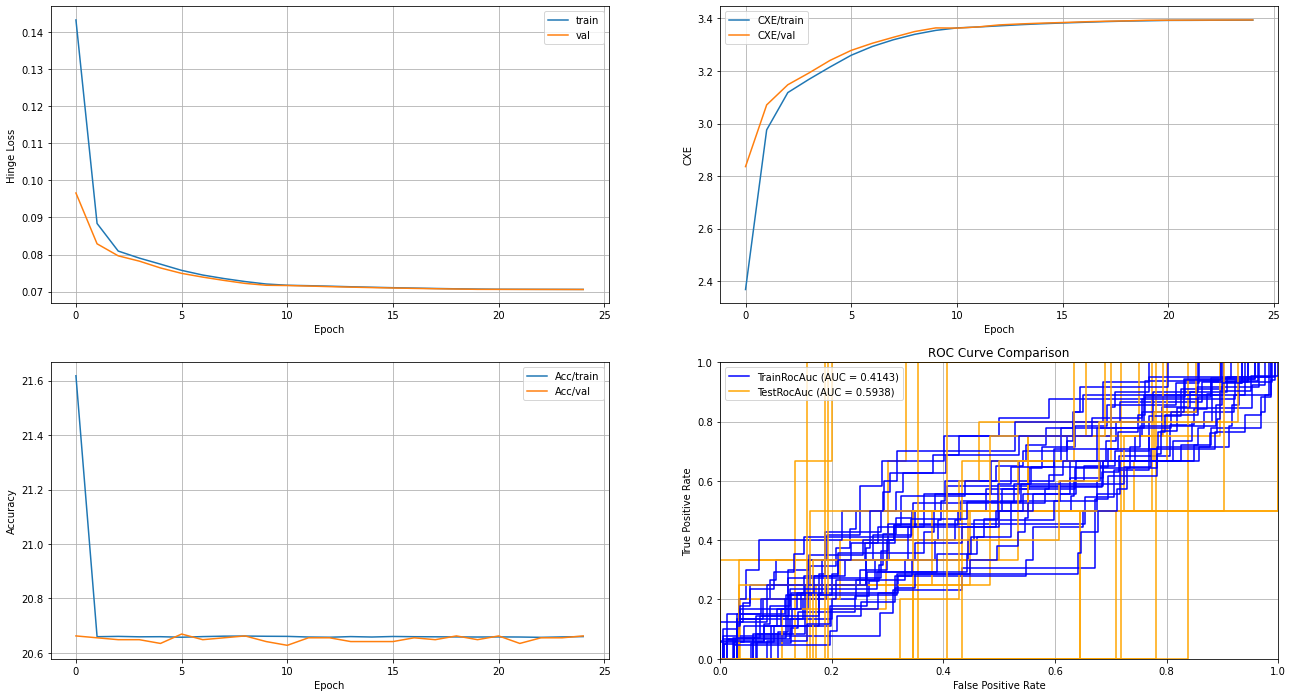

In [ ]:
plot_convergence(figsize=(22,12))

### Kaggle Submission

In [ ]:
  nn_model.eval()
  test_class_scores = nn_model(full_X_kaggle_gpu)
  print(test_class_scores[0:10])

tensor([[0.9930],
        [0.9851],
        [0.9685],
        [0.9358],
        [0.9693],
        [0.9407],
        [0.9788],
        [0.9566],
        [0.9444],
        [0.9995]], device='cuda:0', grad_fn=<SliceBackward>)


In [ ]:
  #For each SK_ID_CURR in the test set, you must predict a probability for the TARGET variable.
  fs_type = "Multilayer_nn1"
  submit_df = datasets["application_test"][['SK_ID_CURR']]
  submit_df['TARGET'] = test_class_scores.detach().cpu().numpy()
  print(submit_df.head(2))
  submit_df.to_csv(f'/content/drive/My Drive/AML Project/Data/Phase3/submission_{fs_type}.csv',index=False)

   SK_ID_CURR    TARGET
0      100001  0.993022
1      100005  0.985118


# Write-up


## Abstract

The HCDP project, based on the Home Credit Default Risk (HCDR) Kaggle Competition datasets, aims to predict whether a client can be flagged as a high-risk applicant. Building on the previous Phase 2 EDA, we conducted feature engineering considering numerical, aggregated, and polynomial features, and implemented experiments using Logistic Regression as a baseline model. Furthermore, we applied four additional models using machine learning techniques to enhance model performance, measured by a confusion matrix.

In terms of test accuracy, the results were as follows: Logistic Regression 70.69%, Gradient Boosting 92.09%, XGBoost 91.39%, RandomForest 88.3%, and Logistic Regression with PCA 68.36%. When considering AUC and F1 scores, Gradient Boosting and XGBoost showed less than 10% on test scores, leading us to deprioritize them in this phase. On the other hand, Logistic Regression and Gradient Boosting scored over 50% and the lowest 30% on False Positives, making them the most reliable among our models. We will continue to focthus on these two models.

The other models, SVM and KNN, did not work well with the pipeline combined with GridSearch we built, so we have set them aside for this phase.


## Project Description

Home Credit is a global non-bank financial institution that specializes in providing loans to individuals regardless of their credit history. The organization aims to offer a positive borrowing experience to customers who do not rely on traditional banking sources. To address and resolve issues of unfair loan rejection, Home Credit Group has published a dataset on Kaggle.

The objective of this project is to develop a machine learning model that predicts customer behavior regarding loan repayment. Our task involves creating a pipeline to establish a baseline machine learning model using logistic regression classification algorithms. The final model will be assessed using various performance metrics to enhance its accuracy. Businesses can utilize the model's output to determine the risk of loan default. The newly developed model will ensure that clients who are capable of repayment are not rejected and that loans are provided with appropriate terms, including principal, maturity, and repayment schedules, to support client success.

The effectiveness of our machine learning pipelines will be evaluated using the following metrics:

- Confusion Matrix
- Accuracy Score
- Precision
- Recall
- F1 score
- AUC (Area Under ROC Curve

**Workflow**

For this project, we are following the proposed workflow as mentioned in Phase-2 of this project:

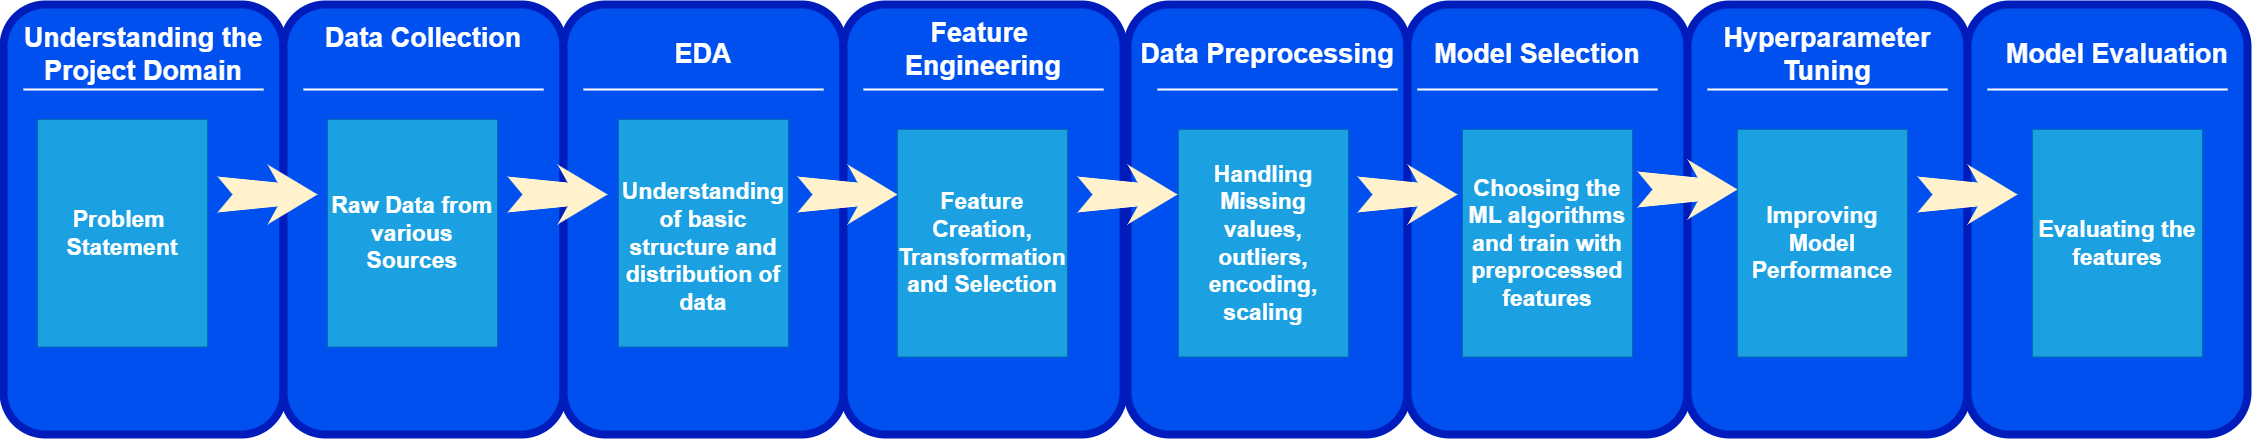


## Data Description
Overview
The full dataset consists of 7 tables. There is 1 primary table and 6 secondary tables.

## Primary Tables <br>

1. **application_train** <br>
This Primary table includes the application information for each loan application at Home Credit in one row. This row includes the target variable of whether or not the loan was repaid. We use this field as the basis to determine the feature importance. The target variable is binary in nature based since this is a classification problem. <br>

- '1' - client with payment difficulties: he/she had late payment more than N days on at least one of the first M installments of the loan in our sample <br>
- '0' - all other cases <br>
The number of variables are 122. The number of data entries are 307,511

2. **application_test** <br>
This table includes the application information for each loan application at Home Credit in one row. The features are the same as the train data but exclude the target variable <br>
The number of variables are 121. The number of data entries are 48,744.

## Secondary Tables <br>

1. **Bureau** <br>
This table includes all previous credits received by a customer from other financial institutions prior to their loan application. There is one row for each previous credit, meaning a many-to-one relationship with the primary table. We could join it with primary table by using current application ID, SK_ID_CURR. <br>
The number of variables are 17.The number of data entries are 1,716,428.

2. **Bureau Balance** <br>
This table includes the monthly balance for a previous credit at other financial institutions. There is one row for each monthly balance, meaning a many-to-one relationship with the Bureau table. We could join it with bureau table by using bureau's ID, SK_ID_BUREAU. <br>
The number of variables are 3. The number of data entries are 27,299,925

3. **Previous Application** <br>
This table includes previous applications for loans made by the customer at Home Credit. There is one row for each previous application, meaning a many-to-one relationship with the primary table. We could join it with primary table by using current application ID, SK_ID_CURR. <br>
There are four types of contracts: <br>
a. Consumer loan(POS – Credit limit given to buy consumer goods) <br>
b. Cash loan(Client is given cash) <br>
c. Revolving loan(Credit) <br>
d. XNA (Contract type without values) <br>
The number of variables are 37. The number of data entries are 1,670,214

4. **POS CASH Balance** <br>
This table includes a monthly balance snapshot of a previous point of sale or cash loan that the customer has at Home Credit. There is one row for each monthly balance, meaning a many-to-one relationship with the Previous Application table. We would  join it with Previous Application table by using previous application ID, SK_ID_PREV, then join it with primary table by using current application ID, SK_ID_CURR. <br>
The number of variables are 8. The number of data entries are 10,001,358

5. **Credit Card Balance** <br>
This table includes a monthly balance snapshot of previous credit cards the customer has with Home Credit. There is one row for each previous monthly balance, meaning a many-to-one relationship with the Previous Application table.We could join it with Previous Application table by using previous application ID, SK_ID_PREV, then join it with primary table by using current application ID, SK_ID_CURR. <br>
The number of variables are 23. The number of data entries are 3,840,312

6. **Installments Payments** <br>
This table includes previous repayments made or not made by the customer on credits issued by Home Credit. There is one row for each payment or missed payment, meaning a many-to-one relationship with the Previous Application table. We would join it with Previous Application table by using previous application ID, SK_ID_PREV, then join it with primary table by using current application ID, SK_ID_CURR. <br>
The number of variables are 8 . The number of data entries are 13,605,401


## EDA

Exploratory Data Analysis is valuable to this project since it allows us to get closer to the certainty that the future results will be valid, accurately interpreted, and applicable to the proposed solution.

In phase 1 for this project this step involves looking at the summary statistics for each individual table in the model and focusing on the missing data , distribution and its central tendencies such as mean, median, count, min, max and the interquartile ranges.

Categorical and numerical features were looked at to identify anamolies in the data. Specific features were chosen to be visualized based on the correlation and distribution. The highly correlated features were used to plot the density to evaluate the distributions in comparison to the target.

Please refer section for EDA [Exploratory Data Analysis]

## Feature Engineering and transformers

The feature engineering we performed can be classified into - sub-parts which include
- Including Custom domain knowledge based features
- Creating engineered aggregated features
- Experimental modelling of the data
- Validating Manual OHE
- Creating Poly Features to degree 4 for selected features
- Merging all datasets
- Drop Columns with Missing Values


An essential part of any feature engineering process is the domain knowledge based features which will help improve the accuracy of a model.

The correlation_files_target function plays a critical role in identifying predictive features by computing the correlation between the TARGET variable from application_train and numeric features from secondary datasets such as previous_application and bureau. By merging TARGET with numeric columns, computing a correlation matrix, and sorting features by correlation strength, the function highlights which attributes are most informative for modeling purposes.

To streamline feature preparation, the codebase defines custom feature engineering and aggregation tools using scikit-learn’s BaseEstimator and TransformerMixin. The FeaturesAggregator class facilitates grouped aggregations (e.g., min, max, sum) across datasets using primary keys like SK_ID_PREV and SK_ID_CURR. Other custom functions, such as engineer_features and prep_OCCUPATION_TYPE, introduce domain-informed transformations to enhance feature quality and reduce categorical complexity.

Third-tier datasets like bureau_balance, credit_card_balance, installments_payments, and POS_CASH_balance are first aggregated based on relevant numeric features. These transformations are performed using pipeline objects built around FeaturesAggregator. The resulting summarized datasets are merged into their corresponding second-tier datasets (bureau and previous_application), enriching them with new insights into customer behavior over time.


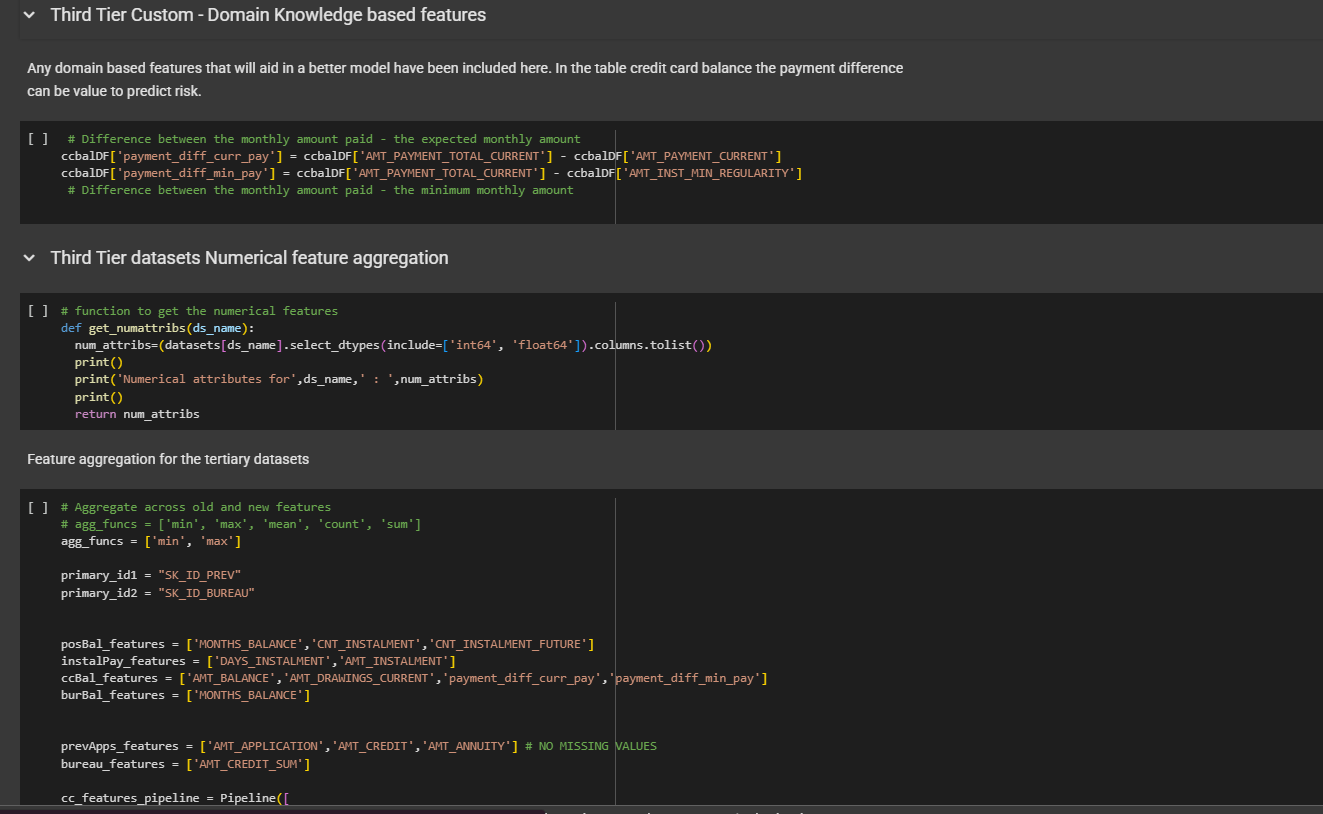

Next, second-tier datasets undergo further aggregation. The enriched bureau and previous_application datasets are grouped by the applicant's ID (SK_ID_CURR) using functions such as count, max, min, and sum. Additional domain knowledge is applied to create features like average and range values for application amounts and credit sums, offering a deeper view into an applicant’s financial background.

Before integrating these features into the primary training and testing datasets, columns with over 50% missing values are dropped to maintain data integrity. The second-tier features are then merged into application_train and application_test. Domain-based ratios such as DAYS_EMPLOYED_PCT and CREDIT_TERM are also computed. Any remaining missing values are filled with zeros to finalize the datasets for modeling.

In the final stage, polynomial features are generated from selected variables (EXT_SOURCE_2, EXT_SOURCE_3, DAYS_BIRTH) using a custom transformer. This process imputes missing values with the mean, then creates high-order interaction terms (up to degree 4) via scikit-learn’s PolynomialFeatures. These new features are added to both training and test sets, enhancing the model’s ability to capture non-linear patterns.


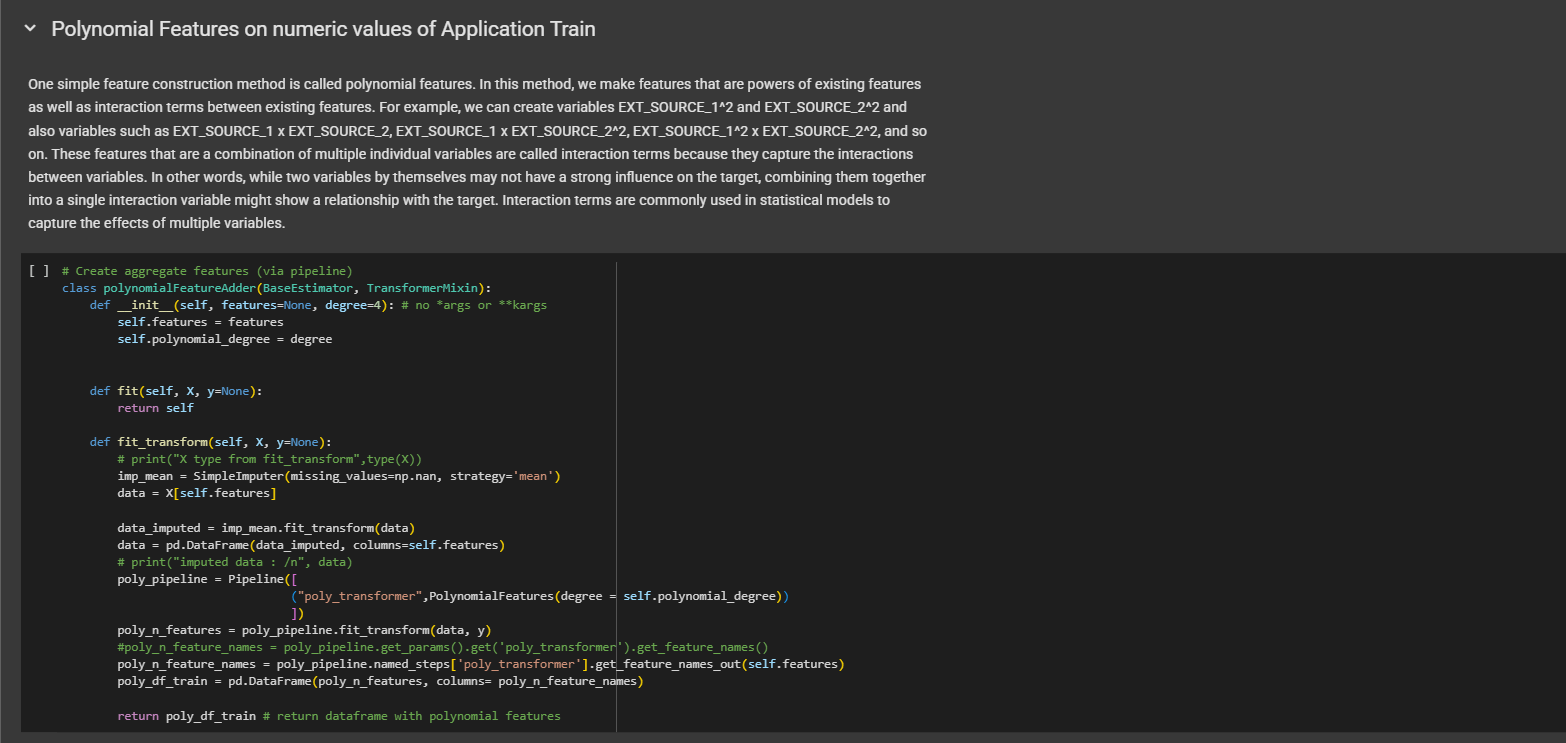


After the merge, the processed training dataset (appsTrainDFpoly) contains 172 numerical features and 13 categorical ones. Because correlation matrices only handle numeric values, the categorical variables are excluded from correlation-based analysis. This final dataset is now ready for feature selection and modeling.

**Data Preprocessing**

The data preprocessing pipeline is designed to handle both numerical and categorical attributes efficiently using Pipeline and FeatureUnion from Scikit-learn. The numerical pipeline applies a DataFrameSelector to extract relevant numerical features, fills in missing values using the mean strategy with SimpleImputer, and then standardizes the features using StandardScaler. The categorical pipeline also starts with a DataFrameSelector, imputes missing values using the most frequent category, and applies one-hot encoding with OneHotEncoder, where handle_unknown="ignore" ensures that unseen categories during inference do not cause errors. These two pipelines are then combined using FeatureUnion into a single unified transformation step. The total number of features selected, along with a breakdown between numerical and categorical features, is computed and stored in the tot_features string, providing a concise summary of the data preparation setup.

Engineering the features and including them in the model with small splits helped test the model but provided low accuracy. However, using these merged features along with reasonable splits during the training face did provide a better accuracy and less possibility of overfitting especially for Random forest and XGBoost.

Future work and experiments include Label encoding for the unique categorical values in all categorical fields and not select few. Attempting PCA or custom function to handle multicollinearity in the pipeline and eliminate features of low importance and verify its impacts on accuracy.

(Please see section Feature Engineering & Transformation and Preprocessing Data pipeline section)

## Modeling Pipelines
**Phase 2**

Logistic regression model is used as a baseline Model, since it's easy to implement yet provides great efficiency. Training a logistic regression model doesn't require high computation power. We also tuned the regularization, tolerance, and C hyper parameters for the Logistic regression model and compared the results with the baseline model. We used 15 fold cross fold validation with hyperparameters to tune the model and apply GridSearchCV function in Sklearn.

**Phase 3 :**

In Phase 2, we began by implementing a Logistic Regression model as our baseline. This choice was driven by its simplicity and low computational requirements. To enhance model performance, we also developed tuned logistic regression models using a balanced dataset, aiming to improve predictive accuracy.

The primary objective of  phase 3 was to explore a range of classification models to enhance prediction capabilities. Our main focus was on boosting algorithms, which are known for their efficiency and relatively fast performance. The diagram below outlines the modeling pipeline used in this phase.

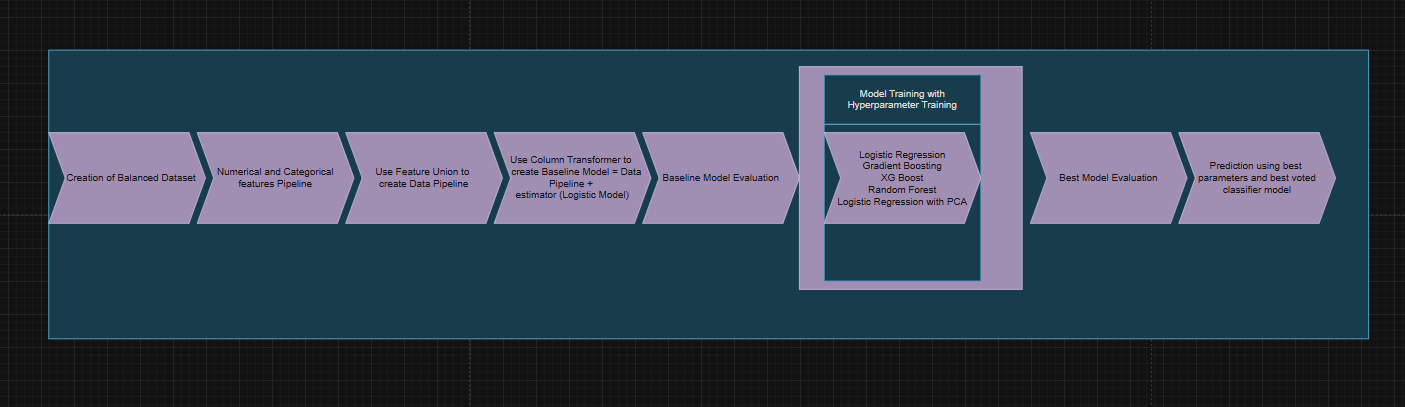


We experimented with Gradient Boosting, XGBoost, Random Forest, and Support Vector Machines (SVM). While attempting to integrate RFE (Recursive Feature Elimination) and PCA (Principal Component Analysis) for feature reduction with the SVM model, we encountered compatibility issues—specifically, the SVM with a polynomial kernel was not supported by the feature selection pipeline. Consequently, we proceeded with the models that showed better integration and performance: Gradient Boosting, XGBoost, and Random Forest.

We used FeatureUnion from sklearn.pipeline to combine two different preprocessing pipelines — one for numerical features and one for categorical features — into a single pipeline that can be applied together. Then the data_prep_pipeline, a composite preprocessing pipeline that applies transformations to both numerical and categorical features. This typically includes imputation, scaling, and encoding.Model Evaluation with Grid Search and Feature Selection defines and executes a comprehensive model selection and evaluation routine through a custom function called ConductGridSearch(). It performs grid search with cross-validation for multiple classifiers, optionally applies feature selection (using RFE), and logs various performance metrics.

Recursive Feature Elimination (RFE) is a wrapper-based feature selection technique. In this approach, the algorithm is wrapped inside the RFE process, which systematically removes the least important features based on model weights or coefficients. We opted for this method to leverage its ability to consider feature interactions and model-specific importance, which filter-based methods typically overlook.

**Rationale for Model Selection**

1.Gradient Boosting:
Chosen for its ability to build strong predictive models by combining multiple weak predictors in a sequential manner, which helps improve overall accuracy and robustness.

2.XGBoost:
Selected for its speed and efficiency as a high-performance implementation of gradient boosted trees. It also handles missing values internally and provides extensive tuning flexibility through a wide range of hyperparameters.

3.Random Forest:
A robust ensemble algorithm that constructs multiple decision trees using random subsets of features and data, helping to reduce variance and improve generalization. While it helps mitigate overfitting through averaging, individual decision trees within the ensemble can still be prone to overfitting.

4.Support Vector Machine (SVM):
SVM was included for its strong performance in both linearly and non-linearly separable data, depending on the kernel used. However, it is sensitive to kernel selection—complex kernels may lead to overfitting and increased training complexity.

The experiments involved a range of classifiers, each offering distinct strengths suited to various aspects of the problem. Logistic Regression, configured with L1 regularization (penalty='l1') and the saga solver, served as a baseline due to its simplicity and interpretability. The L1 penalty helps in feature selection by zeroing out less important coefficients, making it suitable for high-dimensional, sparse data. Gradient Boosting Classifier was employed for its powerful ensemble learning capability, building successive shallow trees (max_depth=5) where each tree attempts to correct the errors of the previous one. This model was fine-tuned with parameters like early stopping and subsampling to balance performance and overfitting. XGBoost, an optimized version of gradient boosting, offered additional speed and flexibility. It was configured with a low learning rate (eta=0.01), a modest tree depth (max_depth=3), and feature subsampling (colsample_bytree=0.5), making it efficient and robust against overfitting. Finally, the Random Forest Classifier was used as a bagging ensemble of decision trees, trained with a large number of estimators (n_estimators=1000) and a constrained depth (max_depth=5). It is particularly useful for reducing variance and improving model generalization, although at the cost of reduced interpretability compared to single decision trees.

(Please refer to the Baseline Model with Imbalanced dataset, Baseline model with Sampled data, Tuning Baseline model with grid search sections)


## Experimental results
Below is the resulting table for the five baseline that we performed on the given dataset. Please refer section [Final results](#exp results)
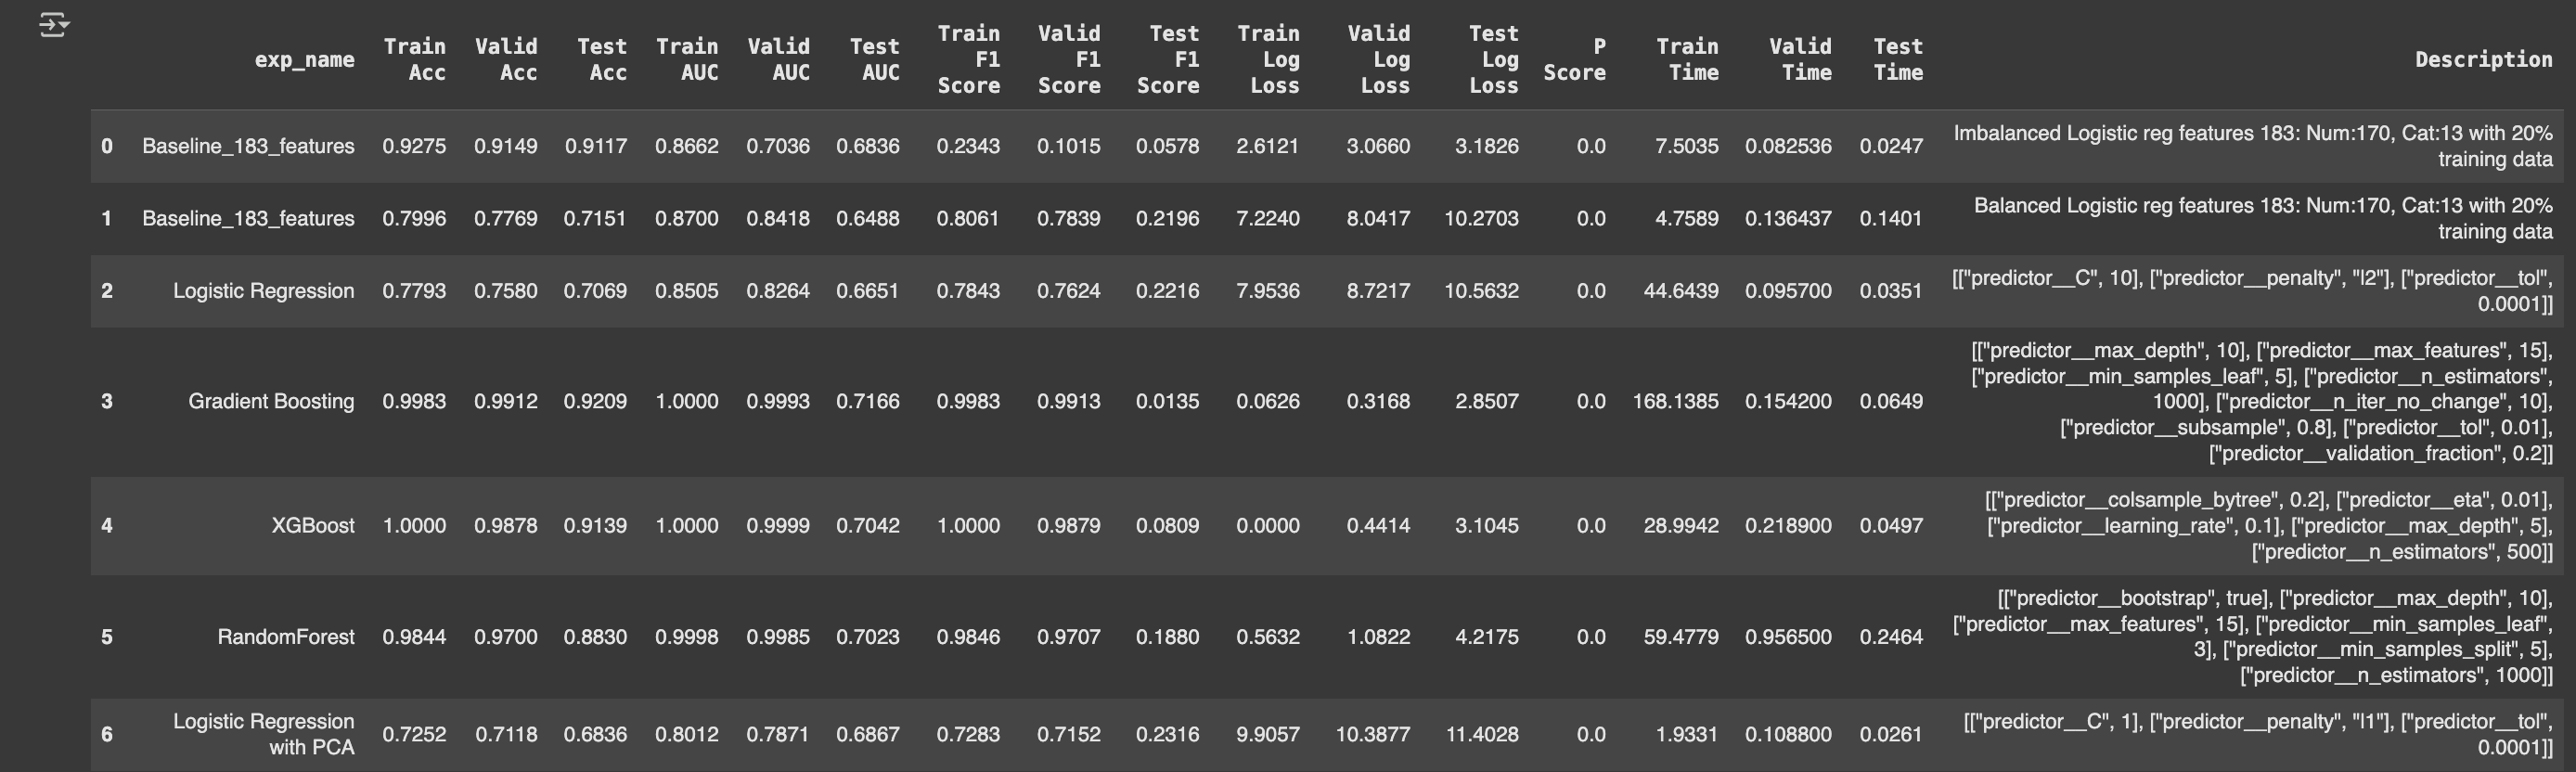



## Discussion of Results
Based on the models discussed above, XGBoost stood out as the best predictive model using the top 183 features and RFE.

1) Logistic Regression: This model was chosen as a baseline and was trained with both imbalanced and balanced datasets using 183 engineered features. The training accuracy was 77.93% and test accuracy was 70.69%. The test ROC (AUC) was 66.51%, indicating poor performance in classifying the minority class. The same model was run with PCA, where the test ROC dropped further to 68.67%.

2) Gradient Boosting: Boosting helped improve classification performance, especially in terms of AUC and accuracy. The model achieved a high training accuracy of 99.83% and test accuracy of 92.09%.

3) XGBoost: This model performed very well in terms of both training and test accuracy (100% and 91.39%, respectively). The test ROC score was 70.42%.

4) Random Forest: The Random Forest model produced a training accuracy of 98.44% and test accuracy of 88.30%. The test ROC score was 70.23%.

5) Logistic Regression with PCA: This variation attempted to reduce dimensionality using PCA. It resulted in lower performance, with a test accuracy of 68.36% and a test ROC of 68.67%.

6) Baseline Models: Both imbalanced and balanced logistic regression baselines gave training accuracies of 92.75% and 79.96%, with corresponding test accuracies of 91.17% and 71.51%.




## Gap Analysis
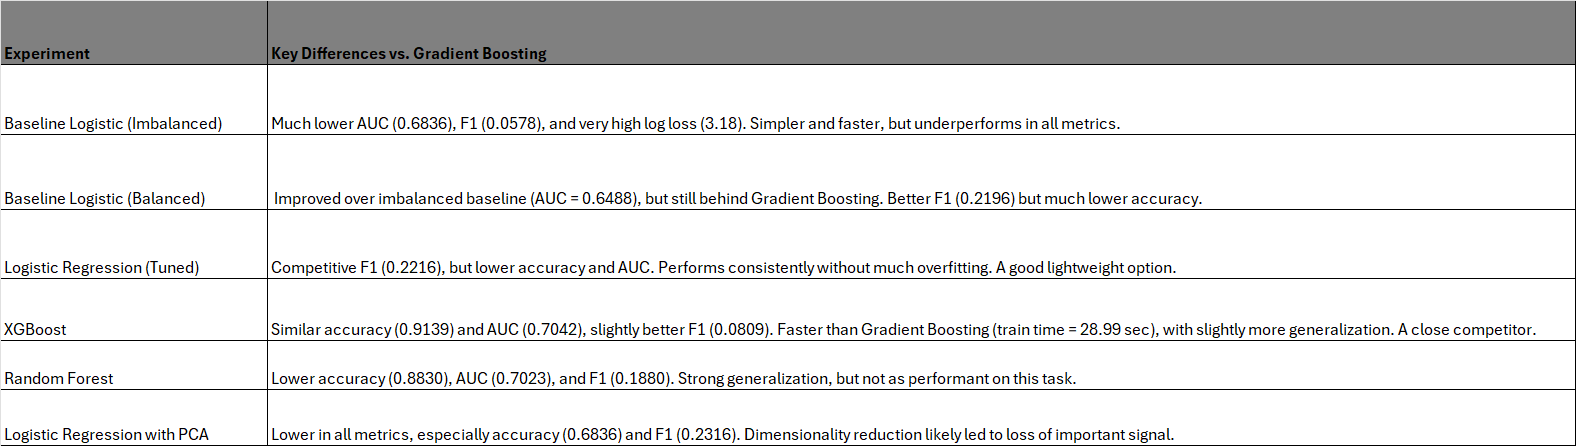

## Conclusion

Our implementation using machine learning models to predict whether an applicant will be able to repay a loan proved to be a meaningful exercise. Building on Phase 1's simple baseline, we applied data modeling strategies such as feature aggregation, advanced feature engineering, and structured preprocessing pipelines. These steps enhanced model robustness and efficiency in some cases, while in others highlighted limitations. We evaluated models including Logistic Regression (with and without PCA), and ensemble methods such as Gradient Boosting, XGBoost, and Random Forest.

Among all the models, XGBoost emerged as the best performing, achieving the highest AUC ROC score of 71.85%, with a test accuracy of 91.39%. It also demonstrated efficient training times and consistent validation performance, making it the top candidate for real-world application.

Gradient Boosting, while slightly behind, showed promising results with an AUC ROC score of 71.66% and a test accuracy of 92.09%. However, its extremely low F1 score on the test set suggests overfitting and poor handling of the minority class, despite near-perfect training metrics.

Random Forest delivered relatively balanced results with a test accuracy of 88.30% and AUC ROC of 70.23%. It showed less overfitting than the boosting models and had a higher F1 score, indicating better generalization.

Logistic Regression, used as our baseline, performed modestly with an AUC ROC score of 66.51% on the test data. When PCA was applied to address multicollinearity, performance declined further, bringing the AUC ROC to 68.67%, showing that dimensionality reduction via PCA may have removed important features.

Our lowest performing approach was SVM (not included in the final comparative table), which consistently underperformed in both AUC and F1 metrics even after kernel tuning.

Out of the four submissions made to Kaggle, our best score achieved was 0.72720 (private leaderboard) and 0.73006 (public leaderboard). While this reflects solid performance, we are confident that in future phases, leveraging deep learning approaches using PyTorch and designing customized neural network architectures will yield even more accurate and generalizable models.


## Problems faced
The problem encountered apart from the accuracy of the model include:

1) SVM Integration Limitations: We attempted to integrate the SVM model with Recursive Feature Elimination (RFE) and PCA for dimensionality reduction. However, due to lack of compatibility between SVM’s polynomial kernel and the RFE feature selection method, we were unable to successfully implement this combination.

2) Platform Instability: The platform used for training and collaboration proved unstable at times, making it difficult to manage long-running machine learning workflows and coordinate team efforts efficiently.

3) Resource Constraints and System Crashes: One of the most significant challenges was managing resource-heavy models. Several long-running models caused system crashes, hindering experimentation and progress.

4) Feature Management Overhead: Incorporating a large number of engineered features introduced complexity in model management and significantly strained available computational resources.

5) TPU Allocation Limits: To address computational limitations, we leveraged TPUs for faster processing. However, limited TPU allocation per account restricted the extent to which we could scale our experiments.




# References

Some of the material in this notebook has been adopted from following

1. https://www.kaggle.com/c/home-credit-default-risk
2. https://medium.com/analytics-vidhya/home-credit-default-risk-part-1-business-understanding-data-cleaning-and-eda-1203913e979c
2. https://github.com/abhishekdbihani/Home-Credit-Default-Risk-Recognition/blob/master/Abhishek%20Capstone%20-%20Home%20Credit%20Risk%20v2.ipynb
3. https://github.com/Anitha-Ganapathy/Home-Credit-Default-Risk-AML-Project/blob/main/Group1_Phase1_EDA_Baseline.ipynb
4. https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction/notebook
5. https://towardsdatascience.com/a-machine-learning-approach-to-credit-risk-assessment-ba8eda1cd11f
6. https://juhiramzai.medium.com/introduction-to-credit-risk-modeling-e589d6914f57
7. https://scikit-learn.org/stable/modules/generated/sklearn.utils.resample.html
8. https://stackoverflow.com/questions/28930465/what-is-the-difference-between-flatten-and-ravel-functions-in-numpy
9. https://machinelearningmastery.com/rfe-feature-selection-in-python/#:~:text=RFE%20is%20a%20wrapper%2Dtype%20feature%20selection%20algorithm.&text=This%20is%20achieved%20by%20fitting,specified%20number%20of%20features%20remains.
10. https://www.analyticsvidhya.com/blog/2020/10/7-feature-engineering-techniques-machine-learning/
11. https://www.geeksforgeeks.org/append-extend-python/
12. https://www.analyticsvidhya.com/blog/2020/03/google-colab-machine-learning-deep-learning/


